# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 26988 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=2)


  0% (    0 of 26988) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 26988) |                    | Elapsed Time: 0:00:26 ETA: 22:19:54

  0% (   26 of 26988) |                     | Elapsed Time: 0:00:27 ETA: 7:47:18

  0% (   44 of 26988) |                     | Elapsed Time: 0:00:27 ETA: 4:38:06

  0% (   59 of 26988) |                     | Elapsed Time: 0:00:27 ETA: 3:28:54

  0% (   75 of 26988) |                     | Elapsed Time: 0:00:27 ETA: 0:05:47

  0% (   91 of 26988) |                     | Elapsed Time: 0:00:27 ETA: 0:05:46

  0% (  107 of 26988) |                     | Elapsed Time: 0:00:28 ETA: 0:05:54

  0% (  123 of 26988) |                     | Elapsed Time: 0:00:28 ETA: 0:06:00

  0% (  139 of 26988) |                     | Elapsed Time: 0:00:28 ETA: 0:05:52

  0% (  155 of 26988) |                     | Elapsed Time: 0:00:28 ETA: 0:05:51

  0% (  171 of 26988) |                     | Elapsed Time: 0:00:28 ETA: 0:05:50

  0% (  187 of 26988) |                     | Elapsed Time: 0:00:29 ETA: 0:05:50

  0% (  204 of 26988) |                     | Elapsed Time: 0:00:29 ETA: 0:05:45

  0% (  220 of 26988) |                     | Elapsed Time: 0:00:29 ETA: 0:05:46

  0% (  235 of 26988) |                     | Elapsed Time: 0:00:29 ETA: 0:05:50

  0% (  253 of 26988) |                     | Elapsed Time: 0:00:29 ETA: 0:05:41

  1% (  270 of 26988) |                     | Elapsed Time: 0:00:30 ETA: 0:05:39

  1% (  288 of 26988) |                     | Elapsed Time: 0:00:30 ETA: 0:05:33

  1% (  306 of 26988) |                     | Elapsed Time: 0:00:30 ETA: 0:05:26

  1% (  324 of 26988) |                     | Elapsed Time: 0:00:30 ETA: 0:05:18

  1% (  338 of 26988) |                     | Elapsed Time: 0:00:31 ETA: 0:05:18

  1% (  349 of 26988) |                     | Elapsed Time: 0:00:31 ETA: 0:09:21

  1% (  366 of 26988) |                     | Elapsed Time: 0:00:32 ETA: 0:09:29

  1% (  382 of 26988) |                     | Elapsed Time: 0:00:32 ETA: 0:09:42

  1% (  400 of 26988) |                     | Elapsed Time: 0:00:32 ETA: 0:09:43

  1% (  417 of 26988) |                     | Elapsed Time: 0:00:32 ETA: 0:05:31

  1% (  432 of 26988) |                     | Elapsed Time: 0:00:32 ETA: 0:05:44

  1% (  449 of 26988) |                     | Elapsed Time: 0:00:33 ETA: 0:05:38

  1% (  468 of 26988) |                     | Elapsed Time: 0:00:33 ETA: 0:05:34

  1% (  486 of 26988) |                     | Elapsed Time: 0:00:33 ETA: 0:05:29

  1% (  504 of 26988) |                     | Elapsed Time: 0:00:33 ETA: 0:05:18

  1% (  520 of 26988) |                     | Elapsed Time: 0:00:33 ETA: 0:05:17

  1% (  537 of 26988) |                     | Elapsed Time: 0:00:34 ETA: 0:05:22

  2% (  551 of 26988) |                     | Elapsed Time: 0:00:34 ETA: 0:05:39

  2% (  566 of 26988) |                     | Elapsed Time: 0:00:34 ETA: 0:05:53

  2% (  581 of 26988) |                     | Elapsed Time: 0:00:34 ETA: 0:06:01

  2% (  599 of 26988) |                     | Elapsed Time: 0:00:35 ETA: 0:05:54

  2% (  612 of 26988) |                     | Elapsed Time: 0:00:35 ETA: 0:06:13

  2% (  626 of 26988) |                     | Elapsed Time: 0:00:35 ETA: 0:06:13

  2% (  640 of 26988) |                     | Elapsed Time: 0:00:35 ETA: 0:06:16

  2% (  654 of 26988) |                     | Elapsed Time: 0:00:35 ETA: 0:06:30

  2% (  675 of 26988) |                     | Elapsed Time: 0:00:36 ETA: 0:06:27

  2% (  691 of 26988) |                     | Elapsed Time: 0:00:36 ETA: 0:06:08

  2% (  707 of 26988) |                     | Elapsed Time: 0:00:36 ETA: 0:06:00

  2% (  722 of 26988) |                     | Elapsed Time: 0:00:36 ETA: 0:05:56

  2% (  737 of 26988) |                     | Elapsed Time: 0:00:37 ETA: 0:05:56

  2% (  753 of 26988) |                     | Elapsed Time: 0:00:37 ETA: 0:05:52

  2% (  769 of 26988) |                     | Elapsed Time: 0:00:37 ETA: 0:05:52

  2% (  785 of 26988) |                     | Elapsed Time: 0:00:37 ETA: 0:05:51

  2% (  801 of 26988) |                     | Elapsed Time: 0:00:37 ETA: 0:05:42

  3% (  818 of 26988) |                     | Elapsed Time: 0:00:38 ETA: 0:05:42

  3% (  836 of 26988) |                     | Elapsed Time: 0:00:38 ETA: 0:05:36

  3% (  852 of 26988) |                     | Elapsed Time: 0:00:38 ETA: 0:05:36

  3% (  869 of 26988) |                     | Elapsed Time: 0:00:38 ETA: 0:05:33

  3% (  886 of 26988) |                     | Elapsed Time: 0:00:38 ETA: 0:05:28

  3% (  904 of 26988) |                     | Elapsed Time: 0:00:39 ETA: 0:05:30

  3% (  920 of 26988) |                     | Elapsed Time: 0:00:39 ETA: 0:05:37

  3% (  937 of 26988) |                     | Elapsed Time: 0:00:39 ETA: 0:05:33

  3% (  954 of 26988) |                     | Elapsed Time: 0:00:39 ETA: 0:05:34

  3% (  969 of 26988) |                     | Elapsed Time: 0:00:40 ETA: 0:05:39

  3% (  987 of 26988) |                     | Elapsed Time: 0:00:40 ETA: 0:05:34

  3% ( 1004 of 26988) |                     | Elapsed Time: 0:00:40 ETA: 0:05:32

  3% ( 1020 of 26988) |                     | Elapsed Time: 0:00:40 ETA: 0:05:44

  3% ( 1035 of 26988) |                     | Elapsed Time: 0:00:40 ETA: 0:05:48

  3% ( 1050 of 26988) |                     | Elapsed Time: 0:00:41 ETA: 0:05:59

  3% ( 1066 of 26988) |                     | Elapsed Time: 0:00:41 ETA: 0:06:07

  4% ( 1082 of 26988) |                     | Elapsed Time: 0:00:41 ETA: 0:05:58

  4% ( 1099 of 26988) |                     | Elapsed Time: 0:00:41 ETA: 0:05:45

  4% ( 1116 of 26988) |                     | Elapsed Time: 0:00:41 ETA: 0:05:36

  4% ( 1133 of 26988) |                     | Elapsed Time: 0:00:42 ETA: 0:05:29

  4% ( 1150 of 26988) |                     | Elapsed Time: 0:00:42 ETA: 0:05:25

  4% ( 1167 of 26988) |                     | Elapsed Time: 0:00:42 ETA: 0:05:22

  4% ( 1185 of 26988) |                     | Elapsed Time: 0:00:42 ETA: 0:05:21

  4% ( 1202 of 26988) |                     | Elapsed Time: 0:00:43 ETA: 0:05:20

  4% ( 1220 of 26988) |                     | Elapsed Time: 0:00:43 ETA: 0:05:17

  4% ( 1237 of 26988) |                     | Elapsed Time: 0:00:43 ETA: 0:05:17

  4% ( 1255 of 26988) |                     | Elapsed Time: 0:00:43 ETA: 0:05:15

  4% ( 1273 of 26988) |                     | Elapsed Time: 0:00:43 ETA: 0:05:11

  4% ( 1291 of 26988) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:12

  4% ( 1309 of 26988) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:09

  4% ( 1327 of 26988) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:08

  5% ( 1350 of 26988) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:08

  5% ( 1367 of 26988) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:09

  5% ( 1385 of 26988) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:10

  5% ( 1403 of 26988) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:10

  5% ( 1421 of 26988) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:09

  5% ( 1439 of 26988) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:06

  5% ( 1457 of 26988) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:08

  5% ( 1475 of 26988) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:07

  5% ( 1492 of 26988) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:08

  5% ( 1510 of 26988) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:08

  5% ( 1528 of 26988) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:08

  5% ( 1545 of 26988) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:08

  5% ( 1563 of 26988) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:06

  5% ( 1581 of 26988) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:06

  5% ( 1599 of 26988) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:06

  5% ( 1616 of 26988) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:05

  6% ( 1634 of 26988) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:05

  6% ( 1651 of 26988) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:07

  6% ( 1668 of 26988) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:12

  6% ( 1687 of 26988) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:13

  6% ( 1704 of 26988) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:15

  6% ( 1722 of 26988) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:16

  6% ( 1739 of 26988) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:15

  6% ( 1756 of 26988) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:15

  6% ( 1773 of 26988) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:14

  6% ( 1789 of 26988) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:15

  6% ( 1807 of 26988) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:13

  6% ( 1824 of 26988) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:16

  6% ( 1842 of 26988) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:16

  6% ( 1858 of 26988) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:20

  6% ( 1876 of 26988) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:20

  7% ( 1894 of 26988) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:19

  7% ( 1911 of 26988) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:16

  7% ( 1928 of 26988) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:13

  7% ( 1945 of 26988) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:12

  7% ( 1961 of 26988) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:13

  7% ( 1977 of 26988) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:16

  7% ( 1995 of 26988) |#                    | Elapsed Time: 0:00:52 ETA: 0:05:16

  7% ( 2013 of 26988) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:13

  7% ( 2034 of 26988) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:11

  7% ( 2051 of 26988) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:09

  7% ( 2069 of 26988) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:07

  7% ( 2086 of 26988) |#                    | Elapsed Time: 0:00:53 ETA: 0:05:08

  7% ( 2103 of 26988) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:11

  7% ( 2120 of 26988) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:12

  7% ( 2137 of 26988) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:14

  7% ( 2154 of 26988) |#                    | Elapsed Time: 0:00:54 ETA: 0:05:14

  8% ( 2170 of 26988) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:12

  8% ( 2186 of 26988) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:13

  8% ( 2202 of 26988) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:13

  8% ( 2219 of 26988) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:15

  8% ( 2236 of 26988) |#                    | Elapsed Time: 0:00:55 ETA: 0:05:14

  8% ( 2252 of 26988) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:14

  8% ( 2269 of 26988) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:13

  8% ( 2286 of 26988) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:10

  8% ( 2304 of 26988) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:09

  8% ( 2321 of 26988) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:08

  8% ( 2337 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:05:11

  8% ( 2352 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:05:19

  8% ( 2371 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:05:17

  8% ( 2386 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:05:30

  8% ( 2400 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:41

  8% ( 2417 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:32

  9% ( 2435 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:29

  9% ( 2452 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:28

  9% ( 2470 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:12

  9% ( 2486 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:05

  9% ( 2503 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:07

  9% ( 2521 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:06

  9% ( 2538 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:06

  9% ( 2556 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:05

  9% ( 2573 of 26988) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:01

  9% ( 2590 of 26988) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:01

  9% ( 2608 of 26988) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:00

  9% ( 2626 of 26988) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:59

  9% ( 2641 of 26988) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:05

  9% ( 2658 of 26988) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:05

  9% ( 2676 of 26988) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:01

 10% ( 2699 of 26988) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:09

 10% ( 2717 of 26988) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:04

 10% ( 2735 of 26988) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:55

 10% ( 2753 of 26988) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:58

 10% ( 2769 of 26988) |##                   | Elapsed Time: 0:01:02 ETA: 0:05:01

 10% ( 2785 of 26988) |##                   | Elapsed Time: 0:01:02 ETA: 0:05:07

 10% ( 2801 of 26988) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:16

 10% ( 2817 of 26988) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:25

 10% ( 2833 of 26988) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:27

 10% ( 2849 of 26988) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:26

 10% ( 2865 of 26988) |##                   | Elapsed Time: 0:01:03 ETA: 0:05:23

 10% ( 2881 of 26988) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:23

 10% ( 2897 of 26988) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:23

 10% ( 2913 of 26988) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:23

 10% ( 2929 of 26988) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:23

 10% ( 2945 of 26988) |##                   | Elapsed Time: 0:01:04 ETA: 0:05:23

 10% ( 2961 of 26988) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:24

 11% ( 2977 of 26988) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:23

 11% ( 2993 of 26988) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:20

 11% ( 3009 of 26988) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:18

 11% ( 3025 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:16

 11% ( 3045 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:14

 11% ( 3061 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:16

 11% ( 3077 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:16

 11% ( 3094 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:14

 11% ( 3110 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:14

 11% ( 3126 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:12

 11% ( 3142 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:12

 11% ( 3157 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:18

 11% ( 3175 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:05:16

 11% ( 3192 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:05:12

 11% ( 3210 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:05:07

 11% ( 3228 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:58

 12% ( 3245 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:54

 12% ( 3262 of 26988) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:53

 12% ( 3280 of 26988) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:52

 12% ( 3298 of 26988) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:51

 12% ( 3314 of 26988) |##                   | Elapsed Time: 0:01:10 ETA: 0:09:27

 12% ( 3330 of 26988) |##                   | Elapsed Time: 0:01:10 ETA: 0:09:38

 12% ( 3346 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:09:47

 12% ( 3362 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:10:01

 12% ( 3382 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:05:12

 12% ( 3398 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:05:09

 12% ( 3415 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:05:07

 12% ( 3431 of 26988) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:03

 12% ( 3447 of 26988) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:03

 12% ( 3462 of 26988) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:10

 12% ( 3478 of 26988) |##                   | Elapsed Time: 0:01:12 ETA: 0:05:15

 12% ( 3494 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:15

 13% ( 3510 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:17

 13% ( 3526 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:16

 13% ( 3543 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:07

 13% ( 3560 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:03

 13% ( 3577 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:05:00

 13% ( 3595 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:49

 13% ( 3613 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:39

 13% ( 3631 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:35

 13% ( 3648 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:04:33

 13% ( 3666 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:32

 13% ( 3684 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:32

 13% ( 3702 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:32

 13% ( 3720 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:30

 13% ( 3738 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:25

 13% ( 3756 of 26988) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:24

 13% ( 3771 of 26988) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:37

 14% ( 3787 of 26988) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:47

 14% ( 3804 of 26988) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:51

 14% ( 3821 of 26988) |##                   | Elapsed Time: 0:01:17 ETA: 0:04:58

 14% ( 3837 of 26988) |##                   | Elapsed Time: 0:01:17 ETA: 0:05:02

 14% ( 3853 of 26988) |##                   | Elapsed Time: 0:01:17 ETA: 0:05:01

 14% ( 3870 of 26988) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:58

 14% ( 3888 of 26988) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:55

 14% ( 3906 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:47

 14% ( 3924 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:41

 14% ( 3942 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:34

 14% ( 3960 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:36

 14% ( 3978 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:35

 14% ( 3996 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:34

 14% ( 4014 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:33

 14% ( 4032 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:35

 15% ( 4049 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:44

 15% ( 4065 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:52

 15% ( 4082 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:55

 15% ( 4100 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:54

 15% ( 4118 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:51

 15% ( 4136 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:34

 15% ( 4154 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:26

 15% ( 4172 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:25

 15% ( 4190 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:22

 15% ( 4208 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:21

 15% ( 4226 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:21

 15% ( 4243 of 26988) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:23

 15% ( 4260 of 26988) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:28

 15% ( 4277 of 26988) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:35

 15% ( 4292 of 26988) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:49

 15% ( 4310 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:47

 16% ( 4328 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:46

 16% ( 4346 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:39

 16% ( 4363 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:36

 16% ( 4386 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:27

 16% ( 4404 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:30

 16% ( 4420 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:37

 16% ( 4437 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:40

 16% ( 4454 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:39

 16% ( 4472 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:41

 16% ( 4489 of 26988) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:34

 16% ( 4507 of 26988) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:32

 16% ( 4525 of 26988) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:30

 16% ( 4542 of 26988) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:32

 16% ( 4560 of 26988) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:31

 16% ( 4578 of 26988) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:30

 17% ( 4595 of 26988) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:32

 17% ( 4613 of 26988) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:31

 17% ( 4630 of 26988) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:34

 17% ( 4647 of 26988) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:35

 17% ( 4665 of 26988) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:35

 17% ( 4682 of 26988) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:36

 17% ( 4699 of 26988) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:36

 17% ( 4723 of 26988) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:36

 17% ( 4740 of 26988) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:35

 17% ( 4755 of 26988) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:45

 17% ( 4773 of 26988) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:46

 17% ( 4791 of 26988) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:43

 17% ( 4808 of 26988) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:41

 17% ( 4824 of 26988) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:40

 17% ( 4840 of 26988) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:37

 17% ( 4856 of 26988) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:41

 18% ( 4872 of 26988) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:47

 18% ( 4888 of 26988) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:48

 18% ( 4904 of 26988) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:48

 18% ( 4920 of 26988) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:47

 18% ( 4936 of 26988) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:47

 18% ( 4952 of 26988) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:46

 18% ( 4968 of 26988) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:45

 18% ( 4984 of 26988) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:44

 18% ( 5000 of 26988) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:45

 18% ( 5017 of 26988) |###                  | Elapsed Time: 0:01:31 ETA: 0:04:44

 18% ( 5034 of 26988) |###                  | Elapsed Time: 0:01:32 ETA: 0:04:39

 18% ( 5051 of 26988) |###                  | Elapsed Time: 0:01:32 ETA: 0:04:40

 18% ( 5069 of 26988) |###                  | Elapsed Time: 0:01:32 ETA: 0:04:42

 18% ( 5084 of 26988) |###                  | Elapsed Time: 0:01:32 ETA: 0:04:43

 18% ( 5096 of 26988) |###                  | Elapsed Time: 0:01:32 ETA: 0:05:04

 18% ( 5113 of 26988) |###                  | Elapsed Time: 0:01:33 ETA: 0:05:07

 19% ( 5131 of 26988) |###                  | Elapsed Time: 0:01:33 ETA: 0:04:53

 19% ( 5149 of 26988) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:41

 19% ( 5167 of 26988) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:25

 19% ( 5185 of 26988) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:11

 19% ( 5203 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:07

 19% ( 5221 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:10

 19% ( 5239 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:11

 19% ( 5256 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:15

 19% ( 5273 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:21

 19% ( 5288 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:31

 19% ( 5306 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:28

 19% ( 5322 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:35

 19% ( 5339 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:32

 19% ( 5357 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:28

 19% ( 5373 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:32

 19% ( 5389 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:40

 20% ( 5405 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:53

 20% ( 5421 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:58

 20% ( 5438 of 26988) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:57

 20% ( 5455 of 26988) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:49

 20% ( 5469 of 26988) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:50

 20% ( 5484 of 26988) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:41

 20% ( 5501 of 26988) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:45

 20% ( 5517 of 26988) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:48

 20% ( 5535 of 26988) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:48

 20% ( 5553 of 26988) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:28

 20% ( 5570 of 26988) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:29

 20% ( 5588 of 26988) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:22

 20% ( 5605 of 26988) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:22

 20% ( 5623 of 26988) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:20

 20% ( 5639 of 26988) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:24

 20% ( 5655 of 26988) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:31

 21% ( 5672 of 26988) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:30

 21% ( 5688 of 26988) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:36

 21% ( 5704 of 26988) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:34

 21% ( 5720 of 26988) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:36

 21% ( 5743 of 26988) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:34

 21% ( 5759 of 26988) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:36

 21% ( 5775 of 26988) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:35

 21% ( 5791 of 26988) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:34

 21% ( 5807 of 26988) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:33

 21% ( 5824 of 26988) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:31

 21% ( 5839 of 26988) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:39

 21% ( 5857 of 26988) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:35

 21% ( 5874 of 26988) |####                 | Elapsed Time: 0:01:42 ETA: 0:04:32

 21% ( 5892 of 26988) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:29

 21% ( 5908 of 26988) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:27

 21% ( 5926 of 26988) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:20

 22% ( 5944 of 26988) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:15

 22% ( 5961 of 26988) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:17

 22% ( 5979 of 26988) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:12

 22% ( 5996 of 26988) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:15

 22% ( 6014 of 26988) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:15

 22% ( 6032 of 26988) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:13

 22% ( 6050 of 26988) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:14

 22% ( 6073 of 26988) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:10

 22% ( 6090 of 26988) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:13

 22% ( 6108 of 26988) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:14

 22% ( 6126 of 26988) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:14

 22% ( 6144 of 26988) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:16

 22% ( 6162 of 26988) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:14

 22% ( 6180 of 26988) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:15

 22% ( 6197 of 26988) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:15

 23% ( 6213 of 26988) |####                 | Elapsed Time: 0:01:46 ETA: 0:04:19

 23% ( 6228 of 26988) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:27

 23% ( 6242 of 26988) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:42

 23% ( 6258 of 26988) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:49

 23% ( 6273 of 26988) |####                 | Elapsed Time: 0:01:47 ETA: 0:04:57

 23% ( 6289 of 26988) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:59

 23% ( 6306 of 26988) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:42

 23% ( 6324 of 26988) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:30

 23% ( 6342 of 26988) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:18

 23% ( 6360 of 26988) |####                 | Elapsed Time: 0:01:48 ETA: 0:04:07

 23% ( 6378 of 26988) |####                 | Elapsed Time: 0:01:49 ETA: 0:03:57

 23% ( 6395 of 26988) |####                 | Elapsed Time: 0:01:49 ETA: 0:04:02

 23% ( 6419 of 26988) |####                 | Elapsed Time: 0:01:49 ETA: 0:04:03

 23% ( 6437 of 26988) |#####                | Elapsed Time: 0:01:49 ETA: 0:04:06

 23% ( 6454 of 26988) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:12

 23% ( 6470 of 26988) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:16

 24% ( 6486 of 26988) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:21

 24% ( 6503 of 26988) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:25

 24% ( 6520 of 26988) |#####                | Elapsed Time: 0:01:50 ETA: 0:04:24

 24% ( 6537 of 26988) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:24

 24% ( 6553 of 26988) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:23

 24% ( 6570 of 26988) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:21

 24% ( 6587 of 26988) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:20

 24% ( 6605 of 26988) |#####                | Elapsed Time: 0:01:51 ETA: 0:04:13

 24% ( 6622 of 26988) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:15

 24% ( 6639 of 26988) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:09

 24% ( 6657 of 26988) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:11

 24% ( 6675 of 26988) |#####                | Elapsed Time: 0:01:52 ETA: 0:04:11

 24% ( 6692 of 26988) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:13

 24% ( 6710 of 26988) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:09

 24% ( 6726 of 26988) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:13

 25% ( 6748 of 26988) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:11

 25% ( 6764 of 26988) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:14

 25% ( 6782 of 26988) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:11

 25% ( 6800 of 26988) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:09

 25% ( 6818 of 26988) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:07

 25% ( 6836 of 26988) |#####                | Elapsed Time: 0:01:54 ETA: 0:04:03

 25% ( 6854 of 26988) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:01

 25% ( 6872 of 26988) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:01

 25% ( 6890 of 26988) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:01

 25% ( 6908 of 26988) |#####                | Elapsed Time: 0:01:55 ETA: 0:04:01

 25% ( 6926 of 26988) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:59

 25% ( 6944 of 26988) |#####                | Elapsed Time: 0:01:57 ETA: 0:08:39

 25% ( 6961 of 26988) |#####                | Elapsed Time: 0:01:57 ETA: 0:08:45

 25% ( 6978 of 26988) |#####                | Elapsed Time: 0:01:57 ETA: 0:08:51

 25% ( 6996 of 26988) |#####                | Elapsed Time: 0:01:57 ETA: 0:08:53

 25% ( 7011 of 26988) |#####                | Elapsed Time: 0:01:58 ETA: 0:04:16

 26% ( 7027 of 26988) |#####                | Elapsed Time: 0:01:58 ETA: 0:04:22

 26% ( 7043 of 26988) |#####                | Elapsed Time: 0:01:58 ETA: 0:04:26

 26% ( 7059 of 26988) |#####                | Elapsed Time: 0:01:58 ETA: 0:04:32

 26% ( 7076 of 26988) |#####                | Elapsed Time: 0:01:58 ETA: 0:04:32

 26% ( 7093 of 26988) |#####                | Elapsed Time: 0:01:59 ETA: 0:04:22

 26% ( 7110 of 26988) |#####                | Elapsed Time: 0:01:59 ETA: 0:04:16

 26% ( 7128 of 26988) |#####                | Elapsed Time: 0:01:59 ETA: 0:04:08

 26% ( 7145 of 26988) |#####                | Elapsed Time: 0:01:59 ETA: 0:04:04

 26% ( 7163 of 26988) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:03

 26% ( 7181 of 26988) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:01

 26% ( 7199 of 26988) |#####                | Elapsed Time: 0:02:00 ETA: 0:03:59

 26% ( 7217 of 26988) |#####                | Elapsed Time: 0:02:00 ETA: 0:03:59

 26% ( 7234 of 26988) |#####                | Elapsed Time: 0:02:00 ETA: 0:03:59

 26% ( 7249 of 26988) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:09

 26% ( 7264 of 26988) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:19

 26% ( 7281 of 26988) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:22

 27% ( 7296 of 26988) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:33

 27% ( 7314 of 26988) |#####                | Elapsed Time: 0:02:01 ETA: 0:04:23

 27% ( 7332 of 26988) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:11

 27% ( 7350 of 26988) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:04

 27% ( 7368 of 26988) |#####                | Elapsed Time: 0:02:02 ETA: 0:03:55

 27% ( 7384 of 26988) |#####                | Elapsed Time: 0:02:02 ETA: 0:03:59

 27% ( 7401 of 26988) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:02

 27% ( 7415 of 26988) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:17

 27% ( 7429 of 26988) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:33

 27% ( 7444 of 26988) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:41

 27% ( 7459 of 26988) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:48

 27% ( 7476 of 26988) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:38

 27% ( 7493 of 26988) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:24

 27% ( 7511 of 26988) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:12

 27% ( 7528 of 26988) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:06

 27% ( 7544 of 26988) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:02

 28% ( 7559 of 26988) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:10

 28% ( 7576 of 26988) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:12

 28% ( 7592 of 26988) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:17

 28% ( 7610 of 26988) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:10

 28% ( 7628 of 26988) |#####                | Elapsed Time: 0:02:06 ETA: 0:04:01

 28% ( 7645 of 26988) |#####                | Elapsed Time: 0:02:06 ETA: 0:03:55

 28% ( 7661 of 26988) |#####                | Elapsed Time: 0:02:06 ETA: 0:03:57

 28% ( 7677 of 26988) |#####                | Elapsed Time: 0:02:06 ETA: 0:04:00

 28% ( 7693 of 26988) |#####                | Elapsed Time: 0:02:06 ETA: 0:04:07

 28% ( 7709 of 26988) |#####                | Elapsed Time: 0:02:07 ETA: 0:04:13

 28% ( 7725 of 26988) |######               | Elapsed Time: 0:02:07 ETA: 0:04:09

 28% ( 7742 of 26988) |######               | Elapsed Time: 0:02:07 ETA: 0:04:08

 28% ( 7760 of 26988) |######               | Elapsed Time: 0:02:07 ETA: 0:04:04

 28% ( 7776 of 26988) |######               | Elapsed Time: 0:02:07 ETA: 0:04:03

 28% ( 7793 of 26988) |######               | Elapsed Time: 0:02:08 ETA: 0:04:00

 28% ( 7810 of 26988) |######               | Elapsed Time: 0:02:08 ETA: 0:04:00

 29% ( 7827 of 26988) |######               | Elapsed Time: 0:02:08 ETA: 0:03:59

 29% ( 7844 of 26988) |######               | Elapsed Time: 0:02:08 ETA: 0:04:04

 29% ( 7861 of 26988) |######               | Elapsed Time: 0:02:09 ETA: 0:04:04

 29% ( 7878 of 26988) |######               | Elapsed Time: 0:02:09 ETA: 0:04:03

 29% ( 7895 of 26988) |######               | Elapsed Time: 0:02:09 ETA: 0:04:03

 29% ( 7912 of 26988) |######               | Elapsed Time: 0:02:09 ETA: 0:04:02

 29% ( 7929 of 26988) |######               | Elapsed Time: 0:02:09 ETA: 0:03:58

 29% ( 7947 of 26988) |######               | Elapsed Time: 0:02:10 ETA: 0:03:53

 29% ( 7965 of 26988) |######               | Elapsed Time: 0:02:10 ETA: 0:03:50

 29% ( 7983 of 26988) |######               | Elapsed Time: 0:02:10 ETA: 0:03:47

 29% ( 8001 of 26988) |######               | Elapsed Time: 0:02:10 ETA: 0:03:39

 29% ( 8019 of 26988) |######               | Elapsed Time: 0:02:10 ETA: 0:03:42

 29% ( 8037 of 26988) |######               | Elapsed Time: 0:02:11 ETA: 0:03:45

 29% ( 8054 of 26988) |######               | Elapsed Time: 0:02:11 ETA: 0:03:49

 29% ( 8072 of 26988) |######               | Elapsed Time: 0:02:11 ETA: 0:03:51

 29% ( 8089 of 26988) |######               | Elapsed Time: 0:02:11 ETA: 0:03:54

 30% ( 8106 of 26988) |######               | Elapsed Time: 0:02:12 ETA: 0:03:53

 30% ( 8124 of 26988) |######               | Elapsed Time: 0:02:12 ETA: 0:03:53

 30% ( 8141 of 26988) |######               | Elapsed Time: 0:02:12 ETA: 0:03:53

 30% ( 8158 of 26988) |######               | Elapsed Time: 0:02:12 ETA: 0:03:55

 30% ( 8172 of 26988) |######               | Elapsed Time: 0:02:12 ETA: 0:04:02

 30% ( 8186 of 26988) |######               | Elapsed Time: 0:02:13 ETA: 0:04:14

 30% ( 8204 of 26988) |######               | Elapsed Time: 0:02:13 ETA: 0:04:13

 30% ( 8221 of 26988) |######               | Elapsed Time: 0:02:13 ETA: 0:04:11

 30% ( 8236 of 26988) |######               | Elapsed Time: 0:02:13 ETA: 0:04:19

 30% ( 8252 of 26988) |######               | Elapsed Time: 0:02:13 ETA: 0:04:08

 30% ( 8268 of 26988) |######               | Elapsed Time: 0:02:14 ETA: 0:04:11

 30% ( 8284 of 26988) |######               | Elapsed Time: 0:02:14 ETA: 0:04:18

 30% ( 8300 of 26988) |######               | Elapsed Time: 0:02:14 ETA: 0:04:12

 30% ( 8316 of 26988) |######               | Elapsed Time: 0:02:14 ETA: 0:04:15

 30% ( 8332 of 26988) |######               | Elapsed Time: 0:02:15 ETA: 0:04:14

 30% ( 8348 of 26988) |######               | Elapsed Time: 0:02:15 ETA: 0:04:12

 30% ( 8364 of 26988) |######               | Elapsed Time: 0:02:15 ETA: 0:04:12

 31% ( 8380 of 26988) |######               | Elapsed Time: 0:02:15 ETA: 0:04:10

 31% ( 8396 of 26988) |######               | Elapsed Time: 0:02:15 ETA: 0:04:10

 31% ( 8412 of 26988) |######               | Elapsed Time: 0:02:16 ETA: 0:04:10

 31% ( 8434 of 26988) |######               | Elapsed Time: 0:02:16 ETA: 0:04:09

 31% ( 8450 of 26988) |######               | Elapsed Time: 0:02:16 ETA: 0:04:09

 31% ( 8466 of 26988) |######               | Elapsed Time: 0:02:16 ETA: 0:04:09

 31% ( 8482 of 26988) |######               | Elapsed Time: 0:02:17 ETA: 0:04:11

 31% ( 8498 of 26988) |######               | Elapsed Time: 0:02:17 ETA: 0:04:11

 31% ( 8514 of 26988) |######               | Elapsed Time: 0:02:17 ETA: 0:04:10

 31% ( 8530 of 26988) |######               | Elapsed Time: 0:02:17 ETA: 0:04:10

 31% ( 8546 of 26988) |######               | Elapsed Time: 0:02:17 ETA: 0:04:08

 31% ( 8562 of 26988) |######               | Elapsed Time: 0:02:18 ETA: 0:04:07

 31% ( 8578 of 26988) |######               | Elapsed Time: 0:02:18 ETA: 0:04:08

 31% ( 8595 of 26988) |######               | Elapsed Time: 0:02:18 ETA: 0:04:05

 31% ( 8613 of 26988) |######               | Elapsed Time: 0:02:18 ETA: 0:03:56

 31% ( 8631 of 26988) |######               | Elapsed Time: 0:02:19 ETA: 0:03:48

 32% ( 8649 of 26988) |######               | Elapsed Time: 0:02:19 ETA: 0:03:40

 32% ( 8665 of 26988) |######               | Elapsed Time: 0:02:19 ETA: 0:03:40

 32% ( 8681 of 26988) |######               | Elapsed Time: 0:02:19 ETA: 0:03:47

 32% ( 8699 of 26988) |######               | Elapsed Time: 0:02:19 ETA: 0:03:48

 32% ( 8716 of 26988) |######               | Elapsed Time: 0:02:20 ETA: 0:03:52

 32% ( 8734 of 26988) |######               | Elapsed Time: 0:02:20 ETA: 0:03:52

 32% ( 8752 of 26988) |######               | Elapsed Time: 0:02:20 ETA: 0:03:42

 32% ( 8772 of 26988) |######               | Elapsed Time: 0:02:20 ETA: 0:03:43

 32% ( 8790 of 26988) |######               | Elapsed Time: 0:02:20 ETA: 0:03:43

 32% ( 8807 of 26988) |######               | Elapsed Time: 0:02:21 ETA: 0:03:43

 32% ( 8824 of 26988) |######               | Elapsed Time: 0:02:21 ETA: 0:03:44

 32% ( 8841 of 26988) |######               | Elapsed Time: 0:02:21 ETA: 0:03:46

 32% ( 8859 of 26988) |######               | Elapsed Time: 0:02:21 ETA: 0:03:45

 32% ( 8876 of 26988) |######               | Elapsed Time: 0:02:22 ETA: 0:03:46

 32% ( 8894 of 26988) |######               | Elapsed Time: 0:02:22 ETA: 0:03:45

 33% ( 8912 of 26988) |######               | Elapsed Time: 0:02:22 ETA: 0:03:43

 33% ( 8929 of 26988) |######               | Elapsed Time: 0:02:22 ETA: 0:03:43

 33% ( 8947 of 26988) |######               | Elapsed Time: 0:02:22 ETA: 0:03:42

 33% ( 8964 of 26988) |######               | Elapsed Time: 0:02:23 ETA: 0:03:43

 33% ( 8981 of 26988) |######               | Elapsed Time: 0:02:23 ETA: 0:03:42

 33% ( 8999 of 26988) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:39

 33% ( 9017 of 26988) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:37

 33% ( 9035 of 26988) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:33

 33% ( 9054 of 26988) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:29

 33% ( 9071 of 26988) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:31

 33% ( 9088 of 26988) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:34

 33% ( 9109 of 26988) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:36

 33% ( 9127 of 26988) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:38

 33% ( 9142 of 26988) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:42

 33% ( 9159 of 26988) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:42

 34% ( 9177 of 26988) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:41

 34% ( 9195 of 26988) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:41

 34% ( 9213 of 26988) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:37

 34% ( 9231 of 26988) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:33

 34% ( 9249 of 26988) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:34

 34% ( 9267 of 26988) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:34

 34% ( 9285 of 26988) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:34

 34% ( 9303 of 26988) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:33

 34% ( 9321 of 26988) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:32

 34% ( 9339 of 26988) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:31

 34% ( 9357 of 26988) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:29

 34% ( 9375 of 26988) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:27

 34% ( 9393 of 26988) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:26

 34% ( 9411 of 26988) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:25

 34% ( 9429 of 26988) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:25

 35% ( 9455 of 26988) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:25

 35% ( 9473 of 26988) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:25

 35% ( 9491 of 26988) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:26

 35% ( 9509 of 26988) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:25

 35% ( 9527 of 26988) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:25

 35% ( 9545 of 26988) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:24

 35% ( 9563 of 26988) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:20

 35% ( 9580 of 26988) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:22

 35% ( 9596 of 26988) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:30

 35% ( 9612 of 26988) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:38

 35% ( 9627 of 26988) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:48

 35% ( 9643 of 26988) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:58

 35% ( 9658 of 26988) |#######              | Elapsed Time: 0:02:31 ETA: 0:04:03

 35% ( 9676 of 26988) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:52

 35% ( 9694 of 26988) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:40

 35% ( 9710 of 26988) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:37

 36% ( 9726 of 26988) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:35

 36% ( 9742 of 26988) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:41

 36% ( 9758 of 26988) |#######              | Elapsed Time: 0:02:32 ETA: 0:03:50

 36% ( 9774 of 26988) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:55

 36% ( 9792 of 26988) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:55

 36% ( 9808 of 26988) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:56

 36% ( 9824 of 26988) |#######              | Elapsed Time: 0:02:33 ETA: 0:03:56

 36% ( 9842 of 26988) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:49

 36% ( 9859 of 26988) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:43

 36% ( 9877 of 26988) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:36

 36% ( 9895 of 26988) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:29

 36% ( 9913 of 26988) |#######              | Elapsed Time: 0:02:34 ETA: 0:03:24

 36% ( 9930 of 26988) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:24

 36% ( 9947 of 26988) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:25

 36% ( 9965 of 26988) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:25

 36% ( 9981 of 26988) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:28

 37% ( 9997 of 26988) |#######              | Elapsed Time: 0:02:35 ETA: 0:03:33

 37% (10015 of 26988) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:31

 37% (10033 of 26988) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:29

 37% (10050 of 26988) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:32

 37% (10068 of 26988) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:28

 37% (10084 of 26988) |#######              | Elapsed Time: 0:02:36 ETA: 0:03:31

 37% (10100 of 26988) |#######              | Elapsed Time: 0:02:37 ETA: 0:03:37

 37% (10121 of 26988) |#######              | Elapsed Time: 0:02:37 ETA: 0:03:44

 37% (10137 of 26988) |#######              | Elapsed Time: 0:02:37 ETA: 0:03:47

 37% (10153 of 26988) |#######              | Elapsed Time: 0:02:37 ETA: 0:03:52

 37% (10169 of 26988) |#######              | Elapsed Time: 0:02:38 ETA: 0:03:53

 37% (10185 of 26988) |#######              | Elapsed Time: 0:02:38 ETA: 0:03:53

 37% (10201 of 26988) |#######              | Elapsed Time: 0:02:38 ETA: 0:03:54

 37% (10217 of 26988) |#######              | Elapsed Time: 0:02:38 ETA: 0:03:54

 37% (10232 of 26988) |#######              | Elapsed Time: 0:02:39 ETA: 0:03:54

 37% (10247 of 26988) |#######              | Elapsed Time: 0:02:39 ETA: 0:03:54

 38% (10264 of 26988) |#######              | Elapsed Time: 0:02:39 ETA: 0:03:47

 38% (10282 of 26988) |########             | Elapsed Time: 0:02:39 ETA: 0:03:38

 38% (10300 of 26988) |########             | Elapsed Time: 0:02:39 ETA: 0:03:28

 38% (10318 of 26988) |########             | Elapsed Time: 0:02:40 ETA: 0:03:18

 38% (10336 of 26988) |########             | Elapsed Time: 0:02:40 ETA: 0:03:12

 38% (10354 of 26988) |########             | Elapsed Time: 0:02:40 ETA: 0:03:11

 38% (10371 of 26988) |########             | Elapsed Time: 0:02:40 ETA: 0:03:12

 38% (10388 of 26988) |########             | Elapsed Time: 0:02:40 ETA: 0:03:16

 38% (10404 of 26988) |########             | Elapsed Time: 0:02:41 ETA: 0:03:22

 38% (10421 of 26988) |########             | Elapsed Time: 0:02:41 ETA: 0:03:26

 38% (10439 of 26988) |########             | Elapsed Time: 0:02:41 ETA: 0:03:28

 38% (10458 of 26988) |########             | Elapsed Time: 0:02:41 ETA: 0:03:26

 38% (10475 of 26988) |########             | Elapsed Time: 0:02:42 ETA: 0:03:24

 38% (10493 of 26988) |########             | Elapsed Time: 0:02:42 ETA: 0:03:21

 38% (10511 of 26988) |########             | Elapsed Time: 0:02:42 ETA: 0:03:20

 39% (10528 of 26988) |########             | Elapsed Time: 0:02:42 ETA: 0:03:20

 39% (10546 of 26988) |########             | Elapsed Time: 0:02:42 ETA: 0:03:17

 39% (10564 of 26988) |########             | Elapsed Time: 0:02:43 ETA: 0:03:17

 39% (10581 of 26988) |########             | Elapsed Time: 0:02:43 ETA: 0:03:18

 39% (10599 of 26988) |########             | Elapsed Time: 0:02:43 ETA: 0:03:18

 39% (10617 of 26988) |########             | Elapsed Time: 0:02:43 ETA: 0:03:14

 39% (10635 of 26988) |########             | Elapsed Time: 0:02:43 ETA: 0:03:15

 39% (10653 of 26988) |########             | Elapsed Time: 0:02:44 ETA: 0:03:11

 39% (10670 of 26988) |########             | Elapsed Time: 0:02:44 ETA: 0:03:14

 39% (10684 of 26988) |########             | Elapsed Time: 0:02:44 ETA: 0:03:25

 39% (10701 of 26988) |########             | Elapsed Time: 0:02:44 ETA: 0:03:27

 39% (10719 of 26988) |########             | Elapsed Time: 0:02:45 ETA: 0:03:27

 39% (10737 of 26988) |########             | Elapsed Time: 0:02:45 ETA: 0:03:28

 39% (10755 of 26988) |########             | Elapsed Time: 0:02:45 ETA: 0:03:17

 39% (10772 of 26988) |########             | Elapsed Time: 0:02:45 ETA: 0:03:16

 40% (10796 of 26988) |########             | Elapsed Time: 0:02:45 ETA: 0:03:15

 40% (10814 of 26988) |########             | Elapsed Time: 0:02:46 ETA: 0:03:13

 40% (10832 of 26988) |########             | Elapsed Time: 0:02:46 ETA: 0:03:11

 40% (10851 of 26988) |########             | Elapsed Time: 0:02:46 ETA: 0:03:09

 40% (10870 of 26988) |########             | Elapsed Time: 0:02:46 ETA: 0:03:06

 40% (10889 of 26988) |########             | Elapsed Time: 0:02:47 ETA: 0:03:06

 40% (10906 of 26988) |########             | Elapsed Time: 0:02:47 ETA: 0:03:08

 40% (10922 of 26988) |########             | Elapsed Time: 0:02:47 ETA: 0:03:15

 40% (10938 of 26988) |########             | Elapsed Time: 0:02:47 ETA: 0:03:26

 40% (10954 of 26988) |########             | Elapsed Time: 0:02:47 ETA: 0:03:33

 40% (10970 of 26988) |########             | Elapsed Time: 0:02:48 ETA: 0:03:39

 40% (10989 of 26988) |########             | Elapsed Time: 0:02:48 ETA: 0:03:30

 40% (11009 of 26988) |########             | Elapsed Time: 0:02:48 ETA: 0:03:18

 40% (11025 of 26988) |########             | Elapsed Time: 0:02:48 ETA: 0:03:17

 40% (11042 of 26988) |########             | Elapsed Time: 0:02:48 ETA: 0:03:12

 40% (11060 of 26988) |########             | Elapsed Time: 0:02:49 ETA: 0:03:11

 41% (11078 of 26988) |########             | Elapsed Time: 0:02:49 ETA: 0:03:12

 41% (11096 of 26988) |########             | Elapsed Time: 0:02:49 ETA: 0:03:10

 41% (11113 of 26988) |########             | Elapsed Time: 0:02:49 ETA: 0:03:06

 41% (11133 of 26988) |########             | Elapsed Time: 0:02:50 ETA: 0:03:12

 41% (11150 of 26988) |########             | Elapsed Time: 0:02:50 ETA: 0:03:16

 41% (11168 of 26988) |########             | Elapsed Time: 0:02:50 ETA: 0:03:19

 41% (11186 of 26988) |########             | Elapsed Time: 0:02:50 ETA: 0:03:21

 41% (11204 of 26988) |########             | Elapsed Time: 0:02:50 ETA: 0:03:18

 41% (11222 of 26988) |########             | Elapsed Time: 0:02:51 ETA: 0:03:09

 41% (11240 of 26988) |########             | Elapsed Time: 0:02:51 ETA: 0:03:09

 41% (11258 of 26988) |########             | Elapsed Time: 0:02:51 ETA: 0:03:07

 41% (11276 of 26988) |########             | Elapsed Time: 0:02:51 ETA: 0:03:06

 41% (11293 of 26988) |########             | Elapsed Time: 0:02:52 ETA: 0:03:08

 41% (11310 of 26988) |########             | Elapsed Time: 0:02:52 ETA: 0:03:09

 41% (11328 of 26988) |########             | Elapsed Time: 0:02:52 ETA: 0:03:07

 42% (11346 of 26988) |########             | Elapsed Time: 0:02:52 ETA: 0:03:04

 42% (11363 of 26988) |########             | Elapsed Time: 0:02:52 ETA: 0:03:05

 42% (11379 of 26988) |########             | Elapsed Time: 0:02:53 ETA: 0:03:04

 42% (11395 of 26988) |########             | Elapsed Time: 0:02:53 ETA: 0:03:10

 42% (11412 of 26988) |########             | Elapsed Time: 0:02:53 ETA: 0:03:14

 42% (11430 of 26988) |########             | Elapsed Time: 0:02:53 ETA: 0:03:15

 42% (11438 of 26988) |########             | Elapsed Time: 0:02:53 ETA: 0:03:14

 42% (11448 of 26988) |########             | Elapsed Time: 0:02:55 ETA: 0:08:38

 42% (11470 of 26988) |########             | Elapsed Time: 0:02:55 ETA: 0:08:37

 42% (11486 of 26988) |########             | Elapsed Time: 0:02:55 ETA: 0:08:21

 42% (11502 of 26988) |########             | Elapsed Time: 0:02:56 ETA: 0:08:34

 42% (11518 of 26988) |########             | Elapsed Time: 0:02:56 ETA: 0:03:27

 42% (11534 of 26988) |########             | Elapsed Time: 0:02:56 ETA: 0:03:25

 42% (11550 of 26988) |########             | Elapsed Time: 0:02:56 ETA: 0:03:23

 42% (11566 of 26988) |########             | Elapsed Time: 0:02:56 ETA: 0:03:20

 42% (11581 of 26988) |#########            | Elapsed Time: 0:02:57 ETA: 0:03:24

 42% (11598 of 26988) |#########            | Elapsed Time: 0:02:57 ETA: 0:03:22

 43% (11615 of 26988) |#########            | Elapsed Time: 0:02:57 ETA: 0:03:22

 43% (11631 of 26988) |#########            | Elapsed Time: 0:02:57 ETA: 0:03:22

 43% (11649 of 26988) |#########            | Elapsed Time: 0:02:57 ETA: 0:03:19

 43% (11664 of 26988) |#########            | Elapsed Time: 0:02:58 ETA: 0:03:21

 43% (11679 of 26988) |#########            | Elapsed Time: 0:02:58 ETA: 0:03:28

 43% (11696 of 26988) |#########            | Elapsed Time: 0:02:58 ETA: 0:03:26

 43% (11713 of 26988) |#########            | Elapsed Time: 0:02:58 ETA: 0:03:25

 43% (11730 of 26988) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:21

 43% (11749 of 26988) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:09

 43% (11767 of 26988) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:04

 43% (11782 of 26988) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:08

 43% (11800 of 26988) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:05

 43% (11817 of 26988) |#########            | Elapsed Time: 0:03:00 ETA: 0:03:08

 43% (11835 of 26988) |#########            | Elapsed Time: 0:03:00 ETA: 0:03:07

 43% (11852 of 26988) |#########            | Elapsed Time: 0:03:00 ETA: 0:03:05

 43% (11870 of 26988) |#########            | Elapsed Time: 0:03:00 ETA: 0:03:01

 44% (11888 of 26988) |#########            | Elapsed Time: 0:03:00 ETA: 0:02:58

 44% (11906 of 26988) |#########            | Elapsed Time: 0:03:01 ETA: 0:02:56

 44% (11924 of 26988) |#########            | Elapsed Time: 0:03:01 ETA: 0:02:53

 44% (11942 of 26988) |#########            | Elapsed Time: 0:03:01 ETA: 0:02:54

 44% (11960 of 26988) |#########            | Elapsed Time: 0:03:01 ETA: 0:02:57

 44% (11978 of 26988) |#########            | Elapsed Time: 0:03:02 ETA: 0:02:59

 44% (11996 of 26988) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:00

 44% (12014 of 26988) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:01

 44% (12032 of 26988) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:01

 44% (12050 of 26988) |#########            | Elapsed Time: 0:03:02 ETA: 0:03:02

 44% (12068 of 26988) |#########            | Elapsed Time: 0:03:03 ETA: 0:03:02

 44% (12086 of 26988) |#########            | Elapsed Time: 0:03:03 ETA: 0:03:01

 44% (12104 of 26988) |#########            | Elapsed Time: 0:03:03 ETA: 0:03:00

 44% (12122 of 26988) |#########            | Elapsed Time: 0:03:03 ETA: 0:02:58

 44% (12138 of 26988) |#########            | Elapsed Time: 0:03:03 ETA: 0:03:01

 45% (12153 of 26988) |#########            | Elapsed Time: 0:03:04 ETA: 0:03:04

 45% (12169 of 26988) |#########            | Elapsed Time: 0:03:04 ETA: 0:03:07

 45% (12185 of 26988) |#########            | Elapsed Time: 0:03:04 ETA: 0:03:10

 45% (12200 of 26988) |#########            | Elapsed Time: 0:03:04 ETA: 0:03:16

 45% (12216 of 26988) |#########            | Elapsed Time: 0:03:05 ETA: 0:03:15

 45% (12232 of 26988) |#########            | Elapsed Time: 0:03:05 ETA: 0:03:14

 45% (12248 of 26988) |#########            | Elapsed Time: 0:03:05 ETA: 0:03:16

 45% (12265 of 26988) |#########            | Elapsed Time: 0:03:05 ETA: 0:03:13

 45% (12281 of 26988) |#########            | Elapsed Time: 0:03:05 ETA: 0:03:16

 45% (12297 of 26988) |#########            | Elapsed Time: 0:03:06 ETA: 0:03:15

 45% (12313 of 26988) |#########            | Elapsed Time: 0:03:06 ETA: 0:03:12

 45% (12328 of 26988) |#########            | Elapsed Time: 0:03:06 ETA: 0:03:15

 45% (12344 of 26988) |#########            | Elapsed Time: 0:03:06 ETA: 0:03:16

 45% (12361 of 26988) |#########            | Elapsed Time: 0:03:06 ETA: 0:03:12

 45% (12377 of 26988) |#########            | Elapsed Time: 0:03:07 ETA: 0:03:12

 45% (12394 of 26988) |#########            | Elapsed Time: 0:03:07 ETA: 0:03:07

 45% (12412 of 26988) |#########            | Elapsed Time: 0:03:07 ETA: 0:02:57

 46% (12430 of 26988) |#########            | Elapsed Time: 0:03:07 ETA: 0:02:58

 46% (12448 of 26988) |#########            | Elapsed Time: 0:03:07 ETA: 0:02:54

 46% (12465 of 26988) |#########            | Elapsed Time: 0:03:08 ETA: 0:02:53

 46% (12482 of 26988) |#########            | Elapsed Time: 0:03:08 ETA: 0:02:57

 46% (12500 of 26988) |#########            | Elapsed Time: 0:03:08 ETA: 0:02:59

 46% (12517 of 26988) |#########            | Elapsed Time: 0:03:08 ETA: 0:02:56

 46% (12535 of 26988) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:55

 46% (12553 of 26988) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:52

 46% (12571 of 26988) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:50

 46% (12589 of 26988) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:47

 46% (12607 of 26988) |#########            | Elapsed Time: 0:03:09 ETA: 0:02:48

 46% (12625 of 26988) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:48

 46% (12643 of 26988) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:48

 46% (12661 of 26988) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:46

 46% (12678 of 26988) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:47

 47% (12694 of 26988) |#########            | Elapsed Time: 0:03:10 ETA: 0:02:52

 47% (12713 of 26988) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:51

 47% (12729 of 26988) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:56

 47% (12746 of 26988) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:59

 47% (12764 of 26988) |#########            | Elapsed Time: 0:03:11 ETA: 0:02:54

 47% (12782 of 26988) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:53

 47% (12800 of 26988) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:49

 47% (12820 of 26988) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:51

 47% (12837 of 26988) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:54

 47% (12855 of 26988) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:56

 47% (12873 of 26988) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:55

 47% (12891 of 26988) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:52

 47% (12909 of 26988) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:47

 47% (12926 of 26988) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:48

 47% (12943 of 26988) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:49

 48% (12960 of 26988) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:49

 48% (12978 of 26988) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:51

 48% (12994 of 26988) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:53

 48% (13011 of 26988) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:53

 48% (13027 of 26988) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:56

 48% (13043 of 26988) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:59

 48% (13059 of 26988) |##########           | Elapsed Time: 0:03:15 ETA: 0:03:00

 48% (13076 of 26988) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:57

 48% (13093 of 26988) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:56

 48% (13110 of 26988) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:54

 48% (13128 of 26988) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:51

 48% (13146 of 26988) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:48

 48% (13166 of 26988) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:46

 48% (13184 of 26988) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:43

 48% (13201 of 26988) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:43

 48% (13219 of 26988) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:43

 49% (13237 of 26988) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:44

 49% (13255 of 26988) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:46

 49% (13273 of 26988) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:44

 49% (13291 of 26988) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:42

 49% (13309 of 26988) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:39

 49% (13328 of 26988) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:35

 49% (13346 of 26988) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:33

 49% (13364 of 26988) |##########           | Elapsed Time: 0:03:19 ETA: 0:02:36

 49% (13381 of 26988) |##########           | Elapsed Time: 0:03:19 ETA: 0:02:39

 49% (13397 of 26988) |##########           | Elapsed Time: 0:03:19 ETA: 0:02:45

 49% (13415 of 26988) |##########           | Elapsed Time: 0:03:19 ETA: 0:02:46

 49% (13433 of 26988) |##########           | Elapsed Time: 0:03:19 ETA: 0:02:46

 49% (13450 of 26988) |##########           | Elapsed Time: 0:03:20 ETA: 0:02:45

 49% (13467 of 26988) |##########           | Elapsed Time: 0:03:20 ETA: 0:02:44

 49% (13484 of 26988) |##########           | Elapsed Time: 0:03:20 ETA: 0:02:44

 50% (13504 of 26988) |##########           | Elapsed Time: 0:03:20 ETA: 0:02:45

 50% (13522 of 26988) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:44

 50% (13540 of 26988) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:44

 50% (13556 of 26988) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:45

 50% (13574 of 26988) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:43

 50% (13592 of 26988) |##########           | Elapsed Time: 0:03:21 ETA: 0:02:42

 50% (13610 of 26988) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:41

 50% (13628 of 26988) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:41

 50% (13646 of 26988) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:38

 50% (13664 of 26988) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:38

 50% (13680 of 26988) |##########           | Elapsed Time: 0:03:22 ETA: 0:02:42

 50% (13698 of 26988) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:43

 50% (13714 of 26988) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:46

 50% (13731 of 26988) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:48

 50% (13747 of 26988) |##########           | Elapsed Time: 0:03:23 ETA: 0:02:52

 51% (13765 of 26988) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:45

 51% (13782 of 26988) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:45

 51% (13800 of 26988) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:41

 51% (13818 of 26988) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:37

 51% (13840 of 26988) |##########           | Elapsed Time: 0:03:24 ETA: 0:02:38

 51% (13856 of 26988) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:39

 51% (13873 of 26988) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:42

 51% (13890 of 26988) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:44

 51% (13906 of 26988) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:45

 51% (13924 of 26988) |##########           | Elapsed Time: 0:03:25 ETA: 0:02:44

 51% (13941 of 26988) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:42

 51% (13959 of 26988) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:41

 51% (13976 of 26988) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:40

 51% (13993 of 26988) |##########           | Elapsed Time: 0:03:26 ETA: 0:02:40

 51% (14011 of 26988) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:38

 51% (14029 of 26988) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:36

 52% (14047 of 26988) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:33

 52% (14064 of 26988) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:34

 52% (14082 of 26988) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:34

 52% (14099 of 26988) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:37

 52% (14116 of 26988) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:40

 52% (14134 of 26988) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:41

 52% (14152 of 26988) |###########          | Elapsed Time: 0:03:28 ETA: 0:02:38

 52% (14169 of 26988) |###########          | Elapsed Time: 0:03:28 ETA: 0:02:38

 52% (14187 of 26988) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:34

 52% (14205 of 26988) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:32

 52% (14223 of 26988) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:31

 52% (14241 of 26988) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:31

 52% (14259 of 26988) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:30

 52% (14277 of 26988) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:31

 52% (14295 of 26988) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:30

 53% (14312 of 26988) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:32

 53% (14326 of 26988) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:38

 53% (14343 of 26988) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:39

 53% (14362 of 26988) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:37

 53% (14381 of 26988) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:33

 53% (14400 of 26988) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:28

 53% (14419 of 26988) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:20

 53% (14437 of 26988) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:22

 53% (14453 of 26988) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:24

 53% (14469 of 26988) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:29

 53% (14486 of 26988) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:32

 53% (14507 of 26988) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:34

 53% (14525 of 26988) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:33

 53% (14543 of 26988) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:29

 53% (14561 of 26988) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:25

 53% (14573 of 26988) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:38

 54% (14591 of 26988) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:37

 54% (14609 of 26988) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:38

 54% (14626 of 26988) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:41

 54% (14643 of 26988) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:32

 54% (14661 of 26988) |###########          | Elapsed Time: 0:03:34 ETA: 0:02:30

 54% (14678 of 26988) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:31

 54% (14696 of 26988) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:29

 54% (14714 of 26988) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:25

 54% (14732 of 26988) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:24

 54% (14750 of 26988) |###########          | Elapsed Time: 0:03:35 ETA: 0:02:23

 54% (14768 of 26988) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:22

 54% (14786 of 26988) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:22

 54% (14804 of 26988) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:22

 54% (14821 of 26988) |###########          | Elapsed Time: 0:03:36 ETA: 0:02:24

 55% (14844 of 26988) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:26

 55% (14862 of 26988) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:26

 55% (14880 of 26988) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:27

 55% (14898 of 26988) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:27

 55% (14916 of 26988) |###########          | Elapsed Time: 0:03:37 ETA: 0:02:23

 55% (14934 of 26988) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:23

 55% (14951 of 26988) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:22

 55% (14970 of 26988) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:21

 55% (14990 of 26988) |###########          | Elapsed Time: 0:03:38 ETA: 0:02:17

 55% (15009 of 26988) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:15

 55% (15026 of 26988) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:18

 55% (15043 of 26988) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:20

 55% (15061 of 26988) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:22

 55% (15079 of 26988) |###########          | Elapsed Time: 0:03:39 ETA: 0:02:24

 55% (15097 of 26988) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:24

 55% (15113 of 26988) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:23

 56% (15130 of 26988) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:23

 56% (15147 of 26988) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:25

 56% (15165 of 26988) |###########          | Elapsed Time: 0:03:40 ETA: 0:02:26

 56% (15181 of 26988) |###########          | Elapsed Time: 0:03:41 ETA: 0:02:27

 56% (15199 of 26988) |###########          | Elapsed Time: 0:03:41 ETA: 0:02:25

 56% (15217 of 26988) |###########          | Elapsed Time: 0:03:41 ETA: 0:02:25

 56% (15235 of 26988) |###########          | Elapsed Time: 0:03:41 ETA: 0:02:25

 56% (15253 of 26988) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:24

 56% (15270 of 26988) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:23

 56% (15288 of 26988) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:20

 56% (15304 of 26988) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:22

 56% (15320 of 26988) |###########          | Elapsed Time: 0:03:42 ETA: 0:02:25

 56% (15337 of 26988) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:26

 56% (15353 of 26988) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:29

 56% (15370 of 26988) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:31

 57% (15387 of 26988) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:26

 57% (15405 of 26988) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:24

 57% (15423 of 26988) |############         | Elapsed Time: 0:03:44 ETA: 0:02:21

 57% (15441 of 26988) |############         | Elapsed Time: 0:03:44 ETA: 0:02:19

 57% (15457 of 26988) |############         | Elapsed Time: 0:03:44 ETA: 0:02:18

 57% (15475 of 26988) |############         | Elapsed Time: 0:03:44 ETA: 0:02:17

 57% (15492 of 26988) |############         | Elapsed Time: 0:03:44 ETA: 0:02:16

 57% (15509 of 26988) |############         | Elapsed Time: 0:03:45 ETA: 0:02:19

 57% (15528 of 26988) |############         | Elapsed Time: 0:03:45 ETA: 0:02:19

 57% (15545 of 26988) |############         | Elapsed Time: 0:03:45 ETA: 0:02:21

 57% (15563 of 26988) |############         | Elapsed Time: 0:03:45 ETA: 0:02:22

 57% (15579 of 26988) |############         | Elapsed Time: 0:03:46 ETA: 0:02:24

 57% (15596 of 26988) |############         | Elapsed Time: 0:03:46 ETA: 0:02:23

 57% (15614 of 26988) |############         | Elapsed Time: 0:03:46 ETA: 0:02:20

 57% (15632 of 26988) |############         | Elapsed Time: 0:03:46 ETA: 0:02:16

 57% (15650 of 26988) |############         | Elapsed Time: 0:03:46 ETA: 0:02:12

 58% (15668 of 26988) |############         | Elapsed Time: 0:03:47 ETA: 0:02:07

 58% (15685 of 26988) |############         | Elapsed Time: 0:03:47 ETA: 0:02:10

 58% (15701 of 26988) |############         | Elapsed Time: 0:03:47 ETA: 0:02:15

 58% (15717 of 26988) |############         | Elapsed Time: 0:03:47 ETA: 0:02:20

 58% (15735 of 26988) |############         | Elapsed Time: 0:03:47 ETA: 0:02:21

 58% (15751 of 26988) |############         | Elapsed Time: 0:03:48 ETA: 0:02:26

 58% (15767 of 26988) |############         | Elapsed Time: 0:03:48 ETA: 0:02:25

 58% (15783 of 26988) |############         | Elapsed Time: 0:03:48 ETA: 0:02:26

 58% (15801 of 26988) |############         | Elapsed Time: 0:03:48 ETA: 0:02:24

 58% (15818 of 26988) |############         | Elapsed Time: 0:03:49 ETA: 0:02:24

 58% (15834 of 26988) |############         | Elapsed Time: 0:03:49 ETA: 0:02:20

 58% (15856 of 26988) |############         | Elapsed Time: 0:03:49 ETA: 0:02:19

 58% (15872 of 26988) |############         | Elapsed Time: 0:03:49 ETA: 0:02:20

 58% (15890 of 26988) |############         | Elapsed Time: 0:03:49 ETA: 0:02:19

 58% (15908 of 26988) |############         | Elapsed Time: 0:03:50 ETA: 0:02:17

 59% (15924 of 26988) |############         | Elapsed Time: 0:03:50 ETA: 0:02:18

 59% (15940 of 26988) |############         | Elapsed Time: 0:03:50 ETA: 0:02:16

 59% (15958 of 26988) |############         | Elapsed Time: 0:03:50 ETA: 0:02:16

 59% (15975 of 26988) |############         | Elapsed Time: 0:03:50 ETA: 0:02:18

 59% (15993 of 26988) |############         | Elapsed Time: 0:03:51 ETA: 0:02:15

 59% (16007 of 26988) |############         | Elapsed Time: 0:03:51 ETA: 0:02:21

 59% (16025 of 26988) |############         | Elapsed Time: 0:03:51 ETA: 0:02:19

 59% (16042 of 26988) |############         | Elapsed Time: 0:03:51 ETA: 0:02:20

 59% (16057 of 26988) |############         | Elapsed Time: 0:03:52 ETA: 0:02:25

 59% (16074 of 26988) |############         | Elapsed Time: 0:03:52 ETA: 0:02:22

 59% (16092 of 26988) |############         | Elapsed Time: 0:03:52 ETA: 0:02:16

 59% (16109 of 26988) |############         | Elapsed Time: 0:03:52 ETA: 0:02:17

 59% (16127 of 26988) |############         | Elapsed Time: 0:03:52 ETA: 0:02:11

 59% (16145 of 26988) |############         | Elapsed Time: 0:03:53 ETA: 0:02:07

 59% (16163 of 26988) |############         | Elapsed Time: 0:03:53 ETA: 0:02:07

 59% (16181 of 26988) |############         | Elapsed Time: 0:03:53 ETA: 0:02:07

 60% (16202 of 26988) |############         | Elapsed Time: 0:03:53 ETA: 0:02:06

 60% (16220 of 26988) |############         | Elapsed Time: 0:03:53 ETA: 0:02:06

 60% (16238 of 26988) |############         | Elapsed Time: 0:03:54 ETA: 0:02:06

 60% (16254 of 26988) |############         | Elapsed Time: 0:03:54 ETA: 0:02:09

 60% (16271 of 26988) |############         | Elapsed Time: 0:03:54 ETA: 0:02:12

 60% (16289 of 26988) |############         | Elapsed Time: 0:03:54 ETA: 0:02:12

 60% (16306 of 26988) |############         | Elapsed Time: 0:03:55 ETA: 0:02:14

 60% (16320 of 26988) |############         | Elapsed Time: 0:03:55 ETA: 0:02:21

 60% (16337 of 26988) |############         | Elapsed Time: 0:03:55 ETA: 0:02:17

 60% (16353 of 26988) |############         | Elapsed Time: 0:03:55 ETA: 0:02:19

 60% (16369 of 26988) |############         | Elapsed Time: 0:03:55 ETA: 0:02:24

 60% (16387 of 26988) |############         | Elapsed Time: 0:03:56 ETA: 0:02:17

 60% (16404 of 26988) |############         | Elapsed Time: 0:03:56 ETA: 0:02:14

 60% (16421 of 26988) |############         | Elapsed Time: 0:03:56 ETA: 0:02:12

 60% (16439 of 26988) |############         | Elapsed Time: 0:03:56 ETA: 0:02:07

 60% (16455 of 26988) |############         | Elapsed Time: 0:03:56 ETA: 0:02:10

 61% (16472 of 26988) |############         | Elapsed Time: 0:03:57 ETA: 0:02:09

 61% (16489 of 26988) |############         | Elapsed Time: 0:03:57 ETA: 0:02:09

 61% (16505 of 26988) |############         | Elapsed Time: 0:03:57 ETA: 0:02:11

 61% (16522 of 26988) |############         | Elapsed Time: 0:03:57 ETA: 0:02:13

 61% (16539 of 26988) |############         | Elapsed Time: 0:03:58 ETA: 0:02:11

 61% (16555 of 26988) |############         | Elapsed Time: 0:03:58 ETA: 0:02:13

 61% (16572 of 26988) |############         | Elapsed Time: 0:03:58 ETA: 0:02:13

 61% (16589 of 26988) |############         | Elapsed Time: 0:03:58 ETA: 0:02:12

 61% (16605 of 26988) |############         | Elapsed Time: 0:03:58 ETA: 0:02:13

 61% (16623 of 26988) |############         | Elapsed Time: 0:03:59 ETA: 0:02:12

 61% (16639 of 26988) |############         | Elapsed Time: 0:03:59 ETA: 0:02:12

 61% (16655 of 26988) |############         | Elapsed Time: 0:03:59 ETA: 0:02:14

 61% (16672 of 26988) |############         | Elapsed Time: 0:03:59 ETA: 0:02:13

 61% (16687 of 26988) |############         | Elapsed Time: 0:03:59 ETA: 0:02:14

 61% (16701 of 26988) |############         | Elapsed Time: 0:04:00 ETA: 0:02:17

 61% (16716 of 26988) |#############        | Elapsed Time: 0:04:00 ETA: 0:02:20

 61% (16732 of 26988) |#############        | Elapsed Time: 0:04:00 ETA: 0:02:19

 62% (16748 of 26988) |#############        | Elapsed Time: 0:04:00 ETA: 0:02:21

 62% (16764 of 26988) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:18

 62% (16780 of 26988) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:14

 62% (16796 of 26988) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:13

 62% (16813 of 26988) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:10

 62% (16830 of 26988) |#############        | Elapsed Time: 0:04:01 ETA: 0:02:08

 62% (16848 of 26988) |#############        | Elapsed Time: 0:04:02 ETA: 0:02:04

 62% (16868 of 26988) |#############        | Elapsed Time: 0:04:02 ETA: 0:02:04

 62% (16884 of 26988) |#############        | Elapsed Time: 0:04:02 ETA: 0:02:03

 62% (16900 of 26988) |#############        | Elapsed Time: 0:04:02 ETA: 0:02:06

 62% (16916 of 26988) |#############        | Elapsed Time: 0:04:02 ETA: 0:02:08

 62% (16934 of 26988) |#############        | Elapsed Time: 0:04:03 ETA: 0:02:07

 62% (16952 of 26988) |#############        | Elapsed Time: 0:04:03 ETA: 0:02:04

 62% (16970 of 26988) |#############        | Elapsed Time: 0:04:03 ETA: 0:02:00

 62% (16982 of 26988) |#############        | Elapsed Time: 0:04:05 ETA: 0:06:05

 62% (16999 of 26988) |#############        | Elapsed Time: 0:04:05 ETA: 0:06:05

 63% (17015 of 26988) |#############        | Elapsed Time: 0:04:05 ETA: 0:06:14

 63% (17032 of 26988) |#############        | Elapsed Time: 0:04:06 ETA: 0:06:19

 63% (17049 of 26988) |#############        | Elapsed Time: 0:04:06 ETA: 0:02:05

 63% (17065 of 26988) |#############        | Elapsed Time: 0:04:06 ETA: 0:02:05

 63% (17083 of 26988) |#############        | Elapsed Time: 0:04:06 ETA: 0:02:05

 63% (17100 of 26988) |#############        | Elapsed Time: 0:04:07 ETA: 0:02:04

 63% (17116 of 26988) |#############        | Elapsed Time: 0:04:07 ETA: 0:02:06

 63% (17134 of 26988) |#############        | Elapsed Time: 0:04:07 ETA: 0:02:03

 63% (17152 of 26988) |#############        | Elapsed Time: 0:04:07 ETA: 0:02:01

 63% (17167 of 26988) |#############        | Elapsed Time: 0:04:07 ETA: 0:02:04

 63% (17183 of 26988) |#############        | Elapsed Time: 0:04:08 ETA: 0:02:04

 63% (17205 of 26988) |#############        | Elapsed Time: 0:04:08 ETA: 0:02:04

 63% (17219 of 26988) |#############        | Elapsed Time: 0:04:08 ETA: 0:02:11

 63% (17236 of 26988) |#############        | Elapsed Time: 0:04:08 ETA: 0:02:11

 63% (17254 of 26988) |#############        | Elapsed Time: 0:04:09 ETA: 0:02:07

 63% (17269 of 26988) |#############        | Elapsed Time: 0:04:09 ETA: 0:02:08

 64% (17287 of 26988) |#############        | Elapsed Time: 0:04:09 ETA: 0:02:05

 64% (17304 of 26988) |#############        | Elapsed Time: 0:04:09 ETA: 0:02:02

 64% (17320 of 26988) |#############        | Elapsed Time: 0:04:09 ETA: 0:02:03

 64% (17338 of 26988) |#############        | Elapsed Time: 0:04:10 ETA: 0:01:59

 64% (17354 of 26988) |#############        | Elapsed Time: 0:04:10 ETA: 0:02:01

 64% (17371 of 26988) |#############        | Elapsed Time: 0:04:10 ETA: 0:02:01

 64% (17389 of 26988) |#############        | Elapsed Time: 0:04:10 ETA: 0:01:58

 64% (17404 of 26988) |#############        | Elapsed Time: 0:04:10 ETA: 0:02:00

 64% (17421 of 26988) |#############        | Elapsed Time: 0:04:11 ETA: 0:02:02

 64% (17439 of 26988) |#############        | Elapsed Time: 0:04:11 ETA: 0:01:58

 64% (17457 of 26988) |#############        | Elapsed Time: 0:04:11 ETA: 0:01:58

 64% (17475 of 26988) |#############        | Elapsed Time: 0:04:11 ETA: 0:01:55

 64% (17492 of 26988) |#############        | Elapsed Time: 0:04:11 ETA: 0:01:54

 64% (17509 of 26988) |#############        | Elapsed Time: 0:04:12 ETA: 0:01:53

 64% (17525 of 26988) |#############        | Elapsed Time: 0:04:12 ETA: 0:01:55

 65% (17543 of 26988) |#############        | Elapsed Time: 0:04:12 ETA: 0:01:59

 65% (17559 of 26988) |#############        | Elapsed Time: 0:04:12 ETA: 0:02:00

 65% (17577 of 26988) |#############        | Elapsed Time: 0:04:13 ETA: 0:02:01

 65% (17594 of 26988) |#############        | Elapsed Time: 0:04:13 ETA: 0:02:00

 65% (17611 of 26988) |#############        | Elapsed Time: 0:04:13 ETA: 0:01:58

 65% (17626 of 26988) |#############        | Elapsed Time: 0:04:13 ETA: 0:01:59

 65% (17643 of 26988) |#############        | Elapsed Time: 0:04:13 ETA: 0:01:59

 65% (17661 of 26988) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:58

 65% (17678 of 26988) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:58

 65% (17696 of 26988) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:55

 65% (17713 of 26988) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:55

 65% (17731 of 26988) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:55

 65% (17749 of 26988) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:54

 65% (17766 of 26988) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:53

 65% (17783 of 26988) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:53

 65% (17799 of 26988) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:55

 66% (17817 of 26988) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:54

 66% (17832 of 26988) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:59

 66% (17849 of 26988) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:58

 66% (17867 of 26988) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:54

 66% (17888 of 26988) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:53

 66% (17906 of 26988) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:49

 66% (17924 of 26988) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:46

 66% (17942 of 26988) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:47

 66% (17960 of 26988) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:48

 66% (17978 of 26988) |#############        | Elapsed Time: 0:04:18 ETA: 0:01:46

 66% (17996 of 26988) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:46

 66% (18014 of 26988) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:45

 66% (18032 of 26988) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:45

 66% (18050 of 26988) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:46

 66% (18068 of 26988) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:45

 67% (18085 of 26988) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:46

 67% (18101 of 26988) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:50

 67% (18117 of 26988) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:52

 67% (18135 of 26988) |##############       | Elapsed Time: 0:04:19 ETA: 0:01:51

 67% (18154 of 26988) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:49

 67% (18172 of 26988) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:45

 67% (18190 of 26988) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:42

 67% (18208 of 26988) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:40

 67% (18226 of 26988) |##############       | Elapsed Time: 0:04:20 ETA: 0:01:40

 67% (18244 of 26988) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:42

 67% (18262 of 26988) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:42

 67% (18281 of 26988) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:41

 67% (18299 of 26988) |##############       | Elapsed Time: 0:04:21 ETA: 0:01:42

 67% (18313 of 26988) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:46

 67% (18327 of 26988) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:51

 67% (18341 of 26988) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:57

 68% (18358 of 26988) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:59

 68% (18375 of 26988) |##############       | Elapsed Time: 0:04:22 ETA: 0:01:56

 68% (18392 of 26988) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:52

 68% (18410 of 26988) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:48

 68% (18428 of 26988) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:43

 68% (18443 of 26988) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:47

 68% (18460 of 26988) |##############       | Elapsed Time: 0:04:23 ETA: 0:01:46

 68% (18477 of 26988) |##############       | Elapsed Time: 0:04:24 ETA: 0:01:46

 68% (18493 of 26988) |##############       | Elapsed Time: 0:04:24 ETA: 0:01:50

 68% (18510 of 26988) |##############       | Elapsed Time: 0:04:24 ETA: 0:01:49

 68% (18526 of 26988) |##############       | Elapsed Time: 0:04:24 ETA: 0:01:48

 68% (18542 of 26988) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:50

 68% (18564 of 26988) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:47

 68% (18582 of 26988) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:44

 68% (18600 of 26988) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:41

 68% (18617 of 26988) |##############       | Elapsed Time: 0:04:25 ETA: 0:01:39

 69% (18633 of 26988) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:40

 69% (18647 of 26988) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:45

 69% (18665 of 26988) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:46

 69% (18682 of 26988) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:48

 69% (18700 of 26988) |##############       | Elapsed Time: 0:04:26 ETA: 0:01:46

 69% (18718 of 26988) |##############       | Elapsed Time: 0:04:27 ETA: 0:01:42

 69% (18735 of 26988) |##############       | Elapsed Time: 0:04:27 ETA: 0:01:42

 69% (18751 of 26988) |##############       | Elapsed Time: 0:04:27 ETA: 0:01:44

 69% (18767 of 26988) |##############       | Elapsed Time: 0:04:27 ETA: 0:01:48

 69% (18783 of 26988) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:49

 69% (18799 of 26988) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:51

 69% (18817 of 26988) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:45

 69% (18835 of 26988) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:43

 69% (18852 of 26988) |##############       | Elapsed Time: 0:04:28 ETA: 0:01:40

 69% (18869 of 26988) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:38

 70% (18892 of 26988) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:37

 70% (18910 of 26988) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:37

 70% (18927 of 26988) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:37

 70% (18945 of 26988) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:36

 70% (18961 of 26988) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:38

 70% (18978 of 26988) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:40

 70% (18995 of 26988) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:42

 70% (19013 of 26988) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:41

 70% (19031 of 26988) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:40

 70% (19048 of 26988) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:39

 70% (19066 of 26988) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:37

 70% (19082 of 26988) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:38

 70% (19098 of 26988) |##############       | Elapsed Time: 0:04:31 ETA: 0:01:38

 70% (19114 of 26988) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:39

 70% (19131 of 26988) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:38

 70% (19149 of 26988) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:36

 71% (19166 of 26988) |##############       | Elapsed Time: 0:04:32 ETA: 0:01:36

 71% (19183 of 26988) |##############       | Elapsed Time: 0:04:33 ETA: 0:01:35

 71% (19199 of 26988) |##############       | Elapsed Time: 0:04:33 ETA: 0:01:37

 71% (19216 of 26988) |##############       | Elapsed Time: 0:04:33 ETA: 0:01:39

 71% (19236 of 26988) |##############       | Elapsed Time: 0:04:33 ETA: 0:01:42

 71% (19250 of 26988) |##############       | Elapsed Time: 0:04:33 ETA: 0:01:46

 71% (19266 of 26988) |##############       | Elapsed Time: 0:04:34 ETA: 0:01:46

 71% (19283 of 26988) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:44

 71% (19300 of 26988) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:43

 71% (19315 of 26988) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:41

 71% (19332 of 26988) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:38

 71% (19350 of 26988) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:36

 71% (19369 of 26988) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:34

 71% (19387 of 26988) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:32

 71% (19404 of 26988) |###############      | Elapsed Time: 0:04:35 ETA: 0:01:30

 71% (19422 of 26988) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:29

 72% (19438 of 26988) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:30

 72% (19454 of 26988) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:33

 72% (19472 of 26988) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:34

 72% (19488 of 26988) |###############      | Elapsed Time: 0:04:36 ETA: 0:01:35

 72% (19504 of 26988) |###############      | Elapsed Time: 0:04:37 ETA: 0:01:38

 72% (19521 of 26988) |###############      | Elapsed Time: 0:04:37 ETA: 0:01:35

 72% (19538 of 26988) |###############      | Elapsed Time: 0:04:37 ETA: 0:01:34

 72% (19556 of 26988) |###############      | Elapsed Time: 0:04:37 ETA: 0:01:32

 72% (19576 of 26988) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:31

 72% (19592 of 26988) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:31

 72% (19610 of 26988) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:30

 72% (19627 of 26988) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:31

 72% (19643 of 26988) |###############      | Elapsed Time: 0:04:38 ETA: 0:01:32

 72% (19661 of 26988) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:31

 72% (19679 of 26988) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:29

 72% (19696 of 26988) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:30

 73% (19714 of 26988) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:27

 73% (19730 of 26988) |###############      | Elapsed Time: 0:04:39 ETA: 0:01:28

 73% (19748 of 26988) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:28

 73% (19764 of 26988) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:30

 73% (19781 of 26988) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:30

 73% (19798 of 26988) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:31

 73% (19818 of 26988) |###############      | Elapsed Time: 0:04:40 ETA: 0:01:27

 73% (19836 of 26988) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:25

 73% (19854 of 26988) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:23

 73% (19871 of 26988) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:22

 73% (19889 of 26988) |###############      | Elapsed Time: 0:04:41 ETA: 0:01:22

 73% (19913 of 26988) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:23

 73% (19931 of 26988) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:23

 73% (19949 of 26988) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:24

 73% (19967 of 26988) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:23

 74% (19985 of 26988) |###############      | Elapsed Time: 0:04:42 ETA: 0:01:23

 74% (20003 of 26988) |###############      | Elapsed Time: 0:04:43 ETA: 0:01:23

 74% (20020 of 26988) |###############      | Elapsed Time: 0:04:43 ETA: 0:01:22

 74% (20035 of 26988) |###############      | Elapsed Time: 0:04:43 ETA: 0:01:26

 74% (20051 of 26988) |###############      | Elapsed Time: 0:04:43 ETA: 0:01:28

 74% (20069 of 26988) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:29

 74% (20087 of 26988) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:27

 74% (20105 of 26988) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:26

 74% (20123 of 26988) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:22

 74% (20141 of 26988) |###############      | Elapsed Time: 0:04:44 ETA: 0:01:20

 74% (20157 of 26988) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:22

 74% (20174 of 26988) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:23

 74% (20192 of 26988) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:23

 74% (20207 of 26988) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:26

 74% (20225 of 26988) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:24

 75% (20242 of 26988) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:24

 75% (20260 of 26988) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:23

 75% (20278 of 26988) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:22

 75% (20295 of 26988) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:20

 75% (20313 of 26988) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:20

 75% (20330 of 26988) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:19

 75% (20348 of 26988) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:19

 75% (20364 of 26988) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:20

 75% (20382 of 26988) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:19

 75% (20402 of 26988) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:17

 75% (20420 of 26988) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:16

 75% (20438 of 26988) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:16

 75% (20456 of 26988) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:16

 75% (20472 of 26988) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:18

 75% (20490 of 26988) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:19

 75% (20509 of 26988) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:17

 76% (20527 of 26988) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:17

 76% (20541 of 26988) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:19

 76% (20558 of 26988) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:19

 76% (20579 of 26988) |################     | Elapsed Time: 0:04:50 ETA: 0:01:20

 76% (20597 of 26988) |################     | Elapsed Time: 0:04:50 ETA: 0:01:20

 76% (20615 of 26988) |################     | Elapsed Time: 0:04:50 ETA: 0:01:17

 76% (20633 of 26988) |################     | Elapsed Time: 0:04:50 ETA: 0:01:15

 76% (20651 of 26988) |################     | Elapsed Time: 0:04:51 ETA: 0:01:14

 76% (20669 of 26988) |################     | Elapsed Time: 0:04:51 ETA: 0:01:13

 76% (20687 of 26988) |################     | Elapsed Time: 0:04:51 ETA: 0:01:13

 76% (20704 of 26988) |################     | Elapsed Time: 0:04:51 ETA: 0:01:14

 76% (20722 of 26988) |################     | Elapsed Time: 0:04:51 ETA: 0:01:14

 76% (20740 of 26988) |################     | Elapsed Time: 0:04:52 ETA: 0:01:15

 76% (20756 of 26988) |################     | Elapsed Time: 0:04:52 ETA: 0:01:16

 76% (20774 of 26988) |################     | Elapsed Time: 0:04:52 ETA: 0:01:16

 77% (20791 of 26988) |################     | Elapsed Time: 0:04:52 ETA: 0:01:16

 77% (20808 of 26988) |################     | Elapsed Time: 0:04:52 ETA: 0:01:17

 77% (20826 of 26988) |################     | Elapsed Time: 0:04:53 ETA: 0:01:15

 77% (20843 of 26988) |################     | Elapsed Time: 0:04:53 ETA: 0:01:15

 77% (20861 of 26988) |################     | Elapsed Time: 0:04:53 ETA: 0:01:14

 77% (20877 of 26988) |################     | Elapsed Time: 0:04:53 ETA: 0:01:15

 77% (20895 of 26988) |################     | Elapsed Time: 0:04:54 ETA: 0:01:14

 77% (20916 of 26988) |################     | Elapsed Time: 0:04:54 ETA: 0:01:13

 77% (20933 of 26988) |################     | Elapsed Time: 0:04:54 ETA: 0:01:12

 77% (20951 of 26988) |################     | Elapsed Time: 0:04:54 ETA: 0:01:12

 77% (20969 of 26988) |################     | Elapsed Time: 0:04:54 ETA: 0:01:11

 77% (20985 of 26988) |################     | Elapsed Time: 0:04:55 ETA: 0:01:13

 77% (21003 of 26988) |################     | Elapsed Time: 0:04:55 ETA: 0:01:12

 77% (21021 of 26988) |################     | Elapsed Time: 0:04:55 ETA: 0:01:12

 77% (21038 of 26988) |################     | Elapsed Time: 0:04:55 ETA: 0:01:12

 78% (21055 of 26988) |################     | Elapsed Time: 0:04:56 ETA: 0:01:12

 78% (21070 of 26988) |################     | Elapsed Time: 0:04:56 ETA: 0:01:14

 78% (21087 of 26988) |################     | Elapsed Time: 0:04:56 ETA: 0:01:14

 78% (21103 of 26988) |################     | Elapsed Time: 0:04:56 ETA: 0:01:15

 78% (21121 of 26988) |################     | Elapsed Time: 0:04:56 ETA: 0:01:14

 78% (21138 of 26988) |################     | Elapsed Time: 0:04:57 ETA: 0:01:13

 78% (21155 of 26988) |################     | Elapsed Time: 0:04:57 ETA: 0:01:11

 78% (21172 of 26988) |################     | Elapsed Time: 0:04:57 ETA: 0:01:12

 78% (21190 of 26988) |################     | Elapsed Time: 0:04:57 ETA: 0:01:12

 78% (21207 of 26988) |################     | Elapsed Time: 0:04:57 ETA: 0:01:12

 78% (21223 of 26988) |################     | Elapsed Time: 0:04:58 ETA: 0:01:13

 78% (21239 of 26988) |################     | Elapsed Time: 0:04:58 ETA: 0:01:12

 78% (21262 of 26988) |################     | Elapsed Time: 0:04:58 ETA: 0:01:13

 78% (21279 of 26988) |################     | Elapsed Time: 0:04:58 ETA: 0:01:14

 78% (21296 of 26988) |################     | Elapsed Time: 0:04:59 ETA: 0:01:13

 78% (21314 of 26988) |################     | Elapsed Time: 0:04:59 ETA: 0:01:12

 79% (21330 of 26988) |################     | Elapsed Time: 0:04:59 ETA: 0:01:12

 79% (21348 of 26988) |################     | Elapsed Time: 0:04:59 ETA: 0:01:10

 79% (21366 of 26988) |################     | Elapsed Time: 0:04:59 ETA: 0:01:10

 79% (21384 of 26988) |################     | Elapsed Time: 0:05:00 ETA: 0:01:10

 79% (21400 of 26988) |################     | Elapsed Time: 0:05:00 ETA: 0:01:09

 79% (21418 of 26988) |################     | Elapsed Time: 0:05:00 ETA: 0:01:09

 79% (21435 of 26988) |################     | Elapsed Time: 0:05:00 ETA: 0:01:09

 79% (21453 of 26988) |################     | Elapsed Time: 0:05:01 ETA: 0:01:08

 79% (21471 of 26988) |################     | Elapsed Time: 0:05:01 ETA: 0:01:07

 79% (21487 of 26988) |################     | Elapsed Time: 0:05:01 ETA: 0:01:08

 79% (21511 of 26988) |################     | Elapsed Time: 0:05:01 ETA: 0:01:09

 79% (21527 of 26988) |################     | Elapsed Time: 0:05:01 ETA: 0:01:10

 79% (21543 of 26988) |################     | Elapsed Time: 0:05:02 ETA: 0:01:11

 79% (21561 of 26988) |################     | Elapsed Time: 0:05:02 ETA: 0:01:10

 79% (21579 of 26988) |################     | Elapsed Time: 0:05:02 ETA: 0:01:09

 80% (21600 of 26988) |################     | Elapsed Time: 0:05:02 ETA: 0:01:08

 80% (21616 of 26988) |################     | Elapsed Time: 0:05:03 ETA: 0:01:07

 80% (21634 of 26988) |################     | Elapsed Time: 0:05:03 ETA: 0:01:06

 80% (21652 of 26988) |################     | Elapsed Time: 0:05:03 ETA: 0:01:05

 80% (21669 of 26988) |################     | Elapsed Time: 0:05:03 ETA: 0:01:05

 80% (21687 of 26988) |################     | Elapsed Time: 0:05:03 ETA: 0:01:04

 80% (21702 of 26988) |################     | Elapsed Time: 0:05:04 ETA: 0:01:05

 80% (21719 of 26988) |################     | Elapsed Time: 0:05:04 ETA: 0:01:06

 80% (21736 of 26988) |################     | Elapsed Time: 0:05:04 ETA: 0:01:06

 80% (21754 of 26988) |################     | Elapsed Time: 0:05:04 ETA: 0:01:04

 80% (21772 of 26988) |################     | Elapsed Time: 0:05:05 ETA: 0:01:03

 80% (21789 of 26988) |################     | Elapsed Time: 0:05:05 ETA: 0:01:03

 80% (21805 of 26988) |################     | Elapsed Time: 0:05:05 ETA: 0:01:04

 80% (21819 of 26988) |################     | Elapsed Time: 0:05:05 ETA: 0:01:06

 80% (21836 of 26988) |################     | Elapsed Time: 0:05:05 ETA: 0:01:07

 80% (21853 of 26988) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:07

 81% (21869 of 26988) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:06

 81% (21886 of 26988) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:04

 81% (21904 of 26988) |#################    | Elapsed Time: 0:05:06 ETA: 0:01:02

 81% (21928 of 26988) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:02

 81% (21944 of 26988) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:03

 81% (21959 of 26988) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:03

 81% (21976 of 26988) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:04

 81% (21994 of 26988) |#################    | Elapsed Time: 0:05:07 ETA: 0:01:03

 81% (22011 of 26988) |#################    | Elapsed Time: 0:05:08 ETA: 0:01:02

 81% (22028 of 26988) |#################    | Elapsed Time: 0:05:08 ETA: 0:01:01

 81% (22045 of 26988) |#################    | Elapsed Time: 0:05:08 ETA: 0:01:00

 81% (22063 of 26988) |#################    | Elapsed Time: 0:05:08 ETA: 0:00:59

 81% (22081 of 26988) |#################    | Elapsed Time: 0:05:08 ETA: 0:00:58

 81% (22098 of 26988) |#################    | Elapsed Time: 0:05:09 ETA: 0:00:58

 81% (22116 of 26988) |#################    | Elapsed Time: 0:05:09 ETA: 0:00:59

 82% (22133 of 26988) |#################    | Elapsed Time: 0:05:09 ETA: 0:00:58

 82% (22150 of 26988) |#################    | Elapsed Time: 0:05:09 ETA: 0:00:59

 82% (22168 of 26988) |#################    | Elapsed Time: 0:05:09 ETA: 0:00:59

 82% (22184 of 26988) |#################    | Elapsed Time: 0:05:10 ETA: 0:00:59

 82% (22201 of 26988) |#################    | Elapsed Time: 0:05:10 ETA: 0:00:59

 82% (22219 of 26988) |#################    | Elapsed Time: 0:05:10 ETA: 0:00:58

 82% (22234 of 26988) |#################    | Elapsed Time: 0:05:10 ETA: 0:00:59

 82% (22251 of 26988) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:59

 82% (22275 of 26988) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:57

 82% (22293 of 26988) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:57

 82% (22307 of 26988) |#################    | Elapsed Time: 0:05:11 ETA: 0:00:59

 82% (22319 of 26988) |#################    | Elapsed Time: 0:05:11 ETA: 0:01:02

 82% (22334 of 26988) |#################    | Elapsed Time: 0:05:12 ETA: 0:01:03

 82% (22352 of 26988) |#################    | Elapsed Time: 0:05:12 ETA: 0:01:05

 82% (22369 of 26988) |#################    | Elapsed Time: 0:05:12 ETA: 0:01:04

 82% (22387 of 26988) |#################    | Elapsed Time: 0:05:12 ETA: 0:00:59

 83% (22405 of 26988) |#################    | Elapsed Time: 0:05:12 ETA: 0:00:55

 83% (22423 of 26988) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:54

 83% (22441 of 26988) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:53

 83% (22459 of 26988) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:53

 83% (22475 of 26988) |#################    | Elapsed Time: 0:05:13 ETA: 0:00:54

 83% (22493 of 26988) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:54

 83% (22511 of 26988) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:54

 83% (22527 of 26988) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:55

 83% (22544 of 26988) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:55

 83% (22561 of 26988) |#################    | Elapsed Time: 0:05:14 ETA: 0:00:55

 83% (22578 of 26988) |#################    | Elapsed Time: 0:05:15 ETA: 0:00:55

 83% (22603 of 26988) |#################    | Elapsed Time: 0:05:15 ETA: 0:00:53

 83% (22620 of 26988) |#################    | Elapsed Time: 0:05:15 ETA: 0:00:53

 83% (22636 of 26988) |#################    | Elapsed Time: 0:05:15 ETA: 0:00:53

 83% (22653 of 26988) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:52

 84% (22670 of 26988) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:53

 84% (22686 of 26988) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:55

 84% (22702 of 26988) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:54

 84% (22718 of 26988) |#################    | Elapsed Time: 0:05:16 ETA: 0:00:54

 84% (22736 of 26988) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:54

 84% (22753 of 26988) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:53

 84% (22769 of 26988) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:53

 84% (22787 of 26988) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:51

 84% (22806 of 26988) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:50

 84% (22822 of 26988) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:50

 84% (22838 of 26988) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:50

 84% (22856 of 26988) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:50

 84% (22874 of 26988) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:50

 84% (22893 of 26988) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:49

 84% (22911 of 26988) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:47

 84% (22928 of 26988) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:47

 85% (22950 of 26988) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:47

 85% (22966 of 26988) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:48

 85% (22983 of 26988) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:49

 85% (22999 of 26988) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:50

 85% (23015 of 26988) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:50

 85% (23030 of 26988) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:51

 85% (23047 of 26988) |#################    | Elapsed Time: 0:05:20 ETA: 0:00:51

 85% (23064 of 26988) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:50

 85% (23080 of 26988) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:50

 85% (23098 of 26988) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:47

 85% (23114 of 26988) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:47

 85% (23131 of 26988) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:48

 85% (23149 of 26988) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:47

 85% (23166 of 26988) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:47

 85% (23184 of 26988) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:47

 85% (23202 of 26988) |##################   | Elapsed Time: 0:05:22 ETA: 0:00:46

 86% (23220 of 26988) |##################   | Elapsed Time: 0:05:23 ETA: 0:00:45

 86% (23238 of 26988) |##################   | Elapsed Time: 0:05:23 ETA: 0:00:45

 86% (23256 of 26988) |##################   | Elapsed Time: 0:05:23 ETA: 0:00:45

 86% (23278 of 26988) |##################   | Elapsed Time: 0:05:23 ETA: 0:00:45

 86% (23296 of 26988) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:45

 86% (23313 of 26988) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:45

 86% (23331 of 26988) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:45

 86% (23348 of 26988) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:44

 86% (23364 of 26988) |##################   | Elapsed Time: 0:05:24 ETA: 0:00:44

 86% (23381 of 26988) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:44

 86% (23397 of 26988) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:45

 86% (23413 of 26988) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:46

 86% (23430 of 26988) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:46

 86% (23447 of 26988) |##################   | Elapsed Time: 0:05:25 ETA: 0:00:45

 86% (23464 of 26988) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:46

 87% (23481 of 26988) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:45

 87% (23497 of 26988) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:44

 87% (23514 of 26988) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:44

 87% (23532 of 26988) |##################   | Elapsed Time: 0:05:26 ETA: 0:00:43

 87% (23548 of 26988) |##################   | Elapsed Time: 0:05:27 ETA: 0:00:43

 87% (23564 of 26988) |##################   | Elapsed Time: 0:05:27 ETA: 0:00:43

 87% (23581 of 26988) |##################   | Elapsed Time: 0:05:27 ETA: 0:00:42

 87% (23598 of 26988) |##################   | Elapsed Time: 0:05:27 ETA: 0:00:43

 87% (23615 of 26988) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:43

 87% (23632 of 26988) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:41

 87% (23648 of 26988) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:41

 87% (23664 of 26988) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:42

 87% (23682 of 26988) |##################   | Elapsed Time: 0:05:28 ETA: 0:00:41

 87% (23699 of 26988) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:41

 87% (23715 of 26988) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:42

 87% (23733 of 26988) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:40

 88% (23751 of 26988) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:40

 88% (23770 of 26988) |##################   | Elapsed Time: 0:05:29 ETA: 0:00:38

 88% (23788 of 26988) |##################   | Elapsed Time: 0:05:30 ETA: 0:00:38

 88% (23804 of 26988) |##################   | Elapsed Time: 0:05:30 ETA: 0:00:38

 88% (23820 of 26988) |##################   | Elapsed Time: 0:05:32 ETA: 0:02:10

 88% (23836 of 26988) |##################   | Elapsed Time: 0:05:33 ETA: 0:02:14

 88% (23851 of 26988) |##################   | Elapsed Time: 0:05:33 ETA: 0:02:19

 88% (23867 of 26988) |##################   | Elapsed Time: 0:05:33 ETA: 0:02:20

 88% (23883 of 26988) |##################   | Elapsed Time: 0:05:33 ETA: 0:00:40

 88% (23898 of 26988) |##################   | Elapsed Time: 0:05:33 ETA: 0:00:42

 88% (23914 of 26988) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:41

 88% (23930 of 26988) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:41

 88% (23952 of 26988) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:40

 88% (23968 of 26988) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:39

 88% (23985 of 26988) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:38

 88% (24002 of 26988) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:37

 88% (24019 of 26988) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:37

 89% (24035 of 26988) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:37

 89% (24052 of 26988) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:37

 89% (24068 of 26988) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:37

 89% (24084 of 26988) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:37

 89% (24099 of 26988) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:37

 89% (24115 of 26988) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:38

 89% (24130 of 26988) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:38

 89% (24145 of 26988) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:39

 89% (24162 of 26988) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:38

 89% (24179 of 26988) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:37

 89% (24196 of 26988) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:36

 89% (24214 of 26988) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:35

 89% (24231 of 26988) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:34

 89% (24249 of 26988) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:33

 89% (24265 of 26988) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:33

 89% (24282 of 26988) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:33

 90% (24299 of 26988) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:33

 90% (24317 of 26988) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:32

 90% (24335 of 26988) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:32

 90% (24351 of 26988) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:32

 90% (24367 of 26988) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:32

 90% (24385 of 26988) |##################   | Elapsed Time: 0:05:40 ETA: 0:00:33

 90% (24401 of 26988) |##################   | Elapsed Time: 0:05:40 ETA: 0:00:33

 90% (24419 of 26988) |###################  | Elapsed Time: 0:05:40 ETA: 0:00:33

 90% (24436 of 26988) |###################  | Elapsed Time: 0:05:40 ETA: 0:00:32

 90% (24454 of 26988) |###################  | Elapsed Time: 0:05:41 ETA: 0:00:32

 90% (24472 of 26988) |###################  | Elapsed Time: 0:05:41 ETA: 0:00:31

 90% (24490 of 26988) |###################  | Elapsed Time: 0:05:41 ETA: 0:00:30

 90% (24509 of 26988) |###################  | Elapsed Time: 0:05:41 ETA: 0:00:29

 90% (24525 of 26988) |###################  | Elapsed Time: 0:05:41 ETA: 0:00:30

 90% (24543 of 26988) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:29

 91% (24561 of 26988) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:29

 91% (24578 of 26988) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:30

 91% (24593 of 26988) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:30

 91% (24610 of 26988) |###################  | Elapsed Time: 0:05:42 ETA: 0:00:29

 91% (24627 of 26988) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:30

 91% (24644 of 26988) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:30

 91% (24662 of 26988) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:28

 91% (24680 of 26988) |###################  | Elapsed Time: 0:05:43 ETA: 0:00:27

 91% (24696 of 26988) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:28

 91% (24712 of 26988) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:28

 91% (24727 of 26988) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:29

 91% (24743 of 26988) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:30

 91% (24760 of 26988) |###################  | Elapsed Time: 0:05:44 ETA: 0:00:29

 91% (24778 of 26988) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:28

 91% (24795 of 26988) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:27

 91% (24813 of 26988) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:27

 92% (24830 of 26988) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:26

 92% (24847 of 26988) |###################  | Elapsed Time: 0:05:45 ETA: 0:00:26

 92% (24865 of 26988) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:25

 92% (24882 of 26988) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:25

 92% (24899 of 26988) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:25

 92% (24916 of 26988) |###################  | Elapsed Time: 0:05:46 ETA: 0:00:25

 92% (24933 of 26988) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:25

 92% (24948 of 26988) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:26

 92% (24964 of 26988) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:26

 92% (24982 of 26988) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:25

 92% (25000 of 26988) |###################  | Elapsed Time: 0:05:47 ETA: 0:00:25

 92% (25019 of 26988) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:23

 92% (25035 of 26988) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:23

 92% (25053 of 26988) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:23

 92% (25071 of 26988) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:23

 92% (25088 of 26988) |###################  | Elapsed Time: 0:05:48 ETA: 0:00:23

 93% (25105 of 26988) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:23

 93% (25123 of 26988) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:23

 93% (25140 of 26988) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:22

 93% (25156 of 26988) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:22

 93% (25174 of 26988) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:22

 93% (25190 of 26988) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:22

 93% (25206 of 26988) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:22

 93% (25224 of 26988) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:22

 93% (25241 of 26988) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:21

 93% (25256 of 26988) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:22

 93% (25271 of 26988) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:22

 93% (25289 of 26988) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:22

 93% (25310 of 26988) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:22

 93% (25334 of 26988) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:21

 93% (25352 of 26988) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:20

 94% (25371 of 26988) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:19

 94% (25386 of 26988) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:19

 94% (25402 of 26988) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:19

 94% (25418 of 26988) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (25436 of 26988) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (25452 of 26988) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (25469 of 26988) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (25485 of 26988) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:19

 94% (25504 of 26988) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:18

 94% (25521 of 26988) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:18

 94% (25537 of 26988) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:18

 94% (25554 of 26988) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:17

 94% (25572 of 26988) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:17

 94% (25590 of 26988) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:17

 94% (25606 of 26988) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:17

 94% (25624 of 26988) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:16

 95% (25639 of 26988) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:16

 95% (25655 of 26988) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:17

 95% (25672 of 26988) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:16

 95% (25689 of 26988) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:16

 95% (25707 of 26988) |#################### | Elapsed Time: 0:05:56 ETA: 0:00:16

 95% (25724 of 26988) |#################### | Elapsed Time: 0:05:56 ETA: 0:00:15

 95% (25741 of 26988) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:15

 95% (25756 of 26988) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:15

 95% (25771 of 26988) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:16

 95% (25788 of 26988) |#################### | Elapsed Time: 0:05:57 ETA: 0:00:15

 95% (25806 of 26988) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:15

 95% (25822 of 26988) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:15

 95% (25839 of 26988) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:14

 95% (25856 of 26988) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:14

 95% (25872 of 26988) |#################### | Elapsed Time: 0:05:58 ETA: 0:00:14

 95% (25889 of 26988) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:14

 95% (25905 of 26988) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:13

 96% (25923 of 26988) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:13

 96% (25940 of 26988) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:13

 96% (25957 of 26988) |#################### | Elapsed Time: 0:05:59 ETA: 0:00:12

 96% (25976 of 26988) |#################### | Elapsed Time: 0:06:00 ETA: 0:00:12

 96% (25992 of 26988) |#################### | Elapsed Time: 0:06:00 ETA: 0:00:12

 96% (26009 of 26988) |#################### | Elapsed Time: 0:06:00 ETA: 0:00:12

 96% (26025 of 26988) |#################### | Elapsed Time: 0:06:00 ETA: 0:00:12

 96% (26041 of 26988) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:12

 96% (26058 of 26988) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:12

 96% (26078 of 26988) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:11

 96% (26096 of 26988) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:11

 96% (26110 of 26988) |#################### | Elapsed Time: 0:06:01 ETA: 0:00:11

 96% (26127 of 26988) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:10

 96% (26145 of 26988) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:10

 96% (26163 of 26988) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:10

 97% (26179 of 26988) |#################### | Elapsed Time: 0:06:02 ETA: 0:00:10

 97% (26196 of 26988) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (26214 of 26988) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (26230 of 26988) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (26246 of 26988) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (26262 of 26988) |#################### | Elapsed Time: 0:06:03 ETA: 0:00:09

 97% (26278 of 26988) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:09

 97% (26293 of 26988) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:09

 97% (26314 of 26988) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:09

 97% (26330 of 26988) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:08

 97% (26348 of 26988) |#################### | Elapsed Time: 0:06:04 ETA: 0:00:08

 97% (26365 of 26988) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:07

 97% (26383 of 26988) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:07

 97% (26399 of 26988) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:07

 97% (26416 of 26988) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:07

 97% (26432 of 26988) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:07

 98% (26450 of 26988) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:06

 98% (26466 of 26988) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:06

 98% (26484 of 26988) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:06

 98% (26500 of 26988) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:06

 98% (26518 of 26988) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26535 of 26988) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26551 of 26988) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26567 of 26988) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26584 of 26988) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:05

 98% (26602 of 26988) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26620 of 26988) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26638 of 26988) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26659 of 26988) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:04

 98% (26676 of 26988) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 98% (26691 of 26988) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 98% (26709 of 26988) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 99% (26726 of 26988) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 99% (26741 of 26988) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:03

 99% (26758 of 26988) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26776 of 26988) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26793 of 26988) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26809 of 26988) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:02

 99% (26826 of 26988) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:02

 99% (26842 of 26988) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26860 of 26988) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26875 of 26988) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26891 of 26988) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:01

 99% (26907 of 26988) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:01

 99% (26921 of 26988) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:00

 99% (26938 of 26988) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:00

 99% (26954 of 26988) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:00

 99% (26969 of 26988) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:00

100% (26988 of 26988) |####################| Elapsed Time: 0:06:13 Time: 0:06:13


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | ns. | **  | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | ns. |
H_00 | ns. | ns. | *   | *   |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | *   |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | **  | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | *   | ns. | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | **  |


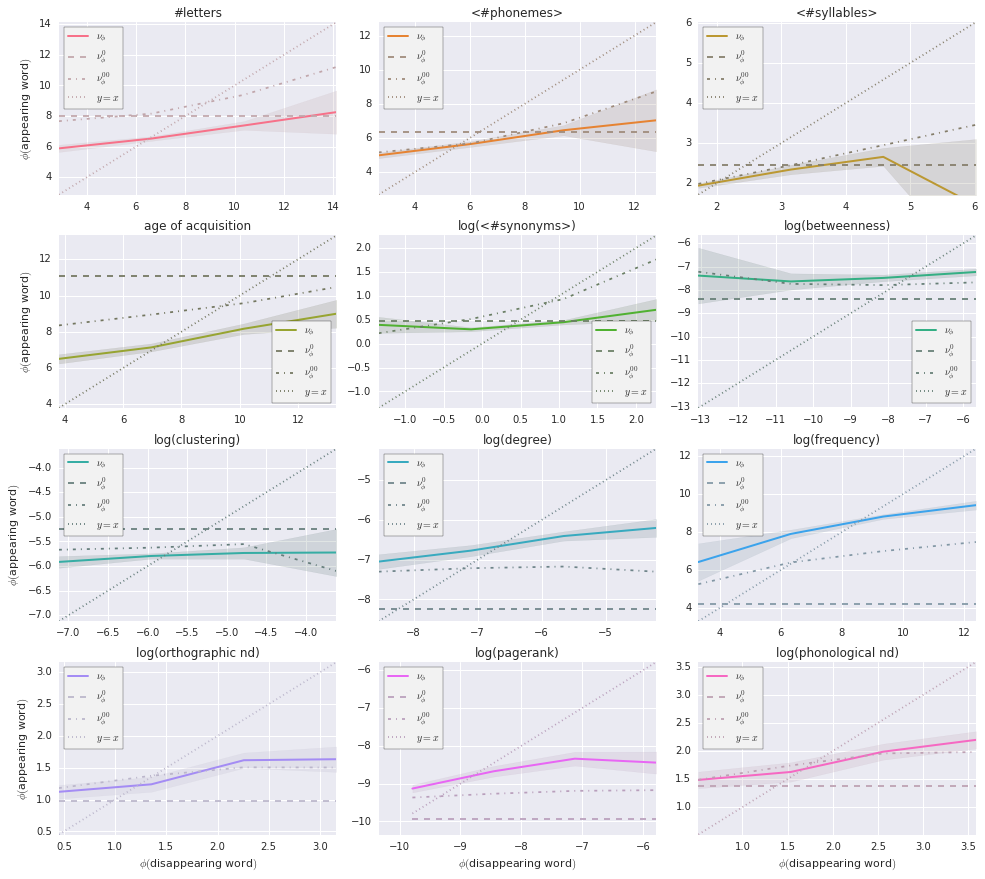

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

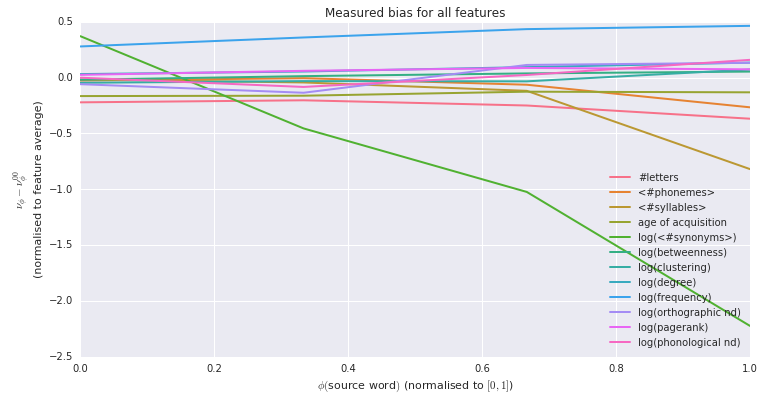

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | **  | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | *   |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | *** |
H_00 | ns. | *   | ns. | ns. |


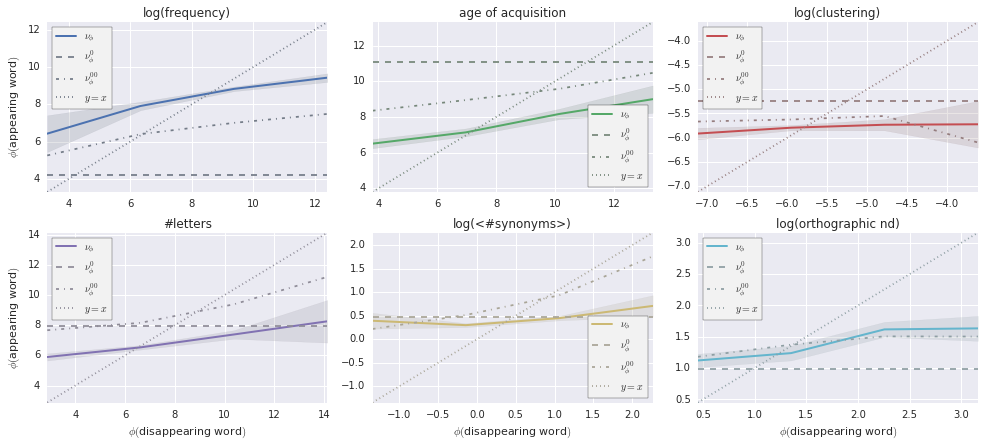

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

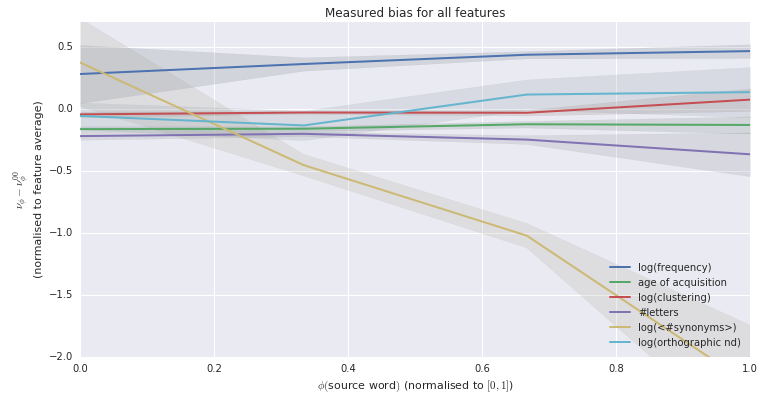

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | ns. | ns. | **  |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | ns. | **  |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | **  | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |


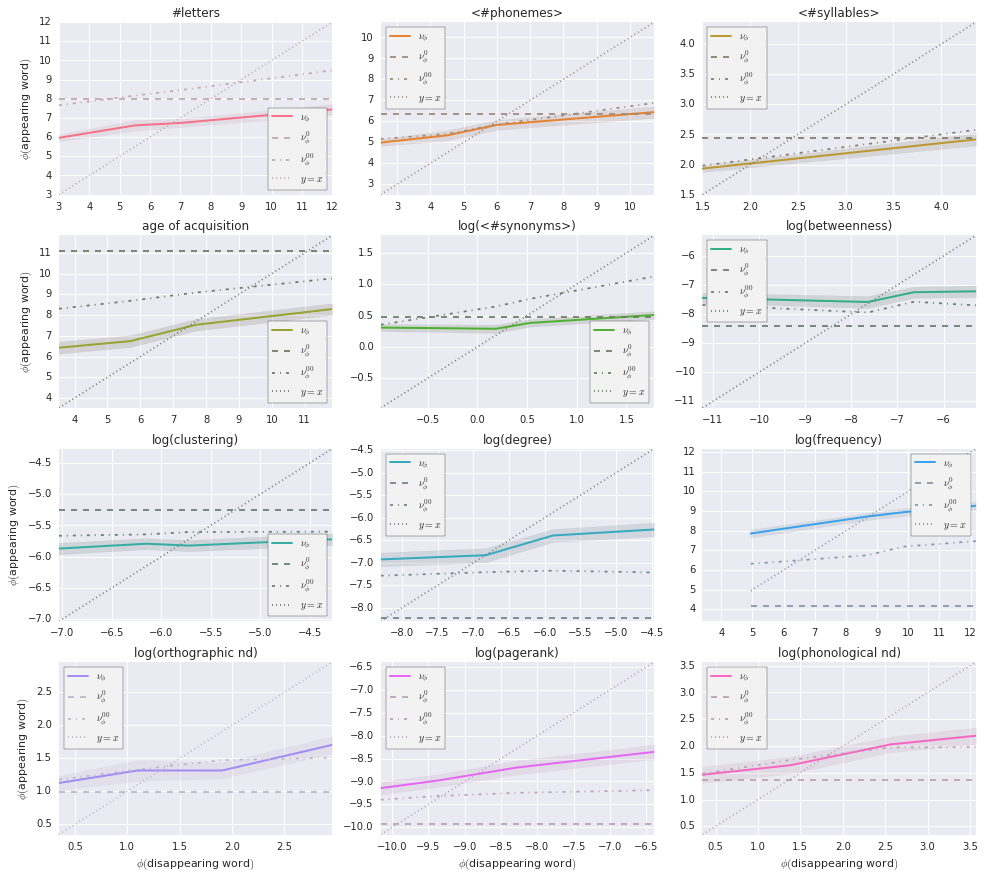

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

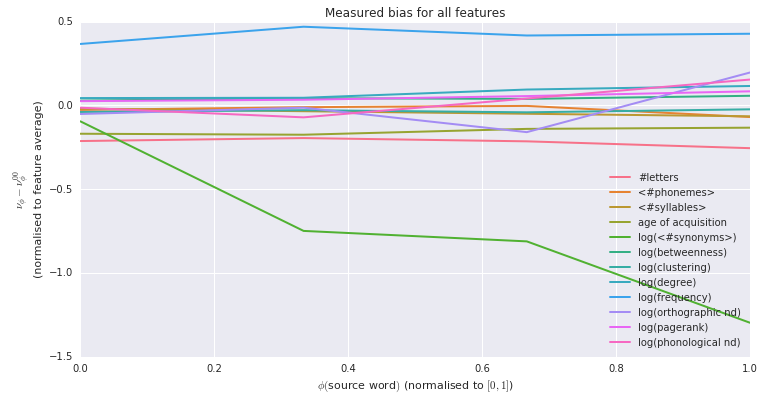

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | **  | **  |


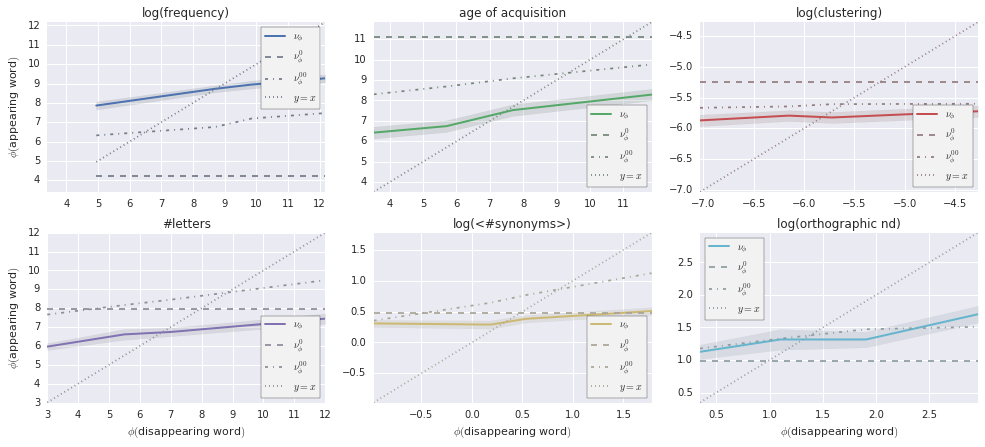

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

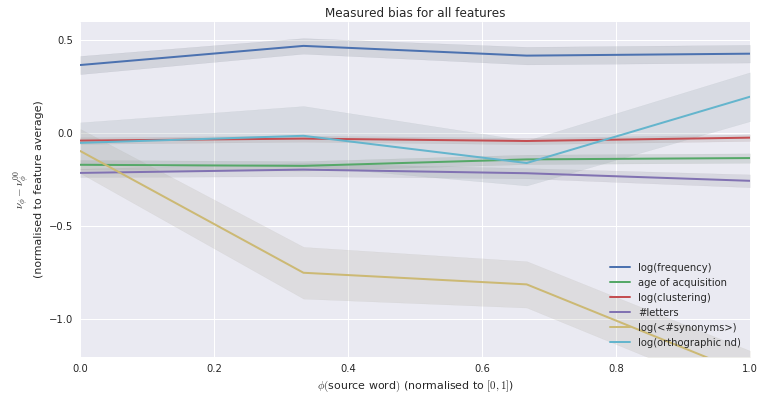

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | *   | *** |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | ns. |
H_00 | ns. | ns. | *   | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | ns. | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | *   | ns. | ns. |


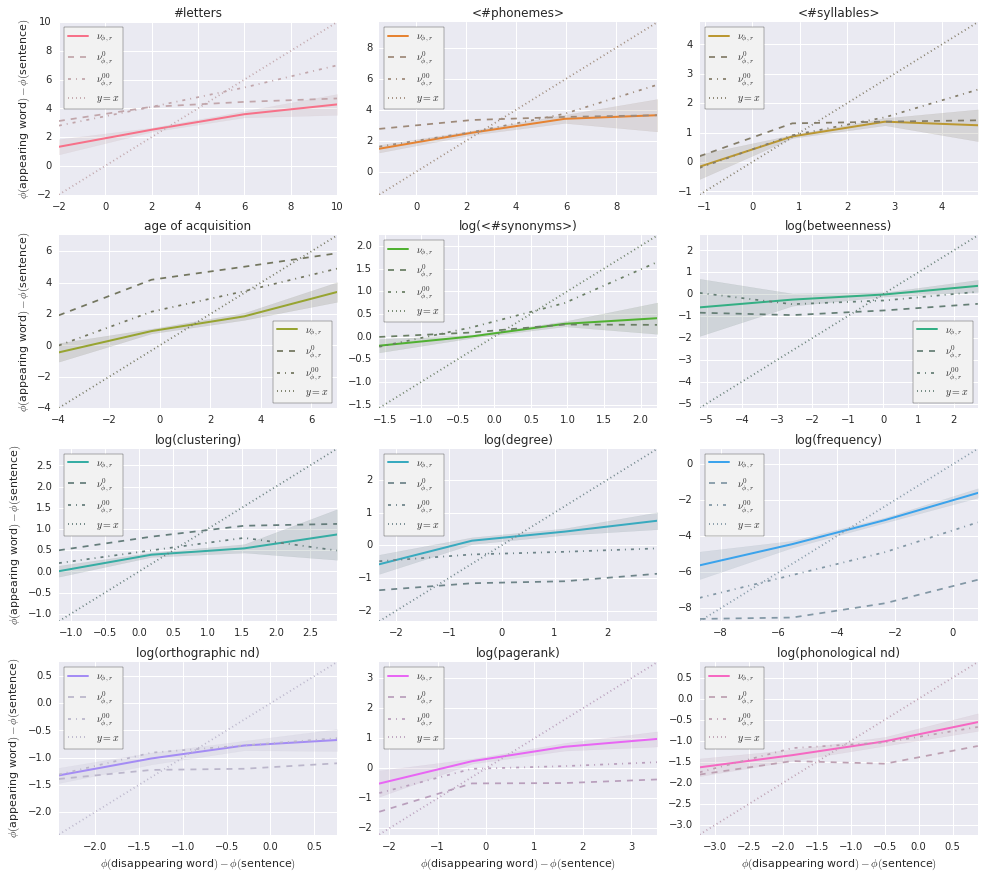

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

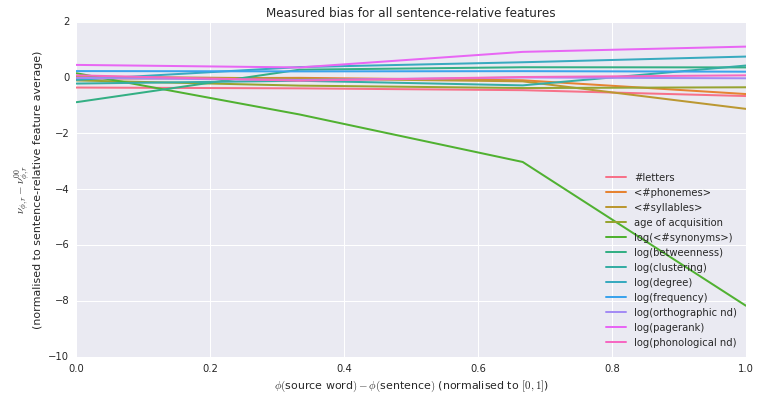

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | **  | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


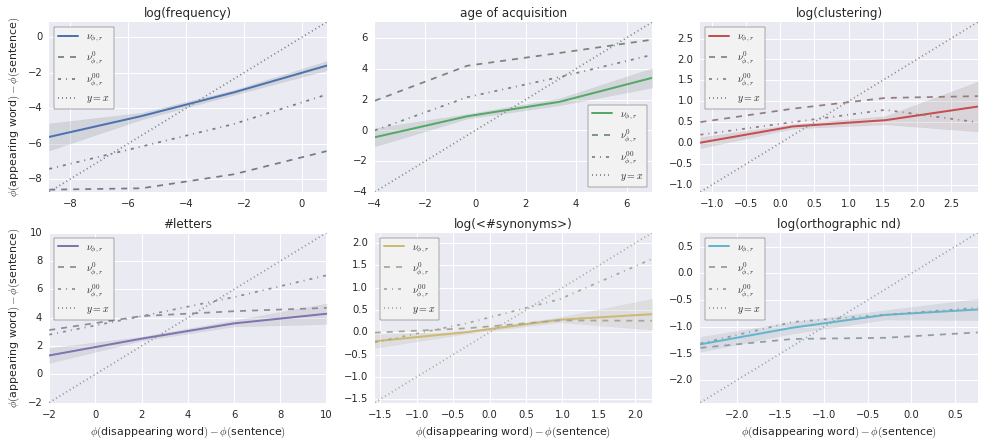

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

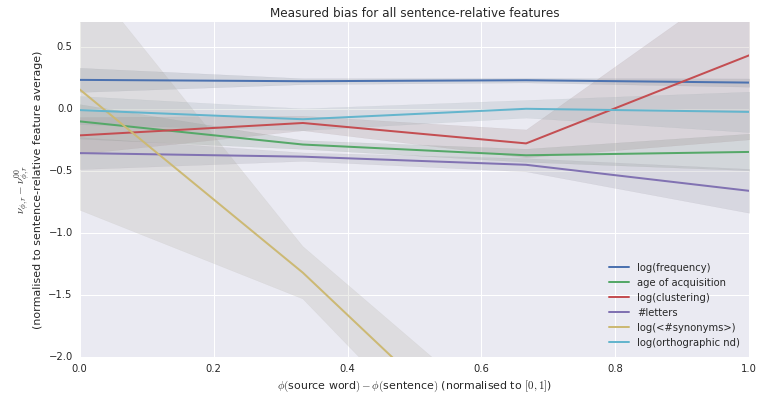

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | ns. | ns. | *** |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | **  |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *   | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | *** | *** |
H_00 | ns. | *   | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | **  | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *   | *** | *** |
H_00 | ns. | **  | ns. | ns. |


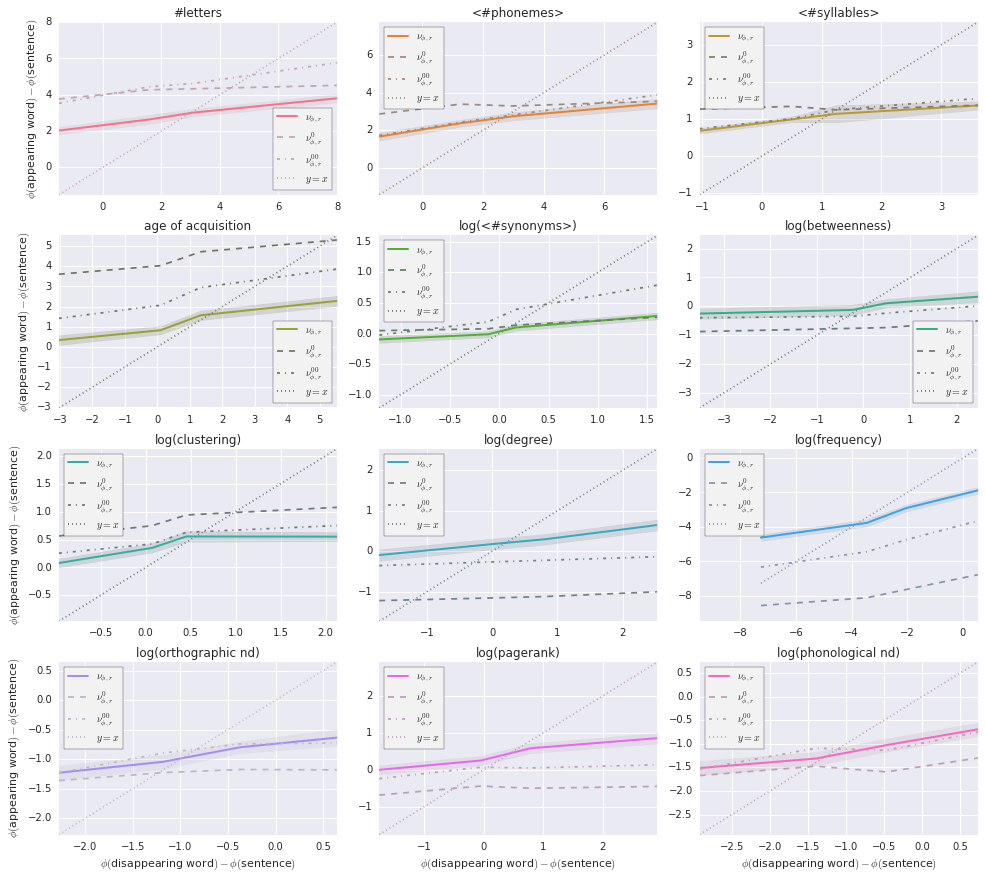

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

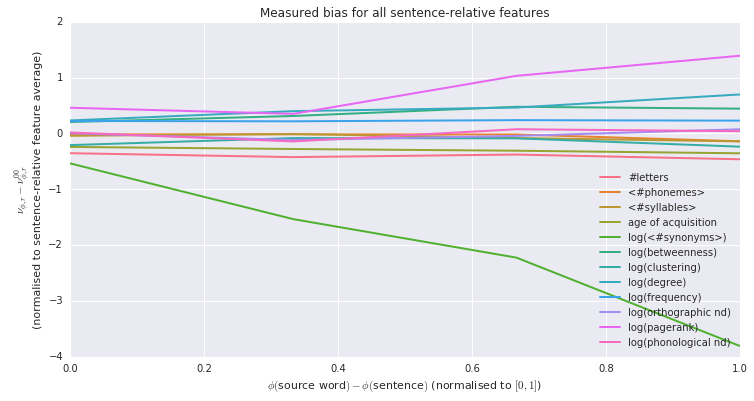

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | ns. | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | *** | *** |
H_00 | ns. | *   | ns. | ns. |


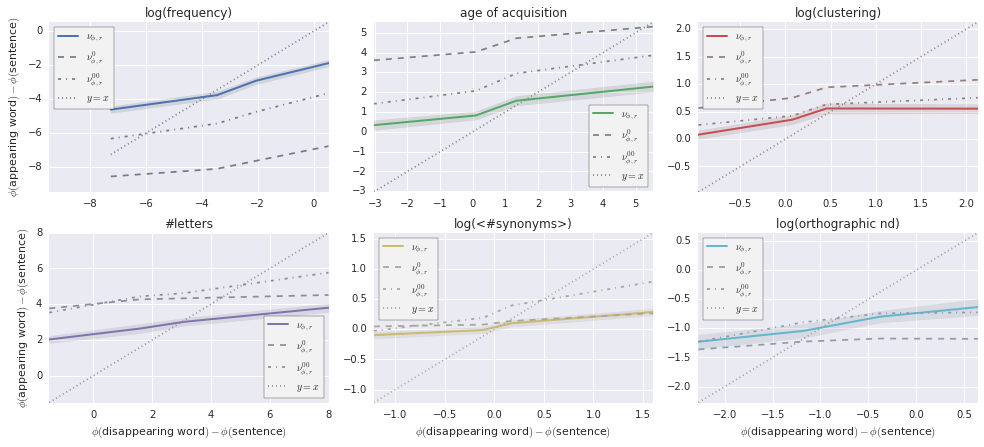

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

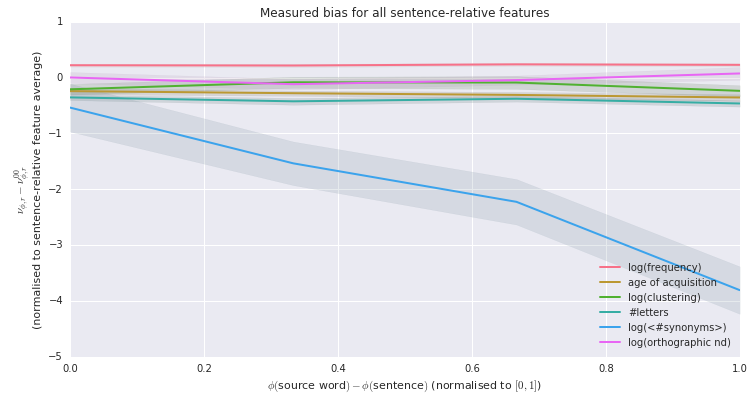

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


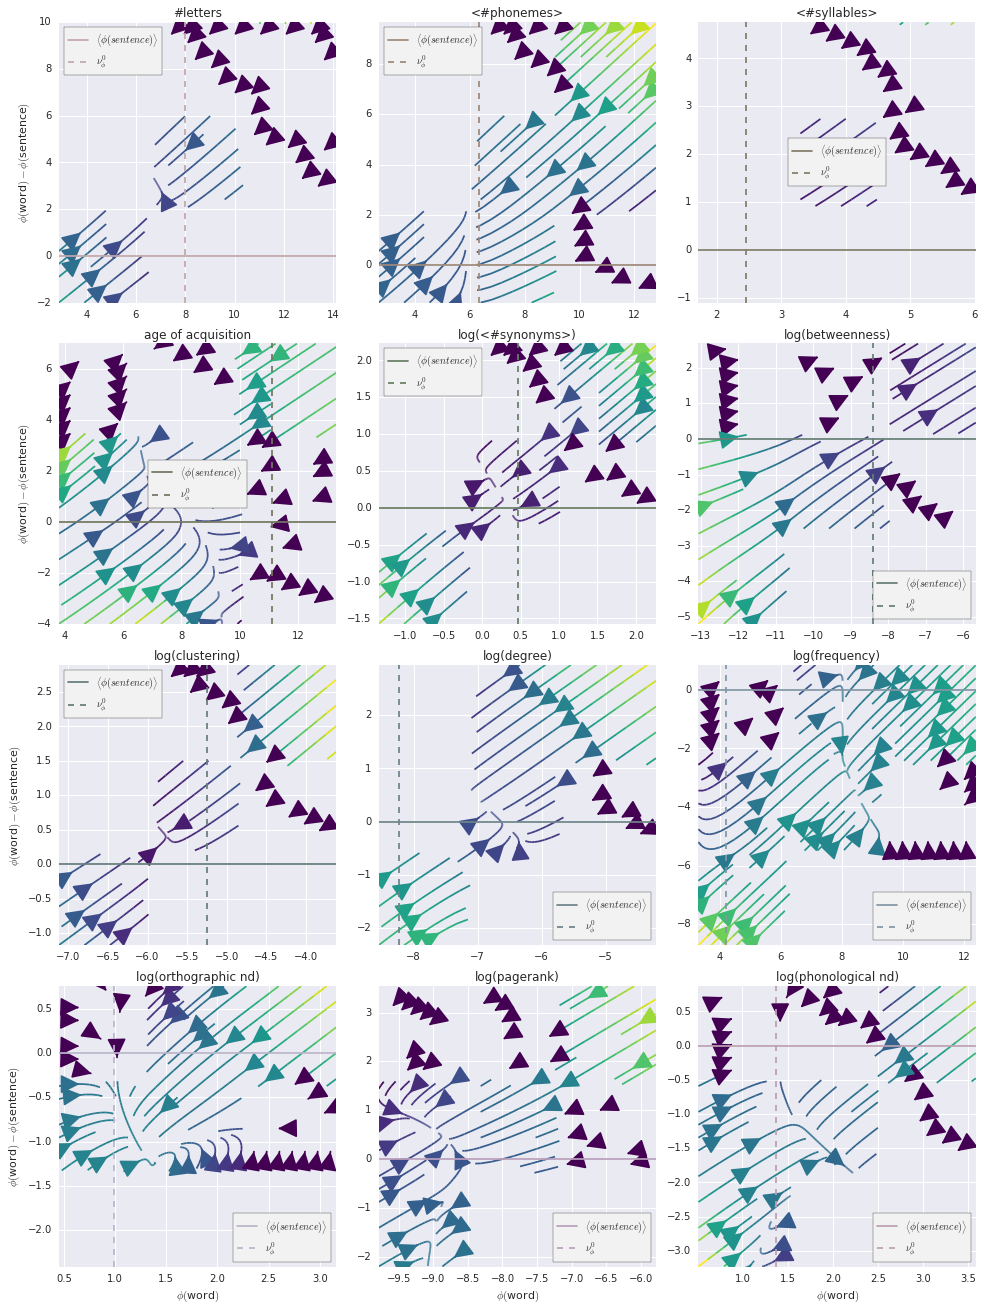

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


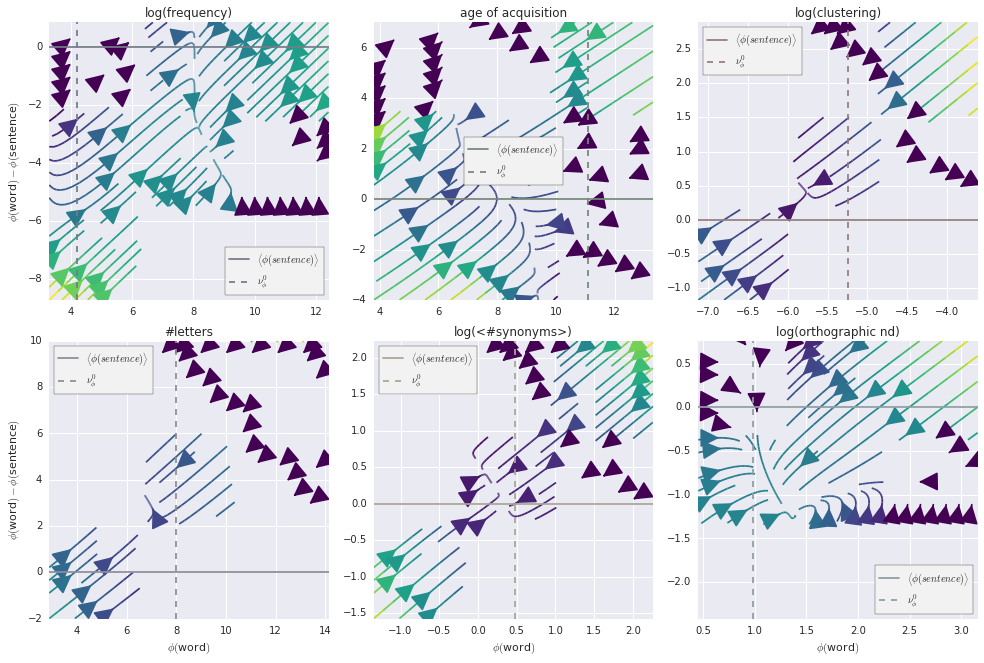

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54524495  0.16370501  0.07906218  0.07227532  0.03526427  0.03202987
  0.01800163  0.01683115  0.01605263  0.00910056]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.442862     0.271912   -0.082695  0.240169   0.211617   
Component-1  0.331654    -0.396213    0.151260 -0.305348  -0.282081   
Component-2  0.785902     0.306015   -0.134585  0.140068   0.457912   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.452416              0.216613  0.274649       -0.437600   
Component-1      -0.424253              0.157518 -0.312938       -0.416612   
Component-2      -0.094539              0.027404  0.091835       -0.037318   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.271462        -0.168397        0.007760  
Component-1              0.183872        -0.164905        0.005765  
Component-2              0.130397         0.011658       -0.068147

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 26988) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    4 of 26988) |            | Elapsed Time: 0:00:45 ETA: 3 days, 13:12:14

  0% (   28 of 26988) |                    | Elapsed Time: 0:00:45 ETA: 12:13:01

  0% (   52 of 26988) |                     | Elapsed Time: 0:00:45 ETA: 6:36:13

  0% (   76 of 26988) |                     | Elapsed Time: 0:00:46 ETA: 4:32:04

  0% (  100 of 26988) |                     | Elapsed Time: 0:00:46 ETA: 0:04:17

  0% (  124 of 26988) |                     | Elapsed Time: 0:00:46 ETA: 0:03:54

  0% (  149 of 26988) |                     | Elapsed Time: 0:00:46 ETA: 0:03:50

  0% (  173 of 26988) |                     | Elapsed Time: 0:00:46 ETA: 0:03:50

  0% (  199 of 26988) |                     | Elapsed Time: 0:00:47 ETA: 0:03:46

  0% (  224 of 26988) |                     | Elapsed Time: 0:00:47 ETA: 0:03:43

  0% (  251 of 26988) |                     | Elapsed Time: 0:00:47 ETA: 0:03:37

  1% (  277 of 26988) |                     | Elapsed Time: 0:00:47 ETA: 0:03:33

  1% (  303 of 26988) |                     | Elapsed Time: 0:00:47 ETA: 0:03:28

  1% (  338 of 26988) |                     | Elapsed Time: 0:00:48 ETA: 0:03:28

  1% (  370 of 26988) |                     | Elapsed Time: 0:00:48 ETA: 0:03:18

  1% (  399 of 26988) |                     | Elapsed Time: 0:00:48 ETA: 0:03:14

  1% (  428 of 26988) |                     | Elapsed Time: 0:00:48 ETA: 0:03:11

  1% (  455 of 26988) |                     | Elapsed Time: 0:00:49 ETA: 0:03:10

  1% (  483 of 26988) |                     | Elapsed Time: 0:00:49 ETA: 0:03:12

  1% (  509 of 26988) |                     | Elapsed Time: 0:00:49 ETA: 0:03:19

  1% (  532 of 26988) |                     | Elapsed Time: 0:00:49 ETA: 0:03:30

  2% (  558 of 26988) |                     | Elapsed Time: 0:00:49 ETA: 0:03:32

  2% (  580 of 26988) |                     | Elapsed Time: 0:00:50 ETA: 0:03:42

  2% (  601 of 26988) |                     | Elapsed Time: 0:00:50 ETA: 0:03:59

  2% (  612 of 26988) |                     | Elapsed Time: 0:00:50 ETA: 0:04:30

  2% (  623 of 26988) |                     | Elapsed Time: 0:00:50 ETA: 0:05:27

  2% (  634 of 26988) |                     | Elapsed Time: 0:00:50 ETA: 0:06:34

  2% (  645 of 26988) |                     | Elapsed Time: 0:00:51 ETA: 0:08:00

  2% (  675 of 26988) |                     | Elapsed Time: 0:00:51 ETA: 0:06:15

  2% (  711 of 26988) |                     | Elapsed Time: 0:00:51 ETA: 0:04:28

  2% (  737 of 26988) |                     | Elapsed Time: 0:00:51 ETA: 0:03:49

  2% (  759 of 26988) |                     | Elapsed Time: 0:00:52 ETA: 0:03:25

  2% (  781 of 26988) |                     | Elapsed Time: 0:00:52 ETA: 0:03:21

  2% (  803 of 26988) |                     | Elapsed Time: 0:00:52 ETA: 0:03:43

  3% (  828 of 26988) |                     | Elapsed Time: 0:00:52 ETA: 0:04:01

  3% (  853 of 26988) |                     | Elapsed Time: 0:00:52 ETA: 0:03:54

  3% (  877 of 26988) |                     | Elapsed Time: 0:00:53 ETA: 0:03:47

  3% (  903 of 26988) |                     | Elapsed Time: 0:00:53 ETA: 0:03:40

  3% (  928 of 26988) |                     | Elapsed Time: 0:00:53 ETA: 0:03:37

  3% (  953 of 26988) |                     | Elapsed Time: 0:00:53 ETA: 0:03:36

  3% (  977 of 26988) |                     | Elapsed Time: 0:00:53 ETA: 0:03:37

  3% ( 1002 of 26988) |                     | Elapsed Time: 0:00:54 ETA: 0:03:37

  3% ( 1023 of 26988) |                     | Elapsed Time: 0:00:54 ETA: 0:03:54

  3% ( 1044 of 26988) |                     | Elapsed Time: 0:00:54 ETA: 0:04:02

  3% ( 1069 of 26988) |                     | Elapsed Time: 0:00:54 ETA: 0:04:03

  4% ( 1095 of 26988) |                     | Elapsed Time: 0:00:54 ETA: 0:04:02

  4% ( 1120 of 26988) |                     | Elapsed Time: 0:00:55 ETA: 0:03:53

  4% ( 1145 of 26988) |                     | Elapsed Time: 0:00:55 ETA: 0:03:38

  4% ( 1170 of 26988) |                     | Elapsed Time: 0:00:55 ETA: 0:03:34

  4% ( 1196 of 26988) |                     | Elapsed Time: 0:00:55 ETA: 0:03:34

  4% ( 1225 of 26988) |                     | Elapsed Time: 0:00:56 ETA: 0:03:26

  4% ( 1255 of 26988) |                     | Elapsed Time: 0:00:56 ETA: 0:03:16

  4% ( 1285 of 26988) |                     | Elapsed Time: 0:00:56 ETA: 0:03:08

  4% ( 1314 of 26988) |#                    | Elapsed Time: 0:00:56 ETA: 0:03:01

  5% ( 1350 of 26988) |#                    | Elapsed Time: 0:00:56 ETA: 0:02:59

  5% ( 1380 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:57

  5% ( 1410 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:57

  5% ( 1440 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:57

  5% ( 1469 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:56

  5% ( 1499 of 26988) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:56

  5% ( 1529 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:56

  5% ( 1559 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:56

  5% ( 1589 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:56

  5% ( 1619 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:54

  6% ( 1650 of 26988) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:53

  6% ( 1687 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:51

  6% ( 1719 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:49

  6% ( 1751 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:46

  6% ( 1783 of 26988) |#                    | Elapsed Time: 0:00:59 ETA: 0:02:44

  6% ( 1815 of 26988) |#                    | Elapsed Time: 0:01:00 ETA: 0:02:43

  6% ( 1847 of 26988) |#                    | Elapsed Time: 0:01:00 ETA: 0:02:43

  6% ( 1879 of 26988) |#                    | Elapsed Time: 0:01:00 ETA: 0:02:43

  7% ( 1909 of 26988) |#                    | Elapsed Time: 0:01:00 ETA: 0:02:44

  7% ( 1939 of 26988) |#                    | Elapsed Time: 0:01:00 ETA: 0:02:46

  7% ( 1969 of 26988) |#                    | Elapsed Time: 0:01:01 ETA: 0:02:47

  7% ( 1999 of 26988) |#                    | Elapsed Time: 0:01:01 ETA: 0:02:48

  7% ( 2040 of 26988) |#                    | Elapsed Time: 0:01:01 ETA: 0:02:50

  7% ( 2070 of 26988) |#                    | Elapsed Time: 0:01:01 ETA: 0:02:49

  7% ( 2100 of 26988) |#                    | Elapsed Time: 0:01:01 ETA: 0:02:49

  7% ( 2131 of 26988) |#                    | Elapsed Time: 0:01:02 ETA: 0:02:48

  8% ( 2161 of 26988) |#                    | Elapsed Time: 0:01:02 ETA: 0:02:48

  8% ( 2192 of 26988) |#                    | Elapsed Time: 0:01:02 ETA: 0:02:47

  8% ( 2222 of 26988) |#                    | Elapsed Time: 0:01:02 ETA: 0:02:47

  8% ( 2252 of 26988) |#                    | Elapsed Time: 0:01:02 ETA: 0:02:47

  8% ( 2300 of 26988) |#                    | Elapsed Time: 0:01:03 ETA: 0:02:43

  8% ( 2331 of 26988) |#                    | Elapsed Time: 0:01:03 ETA: 0:02:42

  8% ( 2377 of 26988) |#                    | Elapsed Time: 0:01:03 ETA: 0:02:41

  8% ( 2390 of 26988) |#                    | Elapsed Time: 0:01:04 ETA: 0:03:05

  8% ( 2402 of 26988) |#                    | Elapsed Time: 0:01:04 ETA: 0:03:41

  9% ( 2429 of 26988) |#                    | Elapsed Time: 0:01:04 ETA: 0:03:52

  9% ( 2455 of 26988) |#                    | Elapsed Time: 0:01:04 ETA: 0:04:02

  9% ( 2481 of 26988) |#                    | Elapsed Time: 0:01:04 ETA: 0:04:01

  9% ( 2508 of 26988) |#                    | Elapsed Time: 0:01:05 ETA: 0:03:22

  9% ( 2536 of 26988) |#                    | Elapsed Time: 0:01:05 ETA: 0:03:09

  9% ( 2564 of 26988) |#                    | Elapsed Time: 0:01:05 ETA: 0:03:08

  9% ( 2591 of 26988) |##                   | Elapsed Time: 0:01:05 ETA: 0:03:07

  9% ( 2618 of 26988) |##                   | Elapsed Time: 0:01:05 ETA: 0:03:07

  9% ( 2638 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:03:22

  9% ( 2657 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:03:36

 10% ( 2699 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:03:26

 10% ( 2728 of 26988) |##                   | Elapsed Time: 0:01:06 ETA: 0:03:21

 10% ( 2762 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:11

 10% ( 2789 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:02:48

 10% ( 2809 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:02

 10% ( 2828 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:19

 10% ( 2848 of 26988) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:45

 10% ( 2868 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:23

 10% ( 2888 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:22

 10% ( 2907 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:22

 10% ( 2926 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:22

 10% ( 2946 of 26988) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:22

 10% ( 2966 of 26988) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:22

 11% ( 2986 of 26988) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:22

 11% ( 3006 of 26988) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:21

 11% ( 3026 of 26988) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:21

 11% ( 3047 of 26988) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:20

 11% ( 3067 of 26988) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:20

 11% ( 3088 of 26988) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:15

 11% ( 3117 of 26988) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:48

 11% ( 3150 of 26988) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:21

 11% ( 3174 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:03:12

 11% ( 3198 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:03:05

 11% ( 3221 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:03:08

 12% ( 3243 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:03:27

 12% ( 3266 of 26988) |##                   | Elapsed Time: 0:01:11 ETA: 0:03:35

 12% ( 3290 of 26988) |##                   | Elapsed Time: 0:01:12 ETA: 0:03:35

 12% ( 3313 of 26988) |##                   | Elapsed Time: 0:01:12 ETA: 0:03:35

 12% ( 3336 of 26988) |##                   | Elapsed Time: 0:01:12 ETA: 0:03:35

 12% ( 3360 of 26988) |##                   | Elapsed Time: 0:01:12 ETA: 0:03:34

 12% ( 3386 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:03:33

 12% ( 3410 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:03:32

 12% ( 3434 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:03:32

 12% ( 3457 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:03:33

 12% ( 3479 of 26988) |##                   | Elapsed Time: 0:01:13 ETA: 0:03:35

 12% ( 3501 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:03:39

 13% ( 3524 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:03:40

 13% ( 3550 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:03:33

 13% ( 3576 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:03:24

 13% ( 3607 of 26988) |##                   | Elapsed Time: 0:01:14 ETA: 0:03:07

 13% ( 3638 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:02:52

 13% ( 3669 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:02:44

 13% ( 3711 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:02:34

 13% ( 3743 of 26988) |##                   | Elapsed Time: 0:01:15 ETA: 0:02:31

 13% ( 3773 of 26988) |##                   | Elapsed Time: 0:01:16 ETA: 0:02:32

 14% ( 3808 of 26988) |##                   | Elapsed Time: 0:01:16 ETA: 0:02:27

 14% ( 3834 of 26988) |##                   | Elapsed Time: 0:01:16 ETA: 0:02:34

 14% ( 3858 of 26988) |###                  | Elapsed Time: 0:01:16 ETA: 0:02:45

 14% ( 3890 of 26988) |###                  | Elapsed Time: 0:01:16 ETA: 0:02:45

 14% ( 3920 of 26988) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:48

 14% ( 3950 of 26988) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:51

 14% ( 3980 of 26988) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:45

 14% ( 4009 of 26988) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:41

 14% ( 4039 of 26988) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:42

 15% ( 4056 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:03:00

 15% ( 4075 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:03:20

 15% ( 4104 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:03:20

 15% ( 4138 of 26988) |###                  | Elapsed Time: 0:01:18 ETA: 0:03:11

 15% ( 4172 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:58

 15% ( 4206 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:30

 15% ( 4238 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:23

 15% ( 4267 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:27

 15% ( 4294 of 26988) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:32

 16% ( 4328 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:31

 16% ( 4361 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:31

 16% ( 4402 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:30

 16% ( 4428 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:30

 16% ( 4464 of 26988) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:26

 16% ( 4500 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:02:24

 16% ( 4536 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:02:19

 16% ( 4572 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:02:11

 17% ( 4607 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:02:08

 17% ( 4643 of 26988) |###                  | Elapsed Time: 0:01:21 ETA: 0:02:08

 17% ( 4678 of 26988) |###                  | Elapsed Time: 0:01:22 ETA: 0:02:09

 17% ( 4723 of 26988) |###                  | Elapsed Time: 0:01:22 ETA: 0:02:09

 17% ( 4751 of 26988) |###                  | Elapsed Time: 0:01:22 ETA: 0:02:16

 17% ( 4779 of 26988) |###                  | Elapsed Time: 0:01:22 ETA: 0:02:24

 17% ( 4806 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:02:31

 17% ( 4826 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:02:50

 17% ( 4846 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:03:18

 18% ( 4866 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:03:25

 18% ( 4886 of 26988) |###                  | Elapsed Time: 0:01:23 ETA: 0:03:46

 18% ( 4906 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:51

 18% ( 4926 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:51

 18% ( 4946 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:51

 18% ( 4966 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:52

 18% ( 4986 of 26988) |###                  | Elapsed Time: 0:01:24 ETA: 0:03:52

 18% ( 5006 of 26988) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:51

 18% ( 5026 of 26988) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:49

 18% ( 5048 of 26988) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:43

 18% ( 5077 of 26988) |###                  | Elapsed Time: 0:01:25 ETA: 0:03:22

 18% ( 5092 of 26988) |###                  | Elapsed Time: 0:01:26 ETA: 0:03:34

 18% ( 5116 of 26988) |###                  | Elapsed Time: 0:01:26 ETA: 0:03:26

 19% ( 5150 of 26988) |####                 | Elapsed Time: 0:01:26 ETA: 0:03:02

 19% ( 5182 of 26988) |####                 | Elapsed Time: 0:01:26 ETA: 0:02:50

 19% ( 5214 of 26988) |####                 | Elapsed Time: 0:01:26 ETA: 0:02:39

 19% ( 5240 of 26988) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:24

 19% ( 5269 of 26988) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:28

 19% ( 5296 of 26988) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:35

 19% ( 5318 of 26988) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:49

 19% ( 5339 of 26988) |####                 | Elapsed Time: 0:01:27 ETA: 0:03:02

 19% ( 5359 of 26988) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:13

 19% ( 5386 of 26988) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:18

 20% ( 5406 of 26988) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:43

 20% ( 5430 of 26988) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:31

 20% ( 5454 of 26988) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:23

 20% ( 5472 of 26988) |####                 | Elapsed Time: 0:01:29 ETA: 0:03:30

 20% ( 5491 of 26988) |####                 | Elapsed Time: 0:01:29 ETA: 0:03:40

 20% ( 5519 of 26988) |####                 | Elapsed Time: 0:01:29 ETA: 0:03:12

 20% ( 5551 of 26988) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:59

 20% ( 5580 of 26988) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:53

 20% ( 5606 of 26988) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:37

 20% ( 5635 of 26988) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:30

 20% ( 5666 of 26988) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:32

 21% ( 5693 of 26988) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:32

 21% ( 5735 of 26988) |####                 | Elapsed Time: 0:01:31 ETA: 0:02:32

 21% ( 5757 of 26988) |####                 | Elapsed Time: 0:01:31 ETA: 0:02:37

 21% ( 5777 of 26988) |####                 | Elapsed Time: 0:01:31 ETA: 0:02:51

 21% ( 5799 of 26988) |####                 | Elapsed Time: 0:01:31 ETA: 0:02:59

 21% ( 5829 of 26988) |####                 | Elapsed Time: 0:01:31 ETA: 0:02:59

 21% ( 5855 of 26988) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:02

 21% ( 5884 of 26988) |####                 | Elapsed Time: 0:01:32 ETA: 0:02:48

 21% ( 5910 of 26988) |####                 | Elapsed Time: 0:01:32 ETA: 0:02:39

 21% ( 5936 of 26988) |####                 | Elapsed Time: 0:01:32 ETA: 0:02:41

 22% ( 5962 of 26988) |####                 | Elapsed Time: 0:01:32 ETA: 0:02:39

 22% ( 5988 of 26988) |####                 | Elapsed Time: 0:01:33 ETA: 0:02:41

 22% ( 6014 of 26988) |####                 | Elapsed Time: 0:01:33 ETA: 0:02:43

 22% ( 6040 of 26988) |####                 | Elapsed Time: 0:01:33 ETA: 0:02:43

 22% ( 6073 of 26988) |####                 | Elapsed Time: 0:01:33 ETA: 0:02:44

 22% ( 6099 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:02:43

 22% ( 6125 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:02:43

 22% ( 6151 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:02:43

 22% ( 6177 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:02:42

 22% ( 6203 of 26988) |####                 | Elapsed Time: 0:01:34 ETA: 0:02:42

 23% ( 6222 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:02:54

 23% ( 6238 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:03:12

 23% ( 6262 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:03:45

 23% ( 6278 of 26988) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:15

 23% ( 6297 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:13

 23% ( 6327 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:33

 23% ( 6357 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:03:05

 23% ( 6386 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:02:46

 23% ( 6410 of 26988) |####                 | Elapsed Time: 0:01:36 ETA: 0:02:39

 23% ( 6430 of 26988) |#####                | Elapsed Time: 0:01:37 ETA: 0:02:47

 23% ( 6450 of 26988) |#####                | Elapsed Time: 0:01:37 ETA: 0:03:03

 23% ( 6469 of 26988) |#####                | Elapsed Time: 0:01:37 ETA: 0:03:24

 24% ( 6493 of 26988) |#####                | Elapsed Time: 0:01:37 ETA: 0:03:24

 24% ( 6519 of 26988) |#####                | Elapsed Time: 0:01:37 ETA: 0:03:13

 24% ( 6547 of 26988) |#####                | Elapsed Time: 0:01:38 ETA: 0:02:59

 24% ( 6576 of 26988) |#####                | Elapsed Time: 0:01:38 ETA: 0:02:43

 24% ( 6603 of 26988) |#####                | Elapsed Time: 0:01:38 ETA: 0:02:32

 24% ( 6627 of 26988) |#####                | Elapsed Time: 0:01:38 ETA: 0:02:37

 24% ( 6648 of 26988) |#####                | Elapsed Time: 0:01:38 ETA: 0:02:45

 24% ( 6670 of 26988) |#####                | Elapsed Time: 0:01:39 ETA: 0:02:51

 24% ( 6692 of 26988) |#####                | Elapsed Time: 0:01:39 ETA: 0:03:06

 24% ( 6717 of 26988) |#####                | Elapsed Time: 0:01:39 ETA: 0:03:09

 25% ( 6748 of 26988) |#####                | Elapsed Time: 0:01:39 ETA: 0:02:53

 25% ( 6774 of 26988) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:47

 25% ( 6800 of 26988) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:42

 25% ( 6826 of 26988) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:38

 25% ( 6852 of 26988) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:38

 25% ( 6878 of 26988) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:40

 25% ( 6904 of 26988) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:40

 25% ( 6930 of 26988) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:41

 25% ( 6956 of 26988) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:40

 25% ( 6982 of 26988) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:41

 25% ( 7010 of 26988) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:37

 26% ( 7040 of 26988) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:31

 26% ( 7069 of 26988) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:26

 26% ( 7099 of 26988) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:23

 26% ( 7132 of 26988) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:15

 26% ( 7158 of 26988) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:20

 26% ( 7187 of 26988) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:22

 26% ( 7218 of 26988) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:19

 26% ( 7243 of 26988) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:25

 26% ( 7259 of 26988) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:42

 26% ( 7283 of 26988) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:48

 27% ( 7314 of 26988) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:45

 27% ( 7345 of 26988) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:41

 27% ( 7377 of 26988) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:26

 27% ( 7404 of 26988) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:16

 27% ( 7416 of 26988) |#####                | Elapsed Time: 0:01:45 ETA: 0:02:39

 27% ( 7428 of 26988) |#####                | Elapsed Time: 0:01:45 ETA: 0:03:12

 27% ( 7446 of 26988) |#####                | Elapsed Time: 0:01:45 ETA: 0:03:43

 27% ( 7465 of 26988) |#####                | Elapsed Time: 0:01:45 ETA: 0:04:17

 27% ( 7491 of 26988) |#####                | Elapsed Time: 0:01:45 ETA: 0:03:52

 27% ( 7525 of 26988) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:00

 27% ( 7552 of 26988) |#####                | Elapsed Time: 0:01:46 ETA: 0:02:39

 28% ( 7579 of 26988) |#####                | Elapsed Time: 0:01:46 ETA: 0:02:28

 28% ( 7612 of 26988) |#####                | Elapsed Time: 0:01:46 ETA: 0:02:12

 28% ( 7643 of 26988) |#####                | Elapsed Time: 0:01:46 ETA: 0:02:15

 28% ( 7664 of 26988) |#####                | Elapsed Time: 0:01:47 ETA: 0:02:23

 28% ( 7685 of 26988) |#####                | Elapsed Time: 0:01:47 ETA: 0:02:32

 28% ( 7707 of 26988) |#####                | Elapsed Time: 0:01:47 ETA: 0:02:42

 28% ( 7729 of 26988) |######               | Elapsed Time: 0:01:47 ETA: 0:03:02

 28% ( 7750 of 26988) |######               | Elapsed Time: 0:01:47 ETA: 0:03:09

 28% ( 7769 of 26988) |######               | Elapsed Time: 0:01:48 ETA: 0:03:14

 28% ( 7787 of 26988) |######               | Elapsed Time: 0:01:48 ETA: 0:03:21

 28% ( 7805 of 26988) |######               | Elapsed Time: 0:01:48 ETA: 0:03:28

 28% ( 7823 of 26988) |######               | Elapsed Time: 0:01:48 ETA: 0:03:40

 29% ( 7843 of 26988) |######               | Elapsed Time: 0:01:49 ETA: 0:03:35

 29% ( 7871 of 26988) |######               | Elapsed Time: 0:01:49 ETA: 0:03:12

 29% ( 7898 of 26988) |######               | Elapsed Time: 0:01:49 ETA: 0:02:55

 29% ( 7926 of 26988) |######               | Elapsed Time: 0:01:49 ETA: 0:02:39

 29% ( 7961 of 26988) |######               | Elapsed Time: 0:01:49 ETA: 0:02:17

 29% ( 7996 of 26988) |######               | Elapsed Time: 0:01:50 ETA: 0:02:07

 29% ( 8024 of 26988) |######               | Elapsed Time: 0:01:50 ETA: 0:02:05

 29% ( 8049 of 26988) |######               | Elapsed Time: 0:01:50 ETA: 0:02:07

 29% ( 8076 of 26988) |######               | Elapsed Time: 0:01:50 ETA: 0:02:12

 30% ( 8114 of 26988) |######               | Elapsed Time: 0:01:50 ETA: 0:02:12

 30% ( 8146 of 26988) |######               | Elapsed Time: 0:01:51 ETA: 0:02:13

 30% ( 8172 of 26988) |######               | Elapsed Time: 0:01:51 ETA: 0:02:13

 30% ( 8192 of 26988) |######               | Elapsed Time: 0:01:51 ETA: 0:02:17

 30% ( 8221 of 26988) |######               | Elapsed Time: 0:01:51 ETA: 0:02:20

 30% ( 8247 of 26988) |######               | Elapsed Time: 0:01:51 ETA: 0:02:32

 30% ( 8263 of 26988) |######               | Elapsed Time: 0:01:52 ETA: 0:02:53

 30% ( 8279 of 26988) |######               | Elapsed Time: 0:01:52 ETA: 0:02:58

 30% ( 8294 of 26988) |######               | Elapsed Time: 0:01:52 ETA: 0:03:18

 30% ( 8310 of 26988) |######               | Elapsed Time: 0:01:52 ETA: 0:03:58

 30% ( 8326 of 26988) |######               | Elapsed Time: 0:01:53 ETA: 0:04:09

 30% ( 8342 of 26988) |######               | Elapsed Time: 0:01:53 ETA: 0:04:10

 30% ( 8358 of 26988) |######               | Elapsed Time: 0:01:53 ETA: 0:04:09

 31% ( 8374 of 26988) |######               | Elapsed Time: 0:01:53 ETA: 0:04:08

 31% ( 8390 of 26988) |######               | Elapsed Time: 0:01:53 ETA: 0:04:07

 31% ( 8406 of 26988) |######               | Elapsed Time: 0:01:54 ETA: 0:04:06

 31% ( 8422 of 26988) |######               | Elapsed Time: 0:01:54 ETA: 0:04:04

 31% ( 8442 of 26988) |######               | Elapsed Time: 0:01:54 ETA: 0:04:03

 31% ( 8458 of 26988) |######               | Elapsed Time: 0:01:54 ETA: 0:04:04

 31% ( 8474 of 26988) |######               | Elapsed Time: 0:01:54 ETA: 0:04:05

 31% ( 8490 of 26988) |######               | Elapsed Time: 0:01:55 ETA: 0:04:05

 31% ( 8506 of 26988) |######               | Elapsed Time: 0:01:55 ETA: 0:04:04

 31% ( 8522 of 26988) |######               | Elapsed Time: 0:01:55 ETA: 0:04:02

 31% ( 8538 of 26988) |######               | Elapsed Time: 0:01:55 ETA: 0:04:00

 31% ( 8554 of 26988) |######               | Elapsed Time: 0:01:56 ETA: 0:03:58

 31% ( 8568 of 26988) |######               | Elapsed Time: 0:01:56 ETA: 0:04:04

 31% ( 8586 of 26988) |######               | Elapsed Time: 0:01:56 ETA: 0:03:58

 31% ( 8620 of 26988) |######               | Elapsed Time: 0:01:56 ETA: 0:03:10

 32% ( 8653 of 26988) |######               | Elapsed Time: 0:01:56 ETA: 0:02:40

 32% ( 8678 of 26988) |######               | Elapsed Time: 0:01:57 ETA: 0:02:24

 32% ( 8702 of 26988) |######               | Elapsed Time: 0:01:57 ETA: 0:02:14

 32% ( 8726 of 26988) |######               | Elapsed Time: 0:01:57 ETA: 0:02:16

 32% ( 8750 of 26988) |######               | Elapsed Time: 0:01:57 ETA: 0:02:27

 32% ( 8784 of 26988) |######               | Elapsed Time: 0:01:57 ETA: 0:02:35

 32% ( 8808 of 26988) |######               | Elapsed Time: 0:01:58 ETA: 0:02:37

 32% ( 8832 of 26988) |######               | Elapsed Time: 0:01:58 ETA: 0:02:39

 32% ( 8856 of 26988) |######               | Elapsed Time: 0:01:58 ETA: 0:02:40

 32% ( 8880 of 26988) |######               | Elapsed Time: 0:01:58 ETA: 0:02:42

 32% ( 8904 of 26988) |######               | Elapsed Time: 0:01:59 ETA: 0:02:42

 33% ( 8928 of 26988) |######               | Elapsed Time: 0:01:59 ETA: 0:02:41

 33% ( 8952 of 26988) |######               | Elapsed Time: 0:01:59 ETA: 0:02:41

 33% ( 8975 of 26988) |######               | Elapsed Time: 0:01:59 ETA: 0:02:41

 33% ( 8997 of 26988) |#######              | Elapsed Time: 0:01:59 ETA: 0:02:43

 33% ( 9019 of 26988) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:44

 33% ( 9046 of 26988) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:38

 33% ( 9074 of 26988) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:31

 33% ( 9109 of 26988) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:24

 33% ( 9134 of 26988) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:20

 33% ( 9156 of 26988) |#######              | Elapsed Time: 0:02:01 ETA: 0:02:20

 34% ( 9180 of 26988) |#######              | Elapsed Time: 0:02:01 ETA: 0:02:28

 34% ( 9202 of 26988) |#######              | Elapsed Time: 0:02:01 ETA: 0:02:34

 34% ( 9224 of 26988) |#######              | Elapsed Time: 0:02:01 ETA: 0:02:42

 34% ( 9246 of 26988) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:43

 34% ( 9268 of 26988) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:44

 34% ( 9290 of 26988) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:43

 34% ( 9314 of 26988) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:42

 34% ( 9338 of 26988) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:41

 34% ( 9362 of 26988) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:40

 34% ( 9386 of 26988) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:38

 34% ( 9410 of 26988) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:38

 34% ( 9434 of 26988) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:37

 35% ( 9457 of 26988) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:38

 35% ( 9481 of 26988) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:38

 35% ( 9511 of 26988) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:28

 35% ( 9541 of 26988) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:20

 35% ( 9572 of 26988) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:11

 35% ( 9601 of 26988) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:04

 35% ( 9618 of 26988) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:14

 35% ( 9634 of 26988) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:34

 35% ( 9650 of 26988) |#######              | Elapsed Time: 0:02:05 ETA: 0:03:03

 35% ( 9679 of 26988) |#######              | Elapsed Time: 0:02:05 ETA: 0:03:01

 35% ( 9705 of 26988) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:58

 36% ( 9719 of 26988) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:59

 36% ( 9733 of 26988) |#######              | Elapsed Time: 0:02:06 ETA: 0:03:00

 36% ( 9747 of 26988) |#######              | Elapsed Time: 0:02:06 ETA: 0:03:12

 36% ( 9761 of 26988) |#######              | Elapsed Time: 0:02:06 ETA: 0:04:12

 36% ( 9775 of 26988) |#######              | Elapsed Time: 0:02:07 ETA: 0:04:19

 36% ( 9791 of 26988) |#######              | Elapsed Time: 0:02:07 ETA: 0:04:20

 36% ( 9805 of 26988) |#######              | Elapsed Time: 0:02:07 ETA: 0:04:21

 36% ( 9821 of 26988) |#######              | Elapsed Time: 0:02:07 ETA: 0:04:13

 36% ( 9857 of 26988) |#######              | Elapsed Time: 0:02:07 ETA: 0:03:08

 36% ( 9890 of 26988) |#######              | Elapsed Time: 0:02:08 ETA: 0:02:33

 36% ( 9920 of 26988) |#######              | Elapsed Time: 0:02:08 ETA: 0:02:11

 36% ( 9947 of 26988) |#######              | Elapsed Time: 0:02:08 ETA: 0:01:58

 36% ( 9973 of 26988) |#######              | Elapsed Time: 0:02:08 ETA: 0:02:00

 37% (10001 of 26988) |#######              | Elapsed Time: 0:02:09 ETA: 0:02:08

 37% (10034 of 26988) |#######              | Elapsed Time: 0:02:09 ETA: 0:02:04

 37% (10060 of 26988) |#######              | Elapsed Time: 0:02:09 ETA: 0:02:06

 37% (10079 of 26988) |#######              | Elapsed Time: 0:02:09 ETA: 0:02:13

 37% (10093 of 26988) |#######              | Elapsed Time: 0:02:09 ETA: 0:02:27

 37% (10107 of 26988) |#######              | Elapsed Time: 0:02:10 ETA: 0:02:56

 37% (10121 of 26988) |#######              | Elapsed Time: 0:02:10 ETA: 0:03:33

 37% (10135 of 26988) |#######              | Elapsed Time: 0:02:10 ETA: 0:04:08

 37% (10149 of 26988) |#######              | Elapsed Time: 0:02:10 ETA: 0:04:09

 37% (10163 of 26988) |#######              | Elapsed Time: 0:02:10 ETA: 0:04:08

 37% (10177 of 26988) |#######              | Elapsed Time: 0:02:11 ETA: 0:04:08

 37% (10191 of 26988) |#######              | Elapsed Time: 0:02:11 ETA: 0:04:07

 37% (10205 of 26988) |#######              | Elapsed Time: 0:02:11 ETA: 0:04:07

 37% (10219 of 26988) |#######              | Elapsed Time: 0:02:11 ETA: 0:04:07

 37% (10233 of 26988) |#######              | Elapsed Time: 0:02:11 ETA: 0:04:07

 37% (10247 of 26988) |#######              | Elapsed Time: 0:02:12 ETA: 0:04:08

 38% (10280 of 26988) |#######              | Elapsed Time: 0:02:12 ETA: 0:03:10

 38% (10312 of 26988) |########             | Elapsed Time: 0:02:12 ETA: 0:02:35

 38% (10343 of 26988) |########             | Elapsed Time: 0:02:12 ETA: 0:02:13

 38% (10371 of 26988) |########             | Elapsed Time: 0:02:12 ETA: 0:01:58

 38% (10399 of 26988) |########             | Elapsed Time: 0:02:13 ETA: 0:01:53

 38% (10423 of 26988) |########             | Elapsed Time: 0:02:13 ETA: 0:02:02

 38% (10447 of 26988) |########             | Elapsed Time: 0:02:13 ETA: 0:02:11

 38% (10469 of 26988) |########             | Elapsed Time: 0:02:13 ETA: 0:02:16

 38% (10494 of 26988) |########             | Elapsed Time: 0:02:14 ETA: 0:02:19

 38% (10519 of 26988) |########             | Elapsed Time: 0:02:14 ETA: 0:02:23

 39% (10543 of 26988) |########             | Elapsed Time: 0:02:14 ETA: 0:02:21

 39% (10568 of 26988) |########             | Elapsed Time: 0:02:14 ETA: 0:02:19

 39% (10592 of 26988) |########             | Elapsed Time: 0:02:14 ETA: 0:02:18

 39% (10620 of 26988) |########             | Elapsed Time: 0:02:15 ETA: 0:02:13

 39% (10649 of 26988) |########             | Elapsed Time: 0:02:15 ETA: 0:02:08

 39% (10676 of 26988) |########             | Elapsed Time: 0:02:15 ETA: 0:02:06

 39% (10700 of 26988) |########             | Elapsed Time: 0:02:15 ETA: 0:02:06

 39% (10724 of 26988) |########             | Elapsed Time: 0:02:15 ETA: 0:02:08

 39% (10748 of 26988) |########             | Elapsed Time: 0:02:16 ETA: 0:02:10

 39% (10773 of 26988) |########             | Elapsed Time: 0:02:16 ETA: 0:02:19

 40% (10811 of 26988) |########             | Elapsed Time: 0:02:16 ETA: 0:02:10

 40% (10841 of 26988) |########             | Elapsed Time: 0:02:16 ETA: 0:02:04

 40% (10874 of 26988) |########             | Elapsed Time: 0:02:16 ETA: 0:01:55

 40% (10901 of 26988) |########             | Elapsed Time: 0:02:17 ETA: 0:01:52

 40% (10925 of 26988) |########             | Elapsed Time: 0:02:17 ETA: 0:01:55

 40% (10949 of 26988) |########             | Elapsed Time: 0:02:17 ETA: 0:01:59

 40% (10975 of 26988) |########             | Elapsed Time: 0:02:17 ETA: 0:02:04

 40% (11005 of 26988) |########             | Elapsed Time: 0:02:18 ETA: 0:02:05

 40% (11028 of 26988) |########             | Elapsed Time: 0:02:18 ETA: 0:02:08

 40% (11052 of 26988) |########             | Elapsed Time: 0:02:18 ETA: 0:02:09

 41% (11082 of 26988) |########             | Elapsed Time: 0:02:18 ETA: 0:02:02

 41% (11114 of 26988) |########             | Elapsed Time: 0:02:18 ETA: 0:02:00

 41% (11146 of 26988) |########             | Elapsed Time: 0:02:19 ETA: 0:02:00

 41% (11172 of 26988) |########             | Elapsed Time: 0:02:19 ETA: 0:01:57

 41% (11199 of 26988) |########             | Elapsed Time: 0:02:19 ETA: 0:01:56

 41% (11227 of 26988) |########             | Elapsed Time: 0:02:19 ETA: 0:02:00

 41% (11256 of 26988) |########             | Elapsed Time: 0:02:19 ETA: 0:02:00

 41% (11286 of 26988) |########             | Elapsed Time: 0:02:20 ETA: 0:01:56

 41% (11311 of 26988) |########             | Elapsed Time: 0:02:20 ETA: 0:01:56

 42% (11347 of 26988) |########             | Elapsed Time: 0:02:20 ETA: 0:01:49

 42% (11370 of 26988) |########             | Elapsed Time: 0:02:20 ETA: 0:01:53

 42% (11388 of 26988) |########             | Elapsed Time: 0:02:20 ETA: 0:02:04

 42% (11417 of 26988) |########             | Elapsed Time: 0:02:21 ETA: 0:01:59

 42% (11445 of 26988) |########             | Elapsed Time: 0:02:21 ETA: 0:02:05

 42% (11470 of 26988) |########             | Elapsed Time: 0:02:21 ETA: 0:02:07

 42% (11490 of 26988) |########             | Elapsed Time: 0:02:21 ETA: 0:02:14

 42% (11512 of 26988) |########             | Elapsed Time: 0:02:22 ETA: 0:02:10

 42% (11534 of 26988) |########             | Elapsed Time: 0:02:22 ETA: 0:02:18

 42% (11557 of 26988) |########             | Elapsed Time: 0:02:22 ETA: 0:02:24

 42% (11581 of 26988) |#########            | Elapsed Time: 0:02:22 ETA: 0:02:24

 43% (11605 of 26988) |#########            | Elapsed Time: 0:02:22 ETA: 0:02:19

 43% (11634 of 26988) |#########            | Elapsed Time: 0:02:23 ETA: 0:02:10

 43% (11660 of 26988) |#########            | Elapsed Time: 0:02:23 ETA: 0:02:07

 43% (11674 of 26988) |#########            | Elapsed Time: 0:02:23 ETA: 0:02:21

 43% (11697 of 26988) |#########            | Elapsed Time: 0:02:23 ETA: 0:02:24

 43% (11727 of 26988) |#########            | Elapsed Time: 0:02:23 ETA: 0:02:18

 43% (11757 of 26988) |#########            | Elapsed Time: 0:02:24 ETA: 0:02:18

 43% (11775 of 26988) |#########            | Elapsed Time: 0:02:24 ETA: 0:02:16

 43% (11808 of 26988) |#########            | Elapsed Time: 0:02:24 ETA: 0:01:55

 43% (11840 of 26988) |#########            | Elapsed Time: 0:02:24 ETA: 0:01:53

 43% (11872 of 26988) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:54

 44% (11905 of 26988) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:45

 44% (11936 of 26988) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:37

 44% (11962 of 26988) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:41

 44% (11988 of 26988) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:45

 44% (12014 of 26988) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:52

 44% (12040 of 26988) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:58

 44% (12066 of 26988) |#########            | Elapsed Time: 0:02:26 ETA: 0:02:00

 44% (12092 of 26988) |#########            | Elapsed Time: 0:02:26 ETA: 0:02:00

 44% (12118 of 26988) |#########            | Elapsed Time: 0:02:26 ETA: 0:02:00

 45% (12145 of 26988) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:06

 45% (12161 of 26988) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:23

 45% (12179 of 26988) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:33

 45% (12203 of 26988) |#########            | Elapsed Time: 0:02:27 ETA: 0:02:36

 45% (12227 of 26988) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:38

 45% (12251 of 26988) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:21

 45% (12276 of 26988) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:07

 45% (12300 of 26988) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:05

 45% (12324 of 26988) |#########            | Elapsed Time: 0:02:28 ETA: 0:02:05

 45% (12347 of 26988) |#########            | Elapsed Time: 0:02:29 ETA: 0:02:06

 45% (12393 of 26988) |#########            | Elapsed Time: 0:02:29 ETA: 0:01:57

 46% (12425 of 26988) |#########            | Elapsed Time: 0:02:29 ETA: 0:01:48

 46% (12458 of 26988) |#########            | Elapsed Time: 0:02:29 ETA: 0:01:40

 46% (12496 of 26988) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:38

 46% (12528 of 26988) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:37

 46% (12564 of 26988) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:35

 46% (12596 of 26988) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:35

 46% (12626 of 26988) |#########            | Elapsed Time: 0:02:30 ETA: 0:01:35

 46% (12656 of 26988) |#########            | Elapsed Time: 0:02:31 ETA: 0:01:31

 46% (12681 of 26988) |#########            | Elapsed Time: 0:02:31 ETA: 0:01:39

 47% (12699 of 26988) |#########            | Elapsed Time: 0:02:31 ETA: 0:01:52

 47% (12727 of 26988) |#########            | Elapsed Time: 0:02:31 ETA: 0:01:55

 47% (12755 of 26988) |#########            | Elapsed Time: 0:02:31 ETA: 0:01:57

 47% (12800 of 26988) |#########            | Elapsed Time: 0:02:32 ETA: 0:01:49

 47% (12835 of 26988) |#########            | Elapsed Time: 0:02:32 ETA: 0:01:42

 47% (12867 of 26988) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:38

 47% (12899 of 26988) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:35

 47% (12933 of 26988) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:33

 48% (12962 of 26988) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:32

 48% (12985 of 26988) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:37

 48% (13007 of 26988) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:45

 48% (13027 of 26988) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:59

 48% (13045 of 26988) |##########           | Elapsed Time: 0:02:34 ETA: 0:02:18

 48% (13088 of 26988) |##########           | Elapsed Time: 0:02:34 ETA: 0:02:07

 48% (13114 of 26988) |##########           | Elapsed Time: 0:02:34 ETA: 0:02:01

 48% (13142 of 26988) |##########           | Elapsed Time: 0:02:34 ETA: 0:01:51

 48% (13187 of 26988) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:35

 48% (13219 of 26988) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:36

 49% (13251 of 26988) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:32

 49% (13281 of 26988) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:30

 49% (13326 of 26988) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:30

 49% (13357 of 26988) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:30

 49% (13379 of 26988) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:36

 49% (13408 of 26988) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:38

 49% (13433 of 26988) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:42

 49% (13462 of 26988) |##########           | Elapsed Time: 0:02:37 ETA: 0:01:44

 50% (13495 of 26988) |##########           | Elapsed Time: 0:02:37 ETA: 0:01:46

 50% (13517 of 26988) |##########           | Elapsed Time: 0:02:37 ETA: 0:01:53

 50% (13544 of 26988) |##########           | Elapsed Time: 0:02:37 ETA: 0:01:52

 50% (13573 of 26988) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:51

 50% (13606 of 26988) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:46

 50% (13632 of 26988) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:39

 50% (13668 of 26988) |##########           | Elapsed Time: 0:02:38 ETA: 0:01:39

 50% (13693 of 26988) |##########           | Elapsed Time: 0:02:39 ETA: 0:01:42

 50% (13711 of 26988) |##########           | Elapsed Time: 0:02:39 ETA: 0:01:56

 50% (13729 of 26988) |##########           | Elapsed Time: 0:02:39 ETA: 0:02:05

 50% (13748 of 26988) |##########           | Elapsed Time: 0:02:39 ETA: 0:02:13

 51% (13776 of 26988) |##########           | Elapsed Time: 0:02:39 ETA: 0:02:11

 51% (13802 of 26988) |##########           | Elapsed Time: 0:02:40 ETA: 0:02:04

 51% (13832 of 26988) |##########           | Elapsed Time: 0:02:40 ETA: 0:01:55

 51% (13855 of 26988) |##########           | Elapsed Time: 0:02:40 ETA: 0:01:50

 51% (13876 of 26988) |##########           | Elapsed Time: 0:02:40 ETA: 0:01:55

 51% (13896 of 26988) |##########           | Elapsed Time: 0:02:40 ETA: 0:02:02

 51% (13925 of 26988) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:57

 51% (13950 of 26988) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:57

 51% (13975 of 26988) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:54

 51% (14003 of 26988) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:45

 51% (14031 of 26988) |##########           | Elapsed Time: 0:02:41 ETA: 0:01:38

 52% (14058 of 26988) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:40

 52% (14080 of 26988) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:42

 52% (14103 of 26988) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:45

 52% (14129 of 26988) |##########           | Elapsed Time: 0:02:42 ETA: 0:01:48

 52% (14169 of 26988) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:46

 52% (14198 of 26988) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:42

 52% (14226 of 26988) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:37

 52% (14254 of 26988) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:31

 52% (14282 of 26988) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:34

 53% (14310 of 26988) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:31

 53% (14343 of 26988) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:29

 53% (14375 of 26988) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:27

 53% (14407 of 26988) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:24

 53% (14434 of 26988) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:25

 53% (14458 of 26988) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:29

 53% (14486 of 26988) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:31

 53% (14507 of 26988) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:41

 53% (14536 of 26988) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:43

 53% (14568 of 26988) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:37

 54% (14597 of 26988) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:34

 54% (14624 of 26988) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:32

 54% (14648 of 26988) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:29

 54% (14677 of 26988) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:34

 54% (14709 of 26988) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:31

 54% (14741 of 26988) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:29

 54% (14773 of 26988) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:22

 54% (14803 of 26988) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:21

 54% (14824 of 26988) |###########          | Elapsed Time: 0:02:47 ETA: 0:01:27

 55% (14858 of 26988) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:30

 55% (14886 of 26988) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:32

 55% (14912 of 26988) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:36

 55% (14938 of 26988) |###########          | Elapsed Time: 0:02:48 ETA: 0:01:37

 55% (14966 of 26988) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:32

 55% (14998 of 26988) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:28

 55% (15025 of 26988) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:30

 55% (15044 of 26988) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:33

 55% (15076 of 26988) |###########          | Elapsed Time: 0:02:49 ETA: 0:01:28

 55% (15107 of 26988) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:28

 56% (15134 of 26988) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:32

 56% (15158 of 26988) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:27

 56% (15192 of 26988) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:31

 56% (15214 of 26988) |###########          | Elapsed Time: 0:02:50 ETA: 0:01:39

 56% (15238 of 26988) |###########          | Elapsed Time: 0:02:51 ETA: 0:01:41

 56% (15269 of 26988) |###########          | Elapsed Time: 0:02:51 ETA: 0:01:36

 56% (15300 of 26988) |###########          | Elapsed Time: 0:02:51 ETA: 0:01:32

 56% (15327 of 26988) |###########          | Elapsed Time: 0:02:51 ETA: 0:01:27

 56% (15352 of 26988) |###########          | Elapsed Time: 0:02:52 ETA: 0:01:25

 56% (15382 of 26988) |###########          | Elapsed Time: 0:02:52 ETA: 0:01:24

 57% (15410 of 26988) |###########          | Elapsed Time: 0:02:52 ETA: 0:01:26

 57% (15438 of 26988) |############         | Elapsed Time: 0:02:52 ETA: 0:01:25

 57% (15465 of 26988) |############         | Elapsed Time: 0:02:52 ETA: 0:01:24

 57% (15495 of 26988) |############         | Elapsed Time: 0:02:53 ETA: 0:01:23

 57% (15519 of 26988) |############         | Elapsed Time: 0:02:53 ETA: 0:01:29

 57% (15544 of 26988) |############         | Elapsed Time: 0:02:53 ETA: 0:01:32

 57% (15575 of 26988) |############         | Elapsed Time: 0:02:53 ETA: 0:01:28

 57% (15610 of 26988) |############         | Elapsed Time: 0:02:53 ETA: 0:01:27

 57% (15646 of 26988) |############         | Elapsed Time: 0:02:54 ETA: 0:01:18

 58% (15680 of 26988) |############         | Elapsed Time: 0:02:54 ETA: 0:01:13

 58% (15699 of 26988) |############         | Elapsed Time: 0:02:54 ETA: 0:01:17

 58% (15717 of 26988) |############         | Elapsed Time: 0:02:54 ETA: 0:01:25

 58% (15745 of 26988) |############         | Elapsed Time: 0:02:54 ETA: 0:01:31

 58% (15778 of 26988) |############         | Elapsed Time: 0:02:55 ETA: 0:01:32

 58% (15805 of 26988) |############         | Elapsed Time: 0:02:55 ETA: 0:01:31

 58% (15835 of 26988) |############         | Elapsed Time: 0:02:55 ETA: 0:01:22

 58% (15856 of 26988) |############         | Elapsed Time: 0:02:55 ETA: 0:01:22

 58% (15879 of 26988) |############         | Elapsed Time: 0:02:56 ETA: 0:01:30

 58% (15907 of 26988) |############         | Elapsed Time: 0:02:56 ETA: 0:01:29

 59% (15926 of 26988) |############         | Elapsed Time: 0:02:56 ETA: 0:01:39

 59% (15947 of 26988) |############         | Elapsed Time: 0:02:56 ETA: 0:01:41

 59% (15969 of 26988) |############         | Elapsed Time: 0:02:56 ETA: 0:01:42

 59% (15996 of 26988) |############         | Elapsed Time: 0:02:57 ETA: 0:01:41

 59% (16015 of 26988) |############         | Elapsed Time: 0:02:57 ETA: 0:01:44

 59% (16038 of 26988) |############         | Elapsed Time: 0:02:57 ETA: 0:01:42

 59% (16055 of 26988) |############         | Elapsed Time: 0:02:57 ETA: 0:01:47

 59% (16082 of 26988) |############         | Elapsed Time: 0:02:57 ETA: 0:01:48

 59% (16113 of 26988) |############         | Elapsed Time: 0:02:58 ETA: 0:01:32

 59% (16141 of 26988) |############         | Elapsed Time: 0:02:58 ETA: 0:01:30

 59% (16170 of 26988) |############         | Elapsed Time: 0:02:58 ETA: 0:01:21

 60% (16208 of 26988) |############         | Elapsed Time: 0:02:58 ETA: 0:01:15

 60% (16237 of 26988) |############         | Elapsed Time: 0:02:59 ETA: 0:01:16

 60% (16270 of 26988) |############         | Elapsed Time: 0:02:59 ETA: 0:01:14

 60% (16300 of 26988) |############         | Elapsed Time: 0:02:59 ETA: 0:01:13

 60% (16313 of 26988) |############         | Elapsed Time: 0:02:59 ETA: 0:01:25

 60% (16328 of 26988) |############         | Elapsed Time: 0:02:59 ETA: 0:01:38

 60% (16355 of 26988) |############         | Elapsed Time: 0:03:00 ETA: 0:01:40

 60% (16379 of 26988) |############         | Elapsed Time: 0:03:00 ETA: 0:01:48

 60% (16405 of 26988) |############         | Elapsed Time: 0:03:00 ETA: 0:01:42

 60% (16435 of 26988) |############         | Elapsed Time: 0:03:00 ETA: 0:01:23

 60% (16459 of 26988) |############         | Elapsed Time: 0:03:00 ETA: 0:01:25

 61% (16489 of 26988) |############         | Elapsed Time: 0:03:01 ETA: 0:01:19

 61% (16517 of 26988) |############         | Elapsed Time: 0:03:01 ETA: 0:01:19

 61% (16541 of 26988) |############         | Elapsed Time: 0:03:01 ETA: 0:01:23

 61% (16561 of 26988) |############         | Elapsed Time: 0:03:01 ETA: 0:01:29

 61% (16581 of 26988) |############         | Elapsed Time: 0:03:02 ETA: 0:01:33

 61% (16598 of 26988) |############         | Elapsed Time: 0:03:02 ETA: 0:01:45

 61% (16636 of 26988) |############         | Elapsed Time: 0:03:02 ETA: 0:01:42

 61% (16662 of 26988) |############         | Elapsed Time: 0:03:02 ETA: 0:01:35

 61% (16684 of 26988) |############         | Elapsed Time: 0:03:02 ETA: 0:01:34

 61% (16696 of 26988) |############         | Elapsed Time: 0:03:03 ETA: 0:01:41

 61% (16709 of 26988) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:55

 61% (16725 of 26988) |#############        | Elapsed Time: 0:03:03 ETA: 0:02:14

 62% (16741 of 26988) |#############        | Elapsed Time: 0:03:03 ETA: 0:02:37

 62% (16757 of 26988) |#############        | Elapsed Time: 0:03:04 ETA: 0:02:28

 62% (16773 of 26988) |#############        | Elapsed Time: 0:03:04 ETA: 0:02:18

 62% (16789 of 26988) |#############        | Elapsed Time: 0:03:04 ETA: 0:02:15

 62% (16812 of 26988) |#############        | Elapsed Time: 0:03:04 ETA: 0:02:03

 62% (16847 of 26988) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:38

 62% (16881 of 26988) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:28

 62% (16907 of 26988) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:20

 62% (16935 of 26988) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:13

 62% (16964 of 26988) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:14

 62% (16992 of 26988) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:15

 63% (17019 of 26988) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:14

 63% (17051 of 26988) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:11

 63% (17079 of 26988) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:11

 63% (17105 of 26988) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:13

 63% (17134 of 26988) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:12

 63% (17162 of 26988) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:13

 63% (17183 of 26988) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:19

 63% (17205 of 26988) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:21

 63% (17226 of 26988) |#############        | Elapsed Time: 0:03:07 ETA: 0:01:25

 63% (17257 of 26988) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:24

 64% (17287 of 26988) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:23

 64% (17310 of 26988) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:21

 64% (17340 of 26988) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:12

 64% (17364 of 26988) |#############        | Elapsed Time: 0:03:08 ETA: 0:01:16

 64% (17393 of 26988) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:15

 64% (17411 of 26988) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:19

 64% (17444 of 26988) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:13

 64% (17476 of 26988) |#############        | Elapsed Time: 0:03:09 ETA: 0:01:11

 64% (17506 of 26988) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:12

 64% (17525 of 26988) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:10

 65% (17552 of 26988) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:16

 65% (17573 of 26988) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:25

 65% (17601 of 26988) |#############        | Elapsed Time: 0:03:10 ETA: 0:01:26

 65% (17627 of 26988) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:25

 65% (17655 of 26988) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:19

 65% (17678 of 26988) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:16

 65% (17700 of 26988) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:18

 65% (17721 of 26988) |#############        | Elapsed Time: 0:03:11 ETA: 0:01:25

 65% (17743 of 26988) |#############        | Elapsed Time: 0:03:12 ETA: 0:01:23

 65% (17774 of 26988) |#############        | Elapsed Time: 0:03:12 ETA: 0:01:22

 65% (17804 of 26988) |#############        | Elapsed Time: 0:03:12 ETA: 0:01:15

 66% (17823 of 26988) |#############        | Elapsed Time: 0:03:12 ETA: 0:01:17

 66% (17844 of 26988) |#############        | Elapsed Time: 0:03:13 ETA: 0:01:17

 66% (17880 of 26988) |#############        | Elapsed Time: 0:03:13 ETA: 0:01:15

 66% (17906 of 26988) |#############        | Elapsed Time: 0:03:13 ETA: 0:01:16

 66% (17936 of 26988) |#############        | Elapsed Time: 0:03:13 ETA: 0:01:16

 66% (17970 of 26988) |#############        | Elapsed Time: 0:03:13 ETA: 0:01:04

 66% (18000 of 26988) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:02

 66% (18032 of 26988) |##############       | Elapsed Time: 0:03:14 ETA: 0:00:59

 66% (18060 of 26988) |##############       | Elapsed Time: 0:03:14 ETA: 0:00:59

 67% (18086 of 26988) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:01

 67% (18108 of 26988) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:07

 67% (18135 of 26988) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:09

 67% (18166 of 26988) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:08

 67% (18194 of 26988) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:09

 67% (18231 of 26988) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:04

 67% (18256 of 26988) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:04

 67% (18290 of 26988) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:01

 67% (18306 of 26988) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:09

 67% (18316 of 26988) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:21

 67% (18326 of 26988) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:37

 67% (18336 of 26988) |##############       | Elapsed Time: 0:03:17 ETA: 0:02:07

 68% (18355 of 26988) |##############       | Elapsed Time: 0:03:17 ETA: 0:02:28

 68% (18385 of 26988) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:47

 68% (18411 of 26988) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:28

 68% (18440 of 26988) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:13

 68% (18462 of 26988) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:06

 68% (18484 of 26988) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:11

 68% (18504 of 26988) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:15

 68% (18534 of 26988) |##############       | Elapsed Time: 0:03:18 ETA: 0:01:14

 68% (18569 of 26988) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:08

 68% (18597 of 26988) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:06

 69% (18624 of 26988) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:01

 69% (18639 of 26988) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:06

 69% (18656 of 26988) |##############       | Elapsed Time: 0:03:19 ETA: 0:01:17

 69% (18677 of 26988) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:24

 69% (18699 of 26988) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:30

 69% (18722 of 26988) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:28

 69% (18743 of 26988) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:19

 69% (18760 of 26988) |##############       | Elapsed Time: 0:03:20 ETA: 0:01:22

 69% (18777 of 26988) |##############       | Elapsed Time: 0:03:21 ETA: 0:01:28

 69% (18801 of 26988) |##############       | Elapsed Time: 0:03:21 ETA: 0:01:25

 69% (18832 of 26988) |##############       | Elapsed Time: 0:03:21 ETA: 0:01:20

 69% (18863 of 26988) |##############       | Elapsed Time: 0:03:21 ETA: 0:01:09

 70% (18907 of 26988) |##############       | Elapsed Time: 0:03:22 ETA: 0:00:57

 70% (18937 of 26988) |##############       | Elapsed Time: 0:03:22 ETA: 0:00:53

 70% (18964 of 26988) |##############       | Elapsed Time: 0:03:22 ETA: 0:00:54

 70% (18988 of 26988) |##############       | Elapsed Time: 0:03:22 ETA: 0:00:58

 70% (19012 of 26988) |##############       | Elapsed Time: 0:03:22 ETA: 0:01:01

 70% (19036 of 26988) |##############       | Elapsed Time: 0:03:23 ETA: 0:01:07

 70% (19064 of 26988) |##############       | Elapsed Time: 0:03:23 ETA: 0:01:07

 70% (19085 of 26988) |##############       | Elapsed Time: 0:03:23 ETA: 0:01:11

 70% (19105 of 26988) |##############       | Elapsed Time: 0:03:23 ETA: 0:01:13

 70% (19129 of 26988) |##############       | Elapsed Time: 0:03:23 ETA: 0:01:12

 70% (19158 of 26988) |##############       | Elapsed Time: 0:03:24 ETA: 0:01:07

 71% (19186 of 26988) |##############       | Elapsed Time: 0:03:24 ETA: 0:01:06

 71% (19201 of 26988) |##############       | Elapsed Time: 0:03:24 ETA: 0:01:09

 71% (19224 of 26988) |##############       | Elapsed Time: 0:03:24 ETA: 0:01:07

 71% (19235 of 26988) |##############       | Elapsed Time: 0:03:24 ETA: 0:01:16

 71% (19247 of 26988) |##############       | Elapsed Time: 0:03:25 ETA: 0:01:34

 71% (19263 of 26988) |##############       | Elapsed Time: 0:03:25 ETA: 0:01:49

 71% (19285 of 26988) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:40

 71% (19306 of 26988) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:41

 71% (19334 of 26988) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:19

 71% (19365 of 26988) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:03

 71% (19397 of 26988) |###############      | Elapsed Time: 0:03:26 ETA: 0:00:57

 71% (19427 of 26988) |###############      | Elapsed Time: 0:03:26 ETA: 0:00:53

 72% (19447 of 26988) |###############      | Elapsed Time: 0:03:26 ETA: 0:00:55

 72% (19468 of 26988) |###############      | Elapsed Time: 0:03:27 ETA: 0:00:59

 72% (19495 of 26988) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:01

 72% (19521 of 26988) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:04

 72% (19551 of 26988) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:01

 72% (19576 of 26988) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:01

 72% (19599 of 26988) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:01

 72% (19627 of 26988) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:01

 72% (19649 of 26988) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:03

 72% (19673 of 26988) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:04

 73% (19705 of 26988) |###############      | Elapsed Time: 0:03:29 ETA: 0:00:56

 73% (19734 of 26988) |###############      | Elapsed Time: 0:03:29 ETA: 0:00:56

 73% (19760 of 26988) |###############      | Elapsed Time: 0:03:29 ETA: 0:00:55

 73% (19781 of 26988) |###############      | Elapsed Time: 0:03:29 ETA: 0:00:55

 73% (19810 of 26988) |###############      | Elapsed Time: 0:03:29 ETA: 0:00:55

 73% (19842 of 26988) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:55

 73% (19871 of 26988) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:54

 73% (19904 of 26988) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:50

 73% (19932 of 26988) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:48

 73% (19954 of 26988) |###############      | Elapsed Time: 0:03:30 ETA: 0:00:53

 74% (19980 of 26988) |###############      | Elapsed Time: 0:03:31 ETA: 0:00:54

 74% (20003 of 26988) |###############      | Elapsed Time: 0:03:31 ETA: 0:00:57

 74% (20031 of 26988) |###############      | Elapsed Time: 0:03:31 ETA: 0:00:59

 74% (20062 of 26988) |###############      | Elapsed Time: 0:03:31 ETA: 0:00:53

 74% (20098 of 26988) |###############      | Elapsed Time: 0:03:31 ETA: 0:00:48

 74% (20134 of 26988) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:44

 74% (20166 of 26988) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:42

 74% (20194 of 26988) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:42

 74% (20208 of 26988) |###############      | Elapsed Time: 0:03:32 ETA: 0:00:49

 75% (20242 of 26988) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:52

 75% (20272 of 26988) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:53

 75% (20301 of 26988) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:53

 75% (20332 of 26988) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:48

 75% (20355 of 26988) |###############      | Elapsed Time: 0:03:33 ETA: 0:00:48

 75% (20384 of 26988) |###############      | Elapsed Time: 0:03:34 ETA: 0:00:49

 75% (20420 of 26988) |###############      | Elapsed Time: 0:03:34 ETA: 0:00:46

 75% (20445 of 26988) |###############      | Elapsed Time: 0:03:34 ETA: 0:00:48

 75% (20481 of 26988) |###############      | Elapsed Time: 0:03:34 ETA: 0:00:47

 76% (20514 of 26988) |###############      | Elapsed Time: 0:03:35 ETA: 0:00:46

 76% (20530 of 26988) |###############      | Elapsed Time: 0:03:35 ETA: 0:00:54

 76% (20545 of 26988) |###############      | Elapsed Time: 0:03:35 ETA: 0:01:01

 76% (20579 of 26988) |################     | Elapsed Time: 0:03:35 ETA: 0:00:58

 76% (20610 of 26988) |################     | Elapsed Time: 0:03:35 ETA: 0:00:56

 76% (20640 of 26988) |################     | Elapsed Time: 0:03:36 ETA: 0:00:54

 76% (20670 of 26988) |################     | Elapsed Time: 0:03:36 ETA: 0:00:45

 76% (20694 of 26988) |################     | Elapsed Time: 0:03:36 ETA: 0:00:44

 76% (20718 of 26988) |################     | Elapsed Time: 0:03:36 ETA: 0:00:47

 76% (20745 of 26988) |################     | Elapsed Time: 0:03:36 ETA: 0:00:49

 76% (20773 of 26988) |################     | Elapsed Time: 0:03:37 ETA: 0:00:49

 77% (20799 of 26988) |################     | Elapsed Time: 0:03:37 ETA: 0:00:51

 77% (20828 of 26988) |################     | Elapsed Time: 0:03:37 ETA: 0:00:47

 77% (20852 of 26988) |################     | Elapsed Time: 0:03:37 ETA: 0:00:47

 77% (20874 of 26988) |################     | Elapsed Time: 0:03:37 ETA: 0:00:50

 77% (20916 of 26988) |################     | Elapsed Time: 0:03:38 ETA: 0:00:46

 77% (20946 of 26988) |################     | Elapsed Time: 0:03:38 ETA: 0:00:44

 77% (20978 of 26988) |################     | Elapsed Time: 0:03:38 ETA: 0:00:43

 77% (21003 of 26988) |################     | Elapsed Time: 0:03:38 ETA: 0:00:42

 77% (21030 of 26988) |################     | Elapsed Time: 0:03:39 ETA: 0:00:42

 78% (21058 of 26988) |################     | Elapsed Time: 0:03:39 ETA: 0:00:44

 78% (21077 of 26988) |################     | Elapsed Time: 0:03:39 ETA: 0:00:48

 78% (21101 of 26988) |################     | Elapsed Time: 0:03:39 ETA: 0:00:49

 78% (21127 of 26988) |################     | Elapsed Time: 0:03:39 ETA: 0:00:50

 78% (21155 of 26988) |################     | Elapsed Time: 0:03:40 ETA: 0:00:49

 78% (21180 of 26988) |################     | Elapsed Time: 0:03:40 ETA: 0:00:47

 78% (21202 of 26988) |################     | Elapsed Time: 0:03:40 ETA: 0:00:48

 78% (21225 of 26988) |################     | Elapsed Time: 0:03:40 ETA: 0:00:48

 78% (21246 of 26988) |################     | Elapsed Time: 0:03:40 ETA: 0:00:51

 78% (21265 of 26988) |################     | Elapsed Time: 0:03:41 ETA: 0:00:55

 78% (21290 of 26988) |################     | Elapsed Time: 0:03:41 ETA: 0:00:53

 78% (21314 of 26988) |################     | Elapsed Time: 0:03:41 ETA: 0:00:53

 79% (21334 of 26988) |################     | Elapsed Time: 0:03:41 ETA: 0:00:54

 79% (21359 of 26988) |################     | Elapsed Time: 0:03:41 ETA: 0:00:50

 79% (21387 of 26988) |################     | Elapsed Time: 0:03:42 ETA: 0:00:48

 79% (21412 of 26988) |################     | Elapsed Time: 0:03:42 ETA: 0:00:47

 79% (21436 of 26988) |################     | Elapsed Time: 0:03:42 ETA: 0:00:44

 79% (21460 of 26988) |################     | Elapsed Time: 0:03:42 ETA: 0:00:44

 79% (21485 of 26988) |################     | Elapsed Time: 0:03:43 ETA: 0:00:45

 79% (21509 of 26988) |################     | Elapsed Time: 0:03:43 ETA: 0:00:46

 79% (21528 of 26988) |################     | Elapsed Time: 0:03:43 ETA: 0:00:49

 79% (21550 of 26988) |################     | Elapsed Time: 0:03:43 ETA: 0:00:49

 79% (21576 of 26988) |################     | Elapsed Time: 0:03:43 ETA: 0:00:48

 80% (21608 of 26988) |################     | Elapsed Time: 0:03:44 ETA: 0:00:46

 80% (21635 of 26988) |################     | Elapsed Time: 0:03:44 ETA: 0:00:44

 80% (21665 of 26988) |################     | Elapsed Time: 0:03:44 ETA: 0:00:39

 80% (21689 of 26988) |################     | Elapsed Time: 0:03:44 ETA: 0:00:39

 80% (21717 of 26988) |################     | Elapsed Time: 0:03:44 ETA: 0:00:39

 80% (21748 of 26988) |################     | Elapsed Time: 0:03:45 ETA: 0:00:38

 80% (21779 of 26988) |################     | Elapsed Time: 0:03:45 ETA: 0:00:38

 80% (21802 of 26988) |################     | Elapsed Time: 0:03:45 ETA: 0:00:39

 80% (21816 of 26988) |################     | Elapsed Time: 0:03:45 ETA: 0:00:44

 80% (21833 of 26988) |################     | Elapsed Time: 0:03:45 ETA: 0:00:49

 80% (21855 of 26988) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:55

 81% (21880 of 26988) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:57

 81% (21906 of 26988) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:50

 81% (21937 of 26988) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:45

 81% (21954 of 26988) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:47

 81% (21962 of 26988) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:55

 81% (21984 of 26988) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:57

 81% (22010 of 26988) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:57

 81% (22035 of 26988) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:53

 81% (22065 of 26988) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:43

 81% (22092 of 26988) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:37

 81% (22118 of 26988) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:37

 82% (22143 of 26988) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:37

 82% (22164 of 26988) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:39

 82% (22192 of 26988) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:40

 82% (22224 of 26988) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:37

 82% (22246 of 26988) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:38

 82% (22281 of 26988) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:35

 82% (22301 of 26988) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:36

 82% (22311 of 26988) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:45

 82% (22321 of 26988) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:51

 82% (22337 of 26988) |#################    | Elapsed Time: 0:03:50 ETA: 0:01:01

 82% (22364 of 26988) |#################    | Elapsed Time: 0:03:50 ETA: 0:01:04

 82% (22391 of 26988) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:51

 83% (22425 of 26988) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:39

 83% (22454 of 26988) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:33

 83% (22481 of 26988) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:32

 83% (22511 of 26988) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:31

 83% (22534 of 26988) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:33

 83% (22565 of 26988) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:32

 83% (22603 of 26988) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:31

 83% (22628 of 26988) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:31

 83% (22655 of 26988) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:31

 84% (22674 of 26988) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:34

 84% (22691 of 26988) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:37

 84% (22709 of 26988) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:44

 84% (22730 of 26988) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:45

 84% (22751 of 26988) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:48

 84% (22772 of 26988) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:46

 84% (22805 of 26988) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:38

 84% (22823 of 26988) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:37

 84% (22838 of 26988) |#################    | Elapsed Time: 0:03:54 ETA: 0:00:39

 84% (22865 of 26988) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:36

 84% (22895 of 26988) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:35

 84% (22921 of 26988) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:36

 85% (22956 of 26988) |#################    | Elapsed Time: 0:03:55 ETA: 0:00:31

 85% (22980 of 26988) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:31

 85% (23004 of 26988) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:32

 85% (23019 of 26988) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:36

 85% (23040 of 26988) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:36

 85% (23067 of 26988) |#################    | Elapsed Time: 0:03:56 ETA: 0:00:38

 85% (23090 of 26988) |#################    | Elapsed Time: 0:03:57 ETA: 0:00:35

 85% (23117 of 26988) |#################    | Elapsed Time: 0:03:57 ETA: 0:00:35

 85% (23140 of 26988) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:31

 85% (23164 of 26988) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:32

 85% (23189 of 26988) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:31

 86% (23212 of 26988) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:33

 86% (23235 of 26988) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:33

 86% (23258 of 26988) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:32

 86% (23293 of 26988) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:32

 86% (23321 of 26988) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:30

 86% (23353 of 26988) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:27

 86% (23376 of 26988) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:27

 86% (23397 of 26988) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:28

 86% (23425 of 26988) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:27

 86% (23447 of 26988) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:29

 86% (23472 of 26988) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:30

 87% (23493 of 26988) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:30

 87% (23514 of 26988) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:31

 87% (23540 of 26988) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:31

 87% (23556 of 26988) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:33

 87% (23579 of 26988) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:33

 87% (23603 of 26988) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:31

 87% (23627 of 26988) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:31

 87% (23651 of 26988) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:31

 87% (23678 of 26988) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:27

 87% (23705 of 26988) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:26

 87% (23733 of 26988) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:25

 88% (23764 of 26988) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:23

 88% (23794 of 26988) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:22

 88% (23823 of 26988) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:22

 88% (23851 of 26988) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:21

 88% (23878 of 26988) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:22

 88% (23901 of 26988) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:24

 88% (23926 of 26988) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:24

 88% (23964 of 26988) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:24

 88% (23995 of 26988) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:22

 89% (24020 of 26988) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:23

 89% (24048 of 26988) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:22

 89% (24075 of 26988) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:22

 89% (24101 of 26988) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:22

 89% (24122 of 26988) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:24

 89% (24146 of 26988) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:23

 89% (24172 of 26988) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:24

 89% (24200 of 26988) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:23

 89% (24231 of 26988) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:21

 89% (24257 of 26988) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:21

 90% (24290 of 26988) |##################   | Elapsed Time: 0:04:06 ETA: 0:00:20

 90% (24321 of 26988) |##################   | Elapsed Time: 0:04:07 ETA: 0:00:19

 90% (24351 of 26988) |##################   | Elapsed Time: 0:04:07 ETA: 0:00:19

 90% (24380 of 26988) |##################   | Elapsed Time: 0:04:07 ETA: 0:00:18

 90% (24403 of 26988) |##################   | Elapsed Time: 0:04:07 ETA: 0:00:19

 90% (24428 of 26988) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:19

 90% (24458 of 26988) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:19

 90% (24487 of 26988) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:19

 90% (24516 of 26988) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:18

 90% (24544 of 26988) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:17

 91% (24574 of 26988) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:17

 91% (24594 of 26988) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:18

 91% (24627 of 26988) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:19

 91% (24656 of 26988) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:18

 91% (24688 of 26988) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:17

 91% (24716 of 26988) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:17

 91% (24728 of 26988) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:18

 91% (24756 of 26988) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:18

 91% (24780 of 26988) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:19

 91% (24810 of 26988) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:19

 92% (24839 of 26988) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:16

 92% (24862 of 26988) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:16

 92% (24889 of 26988) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:15

 92% (24913 of 26988) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:15

 92% (24935 of 26988) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:17

 92% (24955 of 26988) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:17

 92% (24979 of 26988) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:18

 92% (25006 of 26988) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:17

 92% (25037 of 26988) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:16

 92% (25063 of 26988) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:15

 92% (25089 of 26988) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:14

 93% (25114 of 26988) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:14

 93% (25138 of 26988) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:15

 93% (25167 of 26988) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:14

 93% (25189 of 26988) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:15

 93% (25211 of 26988) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:14

 93% (25237 of 26988) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:14

 93% (25262 of 26988) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:14

 93% (25288 of 26988) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:14

 93% (25312 of 26988) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:14

 93% (25333 of 26988) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:15

 93% (25365 of 26988) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:13

 94% (25384 of 26988) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:14

 94% (25406 of 26988) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:14

 94% (25435 of 26988) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:12

 94% (25451 of 26988) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:14

 94% (25474 of 26988) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:14

 94% (25496 of 26988) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:14

 94% (25524 of 26988) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:13

 94% (25545 of 26988) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:13

 94% (25570 of 26988) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:12

 94% (25593 of 26988) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:11

 94% (25611 of 26988) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:13

 94% (25630 of 26988) |###################  | Elapsed Time: 0:04:18 ETA: 0:00:13

 95% (25650 of 26988) |###################  | Elapsed Time: 0:04:18 ETA: 0:00:13

 95% (25674 of 26988) |###################  | Elapsed Time: 0:04:18 ETA: 0:00:13

 95% (25704 of 26988) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:11

 95% (25735 of 26988) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:10

 95% (25754 of 26988) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:10

 95% (25769 of 26988) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:10

 95% (25798 of 26988) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:10

 95% (25827 of 26988) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:10

 95% (25859 of 26988) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:09

 95% (25885 of 26988) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:08

 96% (25909 of 26988) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:08

 96% (25940 of 26988) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:07

 96% (25965 of 26988) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:07

 96% (25986 of 26988) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:08

 96% (26009 of 26988) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:08

 96% (26027 of 26988) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:09

 96% (26058 of 26988) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:08

 96% (26091 of 26988) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:07

 96% (26118 of 26988) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:06

 96% (26149 of 26988) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:05

 96% (26176 of 26988) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:05

 97% (26202 of 26988) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:05

 97% (26231 of 26988) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:05

 97% (26248 of 26988) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:05

 97% (26268 of 26988) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:06

 97% (26283 of 26988) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:06

 97% (26300 of 26988) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:07

 97% (26331 of 26988) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:06

 97% (26362 of 26988) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:05

 97% (26388 of 26988) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:05

 97% (26418 of 26988) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:04

 97% (26446 of 26988) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:03

 98% (26477 of 26988) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:03

 98% (26502 of 26988) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:03

 98% (26533 of 26988) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:03

 98% (26555 of 26988) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:03

 98% (26576 of 26988) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:03

 98% (26606 of 26988) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:03

 98% (26635 of 26988) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:02

 98% (26660 of 26988) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:02

 98% (26683 of 26988) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:02

 98% (26707 of 26988) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:02

 99% (26733 of 26988) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:02

 99% (26753 of 26988) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:02

 99% (26785 of 26988) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:01

 99% (26809 of 26988) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:01

 99% (26837 of 26988) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:01

 99% (26860 of 26988) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:00

 99% (26884 of 26988) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:00

 99% (26915 of 26988) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:00

 99% (26944 of 26988) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:00

 99% (26970 of 26988) |#################### | Elapsed Time: 0:04:29 ETA: 0:00:00

100% (26988 of 26988) |####################| Elapsed Time: 0:04:29 Time: 0:04:29


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *   |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *   | ns. |


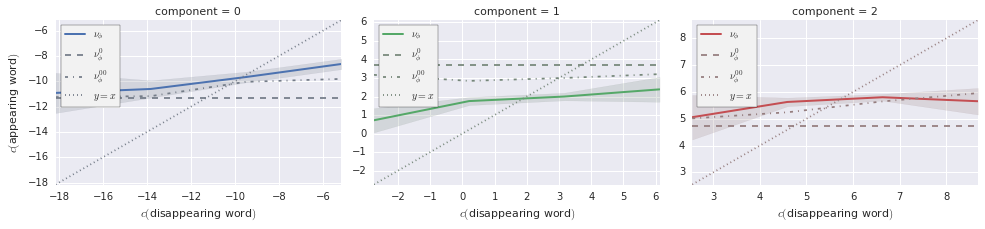

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.68094259  0.18299271]



aoa  frequency  letters_count
Component-0 -0.735431   0.366691      -0.569806
Component-1  0.428437  -0.399848      -0.810286

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 26988) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   16 of 26988) |                     | Elapsed Time: 0:00:03 ETA: 1:26:10

  0% (   47 of 26988) |                     | Elapsed Time: 0:00:03 ETA: 0:31:19

  0% (   77 of 26988) |                     | Elapsed Time: 0:00:03 ETA: 0:20:19

  0% (  107 of 26988) |                     | Elapsed Time: 0:00:03 ETA: 0:15:30

  0% (  136 of 26988) |                     | Elapsed Time: 0:00:03 ETA: 0:03:08

  0% (  163 of 26988) |                     | Elapsed Time: 0:00:04 ETA: 0:03:14

  0% (  193 of 26988) |                     | Elapsed Time: 0:00:04 ETA: 0:03:13

  0% (  224 of 26988) |                     | Elapsed Time: 0:00:04 ETA: 0:03:10

  0% (  259 of 26988) |                     | Elapsed Time: 0:00:04 ETA: 0:03:02

  1% (  293 of 26988) |                     | Elapsed Time: 0:00:04 ETA: 0:02:54

  1% (  338 of 26988) |                     | Elapsed Time: 0:00:05 ETA: 0:02:47

  1% (  375 of 26988) |                     | Elapsed Time: 0:00:05 ETA: 0:02:40

  1% (  408 of 26988) |                     | Elapsed Time: 0:00:05 ETA: 0:02:40

  1% (  444 of 26988) |                     | Elapsed Time: 0:00:05 ETA: 0:02:38

  1% (  480 of 26988) |                     | Elapsed Time: 0:00:06 ETA: 0:02:34

  1% (  515 of 26988) |                     | Elapsed Time: 0:00:06 ETA: 0:02:35

  2% (  550 of 26988) |                     | Elapsed Time: 0:00:06 ETA: 0:02:34

  2% (  582 of 26988) |                     | Elapsed Time: 0:00:06 ETA: 0:02:35

  2% (  609 of 26988) |                     | Elapsed Time: 0:00:06 ETA: 0:02:46

  2% (  630 of 26988) |                     | Elapsed Time: 0:00:07 ETA: 0:03:08

  2% (  654 of 26988) |                     | Elapsed Time: 0:00:07 ETA: 0:03:20

  2% (  695 of 26988) |                     | Elapsed Time: 0:00:07 ETA: 0:03:13

  2% (  732 of 26988) |                     | Elapsed Time: 0:00:07 ETA: 0:03:05

  2% (  764 of 26988) |                     | Elapsed Time: 0:00:07 ETA: 0:02:50

  2% (  796 of 26988) |                     | Elapsed Time: 0:00:08 ETA: 0:02:36

  3% (  831 of 26988) |                     | Elapsed Time: 0:00:08 ETA: 0:02:34

  3% (  865 of 26988) |                     | Elapsed Time: 0:00:08 ETA: 0:02:40

  3% (  898 of 26988) |                     | Elapsed Time: 0:00:08 ETA: 0:02:40

  3% (  931 of 26988) |                     | Elapsed Time: 0:00:08 ETA: 0:02:39

  3% (  965 of 26988) |                     | Elapsed Time: 0:00:09 ETA: 0:02:38

  3% (  999 of 26988) |                     | Elapsed Time: 0:00:09 ETA: 0:02:39

  3% ( 1028 of 26988) |                     | Elapsed Time: 0:00:09 ETA: 0:02:44

  3% ( 1062 of 26988) |                     | Elapsed Time: 0:00:09 ETA: 0:02:42

  4% ( 1098 of 26988) |                     | Elapsed Time: 0:00:09 ETA: 0:02:39

  4% ( 1133 of 26988) |                     | Elapsed Time: 0:00:10 ETA: 0:02:38

  4% ( 1168 of 26988) |                     | Elapsed Time: 0:00:10 ETA: 0:02:36

  4% ( 1202 of 26988) |                     | Elapsed Time: 0:00:10 ETA: 0:02:33

  4% ( 1236 of 26988) |                     | Elapsed Time: 0:00:10 ETA: 0:02:34

  4% ( 1270 of 26988) |                     | Elapsed Time: 0:00:11 ETA: 0:02:35

  4% ( 1304 of 26988) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:34

  5% ( 1350 of 26988) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:34

  5% ( 1383 of 26988) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:35

  5% ( 1415 of 26988) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:37

  5% ( 1451 of 26988) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:36

  5% ( 1485 of 26988) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:35

  5% ( 1519 of 26988) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:34

  5% ( 1554 of 26988) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:31

  5% ( 1590 of 26988) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:29

  6% ( 1625 of 26988) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:29

  6% ( 1660 of 26988) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:28

  6% ( 1704 of 26988) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:28

  6% ( 1738 of 26988) |#                    | Elapsed Time: 0:00:13 ETA: 0:02:29

  6% ( 1788 of 26988) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:30

  6% ( 1822 of 26988) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:31

  6% ( 1857 of 26988) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:30

  7% ( 1890 of 26988) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:31

  7% ( 1938 of 26988) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:33

  7% ( 1972 of 26988) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:34

  7% ( 2006 of 26988) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:36

  7% ( 2042 of 26988) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:35

  7% ( 2076 of 26988) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:35

  7% ( 2109 of 26988) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:34

  7% ( 2142 of 26988) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:34

  8% ( 2176 of 26988) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:35

  8% ( 2209 of 26988) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:35

  8% ( 2243 of 26988) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:34

  8% ( 2277 of 26988) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:33

  8% ( 2311 of 26988) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:31

  8% ( 2345 of 26988) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:30

  8% ( 2379 of 26988) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:30

  8% ( 2399 of 26988) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:44

  9% ( 2430 of 26988) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:47

  9% ( 2464 of 26988) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:47

  9% ( 2497 of 26988) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:47

  9% ( 2530 of 26988) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:40

  9% ( 2564 of 26988) |#                    | Elapsed Time: 0:00:19 ETA: 0:02:31

  9% ( 2597 of 26988) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:31

  9% ( 2631 of 26988) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:31

  9% ( 2657 of 26988) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:38

 10% ( 2699 of 26988) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:35

 10% ( 2735 of 26988) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:32

 10% ( 2770 of 26988) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:29

 10% ( 2799 of 26988) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:28

 10% ( 2825 of 26988) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:37

 10% ( 2851 of 26988) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:49

 10% ( 2877 of 26988) |##                   | Elapsed Time: 0:00:21 ETA: 0:03:03

 10% ( 2903 of 26988) |##                   | Elapsed Time: 0:00:21 ETA: 0:03:14

 10% ( 2929 of 26988) |##                   | Elapsed Time: 0:00:21 ETA: 0:03:14

 10% ( 2955 of 26988) |##                   | Elapsed Time: 0:00:21 ETA: 0:03:13

 11% ( 2981 of 26988) |##                   | Elapsed Time: 0:00:21 ETA: 0:03:14

 11% ( 3007 of 26988) |##                   | Elapsed Time: 0:00:22 ETA: 0:03:14

 11% ( 3037 of 26988) |##                   | Elapsed Time: 0:00:22 ETA: 0:03:14

 11% ( 3063 of 26988) |##                   | Elapsed Time: 0:00:22 ETA: 0:03:13

 11% ( 3092 of 26988) |##                   | Elapsed Time: 0:00:22 ETA: 0:03:08

 11% ( 3128 of 26988) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:52

 11% ( 3163 of 26988) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:40

 11% ( 3196 of 26988) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:31

 11% ( 3227 of 26988) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:26

 12% ( 3260 of 26988) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:27

 12% ( 3292 of 26988) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:31

 12% ( 3325 of 26988) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:31

 12% ( 3358 of 26988) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:29

 12% ( 3390 of 26988) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:29

 12% ( 3423 of 26988) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:28

 12% ( 3456 of 26988) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:28

 12% ( 3484 of 26988) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:31

 13% ( 3512 of 26988) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:35

 13% ( 3544 of 26988) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:36

 13% ( 3578 of 26988) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:36

 13% ( 3614 of 26988) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:28

 13% ( 3652 of 26988) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:20

 13% ( 3689 of 26988) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:13

 13% ( 3729 of 26988) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:10

 13% ( 3767 of 26988) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:08

 14% ( 3807 of 26988) |##                   | Elapsed Time: 0:00:27 ETA: 0:02:05

 14% ( 3842 of 26988) |##                   | Elapsed Time: 0:00:27 ETA: 0:02:07

 14% ( 3878 of 26988) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:08

 14% ( 3914 of 26988) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:09

 14% ( 3951 of 26988) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:10

 14% ( 3987 of 26988) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:11

 14% ( 4021 of 26988) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:10

 15% ( 4060 of 26988) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:20

 15% ( 4091 of 26988) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:23

 15% ( 4127 of 26988) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:24

 15% ( 4163 of 26988) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:22

 15% ( 4200 of 26988) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:20

 15% ( 4236 of 26988) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:09

 15% ( 4271 of 26988) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:09

 15% ( 4308 of 26988) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:08

 16% ( 4346 of 26988) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:07

 16% ( 4386 of 26988) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:06

 16% ( 4422 of 26988) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:05

 16% ( 4461 of 26988) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:03

 16% ( 4499 of 26988) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:02

 16% ( 4538 of 26988) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:02

 16% ( 4577 of 26988) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:00

 17% ( 4615 of 26988) |###                  | Elapsed Time: 0:00:31 ETA: 0:01:58

 17% ( 4654 of 26988) |###                  | Elapsed Time: 0:00:31 ETA: 0:01:58

 17% ( 4695 of 26988) |###                  | Elapsed Time: 0:00:32 ETA: 0:01:56

 17% ( 4742 of 26988) |###                  | Elapsed Time: 0:00:32 ETA: 0:01:56

 17% ( 4776 of 26988) |###                  | Elapsed Time: 0:00:32 ETA: 0:01:58

 17% ( 4809 of 26988) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:02

 17% ( 4838 of 26988) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:10

 18% ( 4867 of 26988) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:20

 18% ( 4897 of 26988) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:28

 18% ( 4927 of 26988) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:34

 18% ( 4957 of 26988) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:36

 18% ( 4985 of 26988) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:37

 18% ( 5015 of 26988) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:36

 18% ( 5061 of 26988) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:34

 18% ( 5091 of 26988) |###                  | Elapsed Time: 0:00:34 ETA: 0:02:30

 18% ( 5125 of 26988) |###                  | Elapsed Time: 0:00:35 ETA: 0:02:25

 19% ( 5163 of 26988) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:16

 19% ( 5201 of 26988) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:08

 19% ( 5237 of 26988) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:07

 19% ( 5273 of 26988) |####                 | Elapsed Time: 0:00:35 ETA: 0:01:59

 19% ( 5307 of 26988) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:02

 19% ( 5336 of 26988) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:10

 19% ( 5364 of 26988) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:19

 20% ( 5398 of 26988) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:21

 20% ( 5428 of 26988) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:28

 20% ( 5461 of 26988) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:26

 20% ( 5487 of 26988) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:29

 20% ( 5522 of 26988) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:25

 20% ( 5557 of 26988) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:15

 20% ( 5594 of 26988) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:13

 20% ( 5630 of 26988) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:07

 20% ( 5664 of 26988) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:03

 21% ( 5699 of 26988) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:04

 21% ( 5735 of 26988) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:03

 21% ( 5764 of 26988) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:08

 21% ( 5792 of 26988) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:14

 21% ( 5828 of 26988) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:14

 21% ( 5862 of 26988) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:15

 21% ( 5898 of 26988) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:12

 21% ( 5932 of 26988) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:07

 22% ( 5966 of 26988) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:05

 22% ( 5999 of 26988) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:06

 22% ( 6033 of 26988) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:07

 22% ( 6073 of 26988) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:06

 22% ( 6109 of 26988) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:04

 22% ( 6145 of 26988) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:02

 22% ( 6181 of 26988) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:00

 23% ( 6214 of 26988) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:02

 23% ( 6239 of 26988) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:11

 23% ( 6265 of 26988) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:21

 23% ( 6289 of 26988) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:33

 23% ( 6325 of 26988) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:32

 23% ( 6361 of 26988) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:22

 23% ( 6396 of 26988) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:12

 23% ( 6425 of 26988) |####                 | Elapsed Time: 0:00:43 ETA: 0:02:11

 23% ( 6454 of 26988) |#####                | Elapsed Time: 0:00:43 ETA: 0:02:08

 24% ( 6483 of 26988) |#####                | Elapsed Time: 0:00:43 ETA: 0:02:13

 24% ( 6519 of 26988) |#####                | Elapsed Time: 0:00:43 ETA: 0:02:14

 24% ( 6555 of 26988) |#####                | Elapsed Time: 0:00:43 ETA: 0:02:13

 24% ( 6591 of 26988) |#####                | Elapsed Time: 0:00:44 ETA: 0:02:05

 24% ( 6625 of 26988) |#####                | Elapsed Time: 0:00:44 ETA: 0:02:00

 24% ( 6655 of 26988) |#####                | Elapsed Time: 0:00:44 ETA: 0:02:03

 24% ( 6685 of 26988) |#####                | Elapsed Time: 0:00:44 ETA: 0:02:07

 24% ( 6718 of 26988) |#####                | Elapsed Time: 0:00:44 ETA: 0:02:10

 25% ( 6765 of 26988) |#####                | Elapsed Time: 0:00:45 ETA: 0:02:07

 25% ( 6798 of 26988) |#####                | Elapsed Time: 0:00:45 ETA: 0:02:06

 25% ( 6832 of 26988) |#####                | Elapsed Time: 0:00:45 ETA: 0:02:04

 25% ( 6865 of 26988) |#####                | Elapsed Time: 0:00:45 ETA: 0:02:01

 25% ( 6898 of 26988) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:03

 25% ( 6931 of 26988) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:04

 25% ( 6964 of 26988) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:04

 25% ( 6996 of 26988) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:05

 26% ( 7033 of 26988) |#####                | Elapsed Time: 0:00:46 ETA: 0:02:01

 26% ( 7085 of 26988) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:58

 26% ( 7121 of 26988) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:56

 26% ( 7157 of 26988) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:53

 26% ( 7193 of 26988) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:53

 26% ( 7230 of 26988) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:52

 26% ( 7260 of 26988) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:57

 27% ( 7295 of 26988) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:58

 27% ( 7331 of 26988) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:56

 27% ( 7367 of 26988) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:57

 27% ( 7402 of 26988) |#####                | Elapsed Time: 0:00:49 ETA: 0:01:55

 27% ( 7434 of 26988) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:06

 27% ( 7463 of 26988) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:13

 27% ( 7499 of 26988) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:13

 27% ( 7536 of 26988) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:12

 28% ( 7573 of 26988) |#####                | Elapsed Time: 0:00:50 ETA: 0:02:04

 28% ( 7612 of 26988) |#####                | Elapsed Time: 0:00:50 ETA: 0:01:49

 28% ( 7649 of 26988) |#####                | Elapsed Time: 0:00:50 ETA: 0:01:45

 28% ( 7678 of 26988) |#####                | Elapsed Time: 0:00:50 ETA: 0:01:51

 28% ( 7710 of 26988) |#####                | Elapsed Time: 0:00:51 ETA: 0:01:55

 28% ( 7743 of 26988) |######               | Elapsed Time: 0:00:51 ETA: 0:01:57

 28% ( 7775 of 26988) |######               | Elapsed Time: 0:00:51 ETA: 0:02:06

 28% ( 7805 of 26988) |######               | Elapsed Time: 0:00:51 ETA: 0:02:08

 29% ( 7835 of 26988) |######               | Elapsed Time: 0:00:51 ETA: 0:02:09

 29% ( 7869 of 26988) |######               | Elapsed Time: 0:00:52 ETA: 0:02:06

 29% ( 7903 of 26988) |######               | Elapsed Time: 0:00:52 ETA: 0:02:04

 29% ( 7938 of 26988) |######               | Elapsed Time: 0:00:52 ETA: 0:01:59

 29% ( 7976 of 26988) |######               | Elapsed Time: 0:00:52 ETA: 0:01:52

 29% ( 8013 of 26988) |######               | Elapsed Time: 0:00:52 ETA: 0:01:48

 29% ( 8045 of 26988) |######               | Elapsed Time: 0:00:53 ETA: 0:01:50

 30% ( 8097 of 26988) |######               | Elapsed Time: 0:00:53 ETA: 0:01:47

 30% ( 8136 of 26988) |######               | Elapsed Time: 0:00:53 ETA: 0:01:46

 30% ( 8170 of 26988) |######               | Elapsed Time: 0:00:53 ETA: 0:01:49

 30% ( 8200 of 26988) |######               | Elapsed Time: 0:00:54 ETA: 0:01:51

 30% ( 8236 of 26988) |######               | Elapsed Time: 0:00:54 ETA: 0:01:49

 30% ( 8264 of 26988) |######               | Elapsed Time: 0:00:54 ETA: 0:01:59

 30% ( 8289 of 26988) |######               | Elapsed Time: 0:00:54 ETA: 0:02:09

 30% ( 8315 of 26988) |######               | Elapsed Time: 0:00:54 ETA: 0:02:13

 30% ( 8341 of 26988) |######               | Elapsed Time: 0:00:55 ETA: 0:02:23

 31% ( 8367 of 26988) |######               | Elapsed Time: 0:00:55 ETA: 0:02:32

 31% ( 8392 of 26988) |######               | Elapsed Time: 0:00:55 ETA: 0:02:31

 31% ( 8418 of 26988) |######               | Elapsed Time: 0:00:55 ETA: 0:02:30

 31% ( 8447 of 26988) |######               | Elapsed Time: 0:00:55 ETA: 0:02:29

 31% ( 8472 of 26988) |######               | Elapsed Time: 0:00:56 ETA: 0:02:29

 31% ( 8500 of 26988) |######               | Elapsed Time: 0:00:56 ETA: 0:02:28

 31% ( 8526 of 26988) |######               | Elapsed Time: 0:00:56 ETA: 0:02:27

 31% ( 8552 of 26988) |######               | Elapsed Time: 0:00:56 ETA: 0:02:26

 31% ( 8579 of 26988) |######               | Elapsed Time: 0:00:56 ETA: 0:02:24

 31% ( 8617 of 26988) |######               | Elapsed Time: 0:00:57 ETA: 0:02:11

 32% ( 8657 of 26988) |######               | Elapsed Time: 0:00:57 ETA: 0:01:58

 32% ( 8691 of 26988) |######               | Elapsed Time: 0:00:57 ETA: 0:01:52

 32% ( 8724 of 26988) |######               | Elapsed Time: 0:00:57 ETA: 0:01:47

 32% ( 8772 of 26988) |######               | Elapsed Time: 0:00:58 ETA: 0:01:45

 32% ( 8804 of 26988) |######               | Elapsed Time: 0:00:58 ETA: 0:01:51

 32% ( 8836 of 26988) |######               | Elapsed Time: 0:00:58 ETA: 0:01:54

 32% ( 8868 of 26988) |######               | Elapsed Time: 0:00:58 ETA: 0:01:54

 32% ( 8900 of 26988) |######               | Elapsed Time: 0:00:58 ETA: 0:01:54

 33% ( 8932 of 26988) |######               | Elapsed Time: 0:00:59 ETA: 0:01:55

 33% ( 8964 of 26988) |######               | Elapsed Time: 0:00:59 ETA: 0:01:55

 33% ( 8996 of 26988) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:54

 33% ( 9028 of 26988) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:55

 33% ( 9066 of 26988) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:50

 33% ( 9109 of 26988) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:47

 33% ( 9142 of 26988) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:46

 33% ( 9174 of 26988) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:46

 34% ( 9206 of 26988) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:49

 34% ( 9237 of 26988) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:53

 34% ( 9269 of 26988) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:56

 34% ( 9301 of 26988) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:55

 34% ( 9333 of 26988) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:54

 34% ( 9365 of 26988) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:52

 34% ( 9396 of 26988) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:53

 34% ( 9428 of 26988) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:53

 35% ( 9462 of 26988) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:54

 35% ( 9496 of 26988) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:51

 35% ( 9534 of 26988) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:47

 35% ( 9571 of 26988) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:43

 35% ( 9607 of 26988) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:40

 35% ( 9632 of 26988) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:45

 35% ( 9658 of 26988) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:52

 35% ( 9709 of 26988) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:55

 36% ( 9733 of 26988) |#######              | Elapsed Time: 0:01:04 ETA: 0:02:06

 36% ( 9757 of 26988) |#######              | Elapsed Time: 0:01:04 ETA: 0:02:07

 36% ( 9784 of 26988) |#######              | Elapsed Time: 0:01:04 ETA: 0:02:10

 36% ( 9808 of 26988) |#######              | Elapsed Time: 0:01:04 ETA: 0:02:28

 36% ( 9842 of 26988) |#######              | Elapsed Time: 0:01:05 ETA: 0:02:16

 36% ( 9882 of 26988) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:59

 36% ( 9920 of 26988) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:48

 36% ( 9955 of 26988) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:39

 37% ( 9989 of 26988) |#######              | Elapsed Time: 0:01:05 ETA: 0:01:33

 37% (10027 of 26988) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:34

 37% (10062 of 26988) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:36

 37% (10089 of 26988) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:43

 37% (10121 of 26988) |#######              | Elapsed Time: 0:01:06 ETA: 0:01:51

 37% (10144 of 26988) |#######              | Elapsed Time: 0:01:06 ETA: 0:02:03

 37% (10168 of 26988) |#######              | Elapsed Time: 0:01:07 ETA: 0:02:16

 37% (10192 of 26988) |#######              | Elapsed Time: 0:01:07 ETA: 0:02:25

 37% (10216 of 26988) |#######              | Elapsed Time: 0:01:07 ETA: 0:02:26

 37% (10240 of 26988) |#######              | Elapsed Time: 0:01:07 ETA: 0:02:25

 38% (10292 of 26988) |########             | Elapsed Time: 0:01:08 ETA: 0:02:06

 38% (10330 of 26988) |########             | Elapsed Time: 0:01:08 ETA: 0:01:52

 38% (10364 of 26988) |########             | Elapsed Time: 0:01:08 ETA: 0:01:44

 38% (10398 of 26988) |########             | Elapsed Time: 0:01:08 ETA: 0:01:36

 38% (10430 of 26988) |########             | Elapsed Time: 0:01:08 ETA: 0:01:37

 38% (10474 of 26988) |########             | Elapsed Time: 0:01:09 ETA: 0:01:41

 38% (10508 of 26988) |########             | Elapsed Time: 0:01:09 ETA: 0:01:43

 39% (10542 of 26988) |########             | Elapsed Time: 0:01:09 ETA: 0:01:43

 39% (10576 of 26988) |########             | Elapsed Time: 0:01:09 ETA: 0:01:42

 39% (10612 of 26988) |########             | Elapsed Time: 0:01:10 ETA: 0:01:39

 39% (10649 of 26988) |########             | Elapsed Time: 0:01:10 ETA: 0:01:36

 39% (10684 of 26988) |########             | Elapsed Time: 0:01:10 ETA: 0:01:35

 39% (10718 of 26988) |########             | Elapsed Time: 0:01:10 ETA: 0:01:35

 39% (10752 of 26988) |########             | Elapsed Time: 0:01:10 ETA: 0:01:34

 40% (10796 of 26988) |########             | Elapsed Time: 0:01:11 ETA: 0:01:34

 40% (10832 of 26988) |########             | Elapsed Time: 0:01:11 ETA: 0:01:36

 40% (10870 of 26988) |########             | Elapsed Time: 0:01:11 ETA: 0:01:32

 40% (10906 of 26988) |########             | Elapsed Time: 0:01:11 ETA: 0:01:32

 40% (10938 of 26988) |########             | Elapsed Time: 0:01:11 ETA: 0:01:33

 40% (10971 of 26988) |########             | Elapsed Time: 0:01:12 ETA: 0:01:34

 40% (11008 of 26988) |########             | Elapsed Time: 0:01:12 ETA: 0:01:34

 40% (11038 of 26988) |########             | Elapsed Time: 0:01:12 ETA: 0:01:39

 41% (11072 of 26988) |########             | Elapsed Time: 0:01:12 ETA: 0:01:37

 41% (11112 of 26988) |########             | Elapsed Time: 0:01:13 ETA: 0:01:32

 41% (11150 of 26988) |########             | Elapsed Time: 0:01:13 ETA: 0:01:33

 41% (11184 of 26988) |########             | Elapsed Time: 0:01:13 ETA: 0:01:31

 41% (11220 of 26988) |########             | Elapsed Time: 0:01:13 ETA: 0:01:28

 41% (11258 of 26988) |########             | Elapsed Time: 0:01:13 ETA: 0:01:28

 41% (11294 of 26988) |########             | Elapsed Time: 0:01:14 ETA: 0:01:29

 41% (11332 of 26988) |########             | Elapsed Time: 0:01:14 ETA: 0:01:27

 42% (11368 of 26988) |########             | Elapsed Time: 0:01:14 ETA: 0:01:27

 42% (11400 of 26988) |########             | Elapsed Time: 0:01:14 ETA: 0:01:29

 42% (11437 of 26988) |########             | Elapsed Time: 0:01:14 ETA: 0:01:30

 42% (11484 of 26988) |########             | Elapsed Time: 0:01:15 ETA: 0:01:32

 42% (11516 of 26988) |########             | Elapsed Time: 0:01:15 ETA: 0:01:36

 42% (11548 of 26988) |########             | Elapsed Time: 0:01:15 ETA: 0:01:35

 42% (11580 of 26988) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:37

 43% (11613 of 26988) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:38

 43% (11650 of 26988) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:34

 43% (11676 of 26988) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:38

 43% (11710 of 26988) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:37

 43% (11748 of 26988) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:33

 43% (11779 of 26988) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:35

 43% (11827 of 26988) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:31

 43% (11864 of 26988) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:25

 44% (11904 of 26988) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:24

 44% (11942 of 26988) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:24

 44% (11975 of 26988) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:22

 44% (12009 of 26988) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:25

 44% (12043 of 26988) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:28

 44% (12077 of 26988) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:31

 44% (12110 of 26988) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:31

 45% (12145 of 26988) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:33

 45% (12171 of 26988) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:40

 45% (12204 of 26988) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:40

 45% (12238 of 26988) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:40

 45% (12272 of 26988) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:39

 45% (12303 of 26988) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:34

 45% (12335 of 26988) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:32

 45% (12373 of 26988) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:29

 45% (12411 of 26988) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:26

 46% (12449 of 26988) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:23

 46% (12500 of 26988) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:21

 46% (12539 of 26988) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:18

 46% (12578 of 26988) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:17

 46% (12616 of 26988) |#########            | Elapsed Time: 0:01:21 ETA: 0:01:17

 46% (12654 of 26988) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:17

 47% (12685 of 26988) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:19

 47% (12719 of 26988) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:22

 47% (12756 of 26988) |#########            | Elapsed Time: 0:01:22 ETA: 0:01:23

 47% (12796 of 26988) |#########            | Elapsed Time: 0:01:23 ETA: 0:01:22

 47% (12839 of 26988) |#########            | Elapsed Time: 0:01:23 ETA: 0:01:23

 47% (12877 of 26988) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:17

 47% (12916 of 26988) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:15

 47% (12953 of 26988) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:16

 48% (12984 of 26988) |##########           | Elapsed Time: 0:01:24 ETA: 0:01:18

 48% (13027 of 26988) |##########           | Elapsed Time: 0:01:24 ETA: 0:01:25

 48% (13055 of 26988) |##########           | Elapsed Time: 0:01:24 ETA: 0:01:32

 48% (13091 of 26988) |##########           | Elapsed Time: 0:01:24 ETA: 0:01:33

 48% (13126 of 26988) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:30

 48% (13175 of 26988) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:25

 48% (13211 of 26988) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:20

 49% (13246 of 26988) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:18

 49% (13283 of 26988) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:17

 49% (13320 of 26988) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:16

 49% (13358 of 26988) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:15

 49% (13391 of 26988) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:16

 49% (13426 of 26988) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:17

 49% (13461 of 26988) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:17

 50% (13495 of 26988) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:20

 50% (13526 of 26988) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:21

 50% (13564 of 26988) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:19

 50% (13603 of 26988) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:17

 50% (13637 of 26988) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:18

 50% (13672 of 26988) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:16

 50% (13718 of 26988) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:19

 50% (13746 of 26988) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:25

 51% (13782 of 26988) |##########           | Elapsed Time: 0:01:28 ETA: 0:01:24

 51% (13832 of 26988) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:23

 51% (13864 of 26988) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:24

 51% (13893 of 26988) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:23

 51% (13930 of 26988) |##########           | Elapsed Time: 0:01:29 ETA: 0:01:21

 51% (13960 of 26988) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:23

 51% (13993 of 26988) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:24

 51% (14029 of 26988) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:20

 52% (14062 of 26988) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:18

 52% (14093 of 26988) |##########           | Elapsed Time: 0:01:30 ETA: 0:01:20

 52% (14123 of 26988) |##########           | Elapsed Time: 0:01:31 ETA: 0:01:19

 52% (14169 of 26988) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:19

 52% (14205 of 26988) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:18

 52% (14238 of 26988) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:17

 52% (14274 of 26988) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:14

 53% (14309 of 26988) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:14

 53% (14348 of 26988) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:12

 53% (14386 of 26988) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:10

 53% (14424 of 26988) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:09

 53% (14457 of 26988) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:09

 53% (14491 of 26988) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:11

 53% (14524 of 26988) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:15

 53% (14562 of 26988) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:14

 54% (14598 of 26988) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:14

 54% (14630 of 26988) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:14

 54% (14667 of 26988) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:11

 54% (14707 of 26988) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:09

 54% (14745 of 26988) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:08

 54% (14783 of 26988) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:08

 54% (14818 of 26988) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:07

 55% (14861 of 26988) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:09

 55% (14898 of 26988) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:10

 55% (14931 of 26988) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:11

 55% (14967 of 26988) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:11

 55% (15005 of 26988) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:08

 55% (15037 of 26988) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:10

 55% (15075 of 26988) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:08

 55% (15111 of 26988) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:07

 56% (15145 of 26988) |###########          | Elapsed Time: 0:01:36 ETA: 0:01:09

 56% (15181 of 26988) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:10

 56% (15213 of 26988) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:10

 56% (15247 of 26988) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:12

 56% (15285 of 26988) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:10

 56% (15321 of 26988) |###########          | Elapsed Time: 0:01:37 ETA: 0:01:09

 56% (15356 of 26988) |###########          | Elapsed Time: 0:01:38 ETA: 0:01:08

 57% (15394 of 26988) |###########          | Elapsed Time: 0:01:38 ETA: 0:01:05

 57% (15431 of 26988) |############         | Elapsed Time: 0:01:38 ETA: 0:01:04

 57% (15468 of 26988) |############         | Elapsed Time: 0:01:38 ETA: 0:01:04

 57% (15504 of 26988) |############         | Elapsed Time: 0:01:39 ETA: 0:01:03

 57% (15538 of 26988) |############         | Elapsed Time: 0:01:39 ETA: 0:01:04

 57% (15574 of 26988) |############         | Elapsed Time: 0:01:39 ETA: 0:01:05

 57% (15614 of 26988) |############         | Elapsed Time: 0:01:39 ETA: 0:01:03

 58% (15654 of 26988) |############         | Elapsed Time: 0:01:39 ETA: 0:01:02

 58% (15690 of 26988) |############         | Elapsed Time: 0:01:40 ETA: 0:01:01

 58% (15720 of 26988) |############         | Elapsed Time: 0:01:40 ETA: 0:01:03

 58% (15760 of 26988) |############         | Elapsed Time: 0:01:40 ETA: 0:01:03

 58% (15796 of 26988) |############         | Elapsed Time: 0:01:40 ETA: 0:01:04

 58% (15835 of 26988) |############         | Elapsed Time: 0:01:40 ETA: 0:01:04

 58% (15871 of 26988) |############         | Elapsed Time: 0:01:41 ETA: 0:01:05

 58% (15907 of 26988) |############         | Elapsed Time: 0:01:41 ETA: 0:01:04

 59% (15939 of 26988) |############         | Elapsed Time: 0:01:41 ETA: 0:01:06

 59% (15972 of 26988) |############         | Elapsed Time: 0:01:41 ETA: 0:01:08

 59% (16002 of 26988) |############         | Elapsed Time: 0:01:41 ETA: 0:01:09

 59% (16036 of 26988) |############         | Elapsed Time: 0:01:42 ETA: 0:01:09

 59% (16061 of 26988) |############         | Elapsed Time: 0:01:42 ETA: 0:01:13

 59% (16099 of 26988) |############         | Elapsed Time: 0:01:42 ETA: 0:01:10

 59% (16135 of 26988) |############         | Elapsed Time: 0:01:42 ETA: 0:01:09

 59% (16171 of 26988) |############         | Elapsed Time: 0:01:42 ETA: 0:01:06

 60% (16211 of 26988) |############         | Elapsed Time: 0:01:43 ETA: 0:01:03

 60% (16247 of 26988) |############         | Elapsed Time: 0:01:43 ETA: 0:01:01

 60% (16285 of 26988) |############         | Elapsed Time: 0:01:43 ETA: 0:01:01

 60% (16313 of 26988) |############         | Elapsed Time: 0:01:43 ETA: 0:01:04

 60% (16344 of 26988) |############         | Elapsed Time: 0:01:44 ETA: 0:01:05

 60% (16377 of 26988) |############         | Elapsed Time: 0:01:44 ETA: 0:01:06

 60% (16414 of 26988) |############         | Elapsed Time: 0:01:44 ETA: 0:01:06

 60% (16451 of 26988) |############         | Elapsed Time: 0:01:44 ETA: 0:01:06

 61% (16488 of 26988) |############         | Elapsed Time: 0:01:44 ETA: 0:00:59

 61% (16531 of 26988) |############         | Elapsed Time: 0:01:45 ETA: 0:00:57

 61% (16561 of 26988) |############         | Elapsed Time: 0:01:45 ETA: 0:01:00

 61% (16591 of 26988) |############         | Elapsed Time: 0:01:45 ETA: 0:01:03

 61% (16620 of 26988) |############         | Elapsed Time: 0:01:45 ETA: 0:01:05

 61% (16657 of 26988) |############         | Elapsed Time: 0:01:45 ETA: 0:01:06

 61% (16687 of 26988) |############         | Elapsed Time: 0:01:46 ETA: 0:01:07

 61% (16710 of 26988) |#############        | Elapsed Time: 0:01:46 ETA: 0:01:11

 62% (16737 of 26988) |#############        | Elapsed Time: 0:01:46 ETA: 0:01:11

 62% (16763 of 26988) |#############        | Elapsed Time: 0:01:46 ETA: 0:01:17

 62% (16789 of 26988) |#############        | Elapsed Time: 0:01:46 ETA: 0:01:23

 62% (16824 of 26988) |#############        | Elapsed Time: 0:01:47 ETA: 0:01:15

 62% (16868 of 26988) |#############        | Elapsed Time: 0:01:47 ETA: 0:01:08

 62% (16902 of 26988) |#############        | Elapsed Time: 0:01:47 ETA: 0:01:04

 62% (16938 of 26988) |#############        | Elapsed Time: 0:01:47 ETA: 0:01:00

 62% (16975 of 26988) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:57

 63% (17010 of 26988) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:57

 63% (17049 of 26988) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:56

 63% (17086 of 26988) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:55

 63% (17116 of 26988) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:57

 63% (17156 of 26988) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:55

 63% (17187 of 26988) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:57

 63% (17218 of 26988) |#############        | Elapsed Time: 0:01:49 ETA: 0:01:01

 63% (17257 of 26988) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:59

 64% (17293 of 26988) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:58

 64% (17329 of 26988) |#############        | Elapsed Time: 0:01:50 ETA: 0:00:57

 64% (17366 of 26988) |#############        | Elapsed Time: 0:01:50 ETA: 0:00:55

 64% (17398 of 26988) |#############        | Elapsed Time: 0:01:50 ETA: 0:00:55

 64% (17436 of 26988) |#############        | Elapsed Time: 0:01:50 ETA: 0:00:55

 64% (17475 of 26988) |#############        | Elapsed Time: 0:01:50 ETA: 0:00:53

 64% (17512 of 26988) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:53

 65% (17543 of 26988) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:55

 65% (17572 of 26988) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:56

 65% (17609 of 26988) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:57

 65% (17642 of 26988) |#############        | Elapsed Time: 0:01:51 ETA: 0:00:59

 65% (17677 of 26988) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:57

 65% (17707 of 26988) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:57

 65% (17737 of 26988) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:58

 65% (17774 of 26988) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:57

 65% (17812 of 26988) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:56

 66% (17839 of 26988) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:57

 66% (17880 of 26988) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:54

 66% (17914 of 26988) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:54

 66% (17952 of 26988) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:53

 66% (17990 of 26988) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:51

 66% (18027 of 26988) |##############       | Elapsed Time: 0:01:54 ETA: 0:00:50

 66% (18064 of 26988) |##############       | Elapsed Time: 0:01:54 ETA: 0:00:49

 67% (18097 of 26988) |##############       | Elapsed Time: 0:01:54 ETA: 0:00:50

 67% (18130 of 26988) |##############       | Elapsed Time: 0:01:54 ETA: 0:00:51

 67% (18167 of 26988) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:51

 67% (18217 of 26988) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:51

 67% (18250 of 26988) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:52

 67% (18287 of 26988) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:50

 67% (18311 of 26988) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:54

 67% (18329 of 26988) |##############       | Elapsed Time: 0:01:56 ETA: 0:01:00

 68% (18352 of 26988) |##############       | Elapsed Time: 0:01:56 ETA: 0:01:07

 68% (18389 of 26988) |##############       | Elapsed Time: 0:01:56 ETA: 0:01:06

 68% (18424 of 26988) |##############       | Elapsed Time: 0:01:56 ETA: 0:01:05

 68% (18458 of 26988) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:57

 68% (18489 of 26988) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:52

 68% (18521 of 26988) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:52

 68% (18573 of 26988) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:50

 68% (18609 of 26988) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:50

 69% (18638 of 26988) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:52

 69% (18664 of 26988) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:52

 69% (18694 of 26988) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:54

 69% (18725 of 26988) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:56

 69% (18751 of 26988) |##############       | Elapsed Time: 0:01:58 ETA: 0:01:00

 69% (18778 of 26988) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:58

 69% (18813 of 26988) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:56

 69% (18851 of 26988) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:53

 70% (18892 of 26988) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:50

 70% (18929 of 26988) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:45

 70% (18964 of 26988) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:44

 70% (18996 of 26988) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:45

 70% (19026 of 26988) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:47

 70% (19060 of 26988) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:49

 70% (19090 of 26988) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:51

 70% (19121 of 26988) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:52

 70% (19157 of 26988) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:49

 71% (19190 of 26988) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:48

 71% (19218 of 26988) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:50

 71% (19239 of 26988) |##############       | Elapsed Time: 0:02:02 ETA: 0:00:53

 71% (19262 of 26988) |##############       | Elapsed Time: 0:02:02 ETA: 0:00:55

 71% (19294 of 26988) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:57

 71% (19327 of 26988) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:57

 71% (19364 of 26988) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:53

 71% (19402 of 26988) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:46

 72% (19436 of 26988) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:44

 72% (19466 of 26988) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:44

 72% (19502 of 26988) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:44

 72% (19518 of 26988) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:45

 72% (19550 of 26988) |###############      | Elapsed Time: 0:02:08 ETA: 0:04:17

 72% (19582 of 26988) |###############      | Elapsed Time: 0:02:08 ETA: 0:04:21

 72% (19616 of 26988) |###############      | Elapsed Time: 0:02:08 ETA: 0:04:13

 72% (19647 of 26988) |###############      | Elapsed Time: 0:02:08 ETA: 0:04:20

 72% (19680 of 26988) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:46

 73% (19717 of 26988) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:45

 73% (19752 of 26988) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:43

 73% (19782 of 26988) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:44

 73% (19820 of 26988) |###############      | Elapsed Time: 0:02:09 ETA: 0:00:41

 73% (19855 of 26988) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:41

 73% (19904 of 26988) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:41

 73% (19938 of 26988) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:41

 73% (19970 of 26988) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:41

 74% (20000 of 26988) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:43

 74% (20033 of 26988) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:43

 74% (20070 of 26988) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:43

 74% (20107 of 26988) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:41

 74% (20144 of 26988) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:39

 74% (20179 of 26988) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:38

 74% (20206 of 26988) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:40

 75% (20242 of 26988) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:40

 75% (20276 of 26988) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:41

 75% (20310 of 26988) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:42

 75% (20344 of 26988) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:41

 75% (20377 of 26988) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:40

 75% (20415 of 26988) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:39

 75% (20448 of 26988) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:39

 75% (20480 of 26988) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:40

 76% (20516 of 26988) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:38

 76% (20538 of 26988) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:42

 76% (20579 of 26988) |################     | Elapsed Time: 0:02:14 ETA: 0:00:43

 76% (20615 of 26988) |################     | Elapsed Time: 0:02:14 ETA: 0:00:41

 76% (20649 of 26988) |################     | Elapsed Time: 0:02:15 ETA: 0:00:40

 76% (20685 of 26988) |################     | Elapsed Time: 0:02:15 ETA: 0:00:39

 76% (20713 of 26988) |################     | Elapsed Time: 0:02:15 ETA: 0:00:38

 76% (20746 of 26988) |################     | Elapsed Time: 0:02:15 ETA: 0:00:39

 76% (20779 of 26988) |################     | Elapsed Time: 0:02:15 ETA: 0:00:39

 77% (20812 of 26988) |################     | Elapsed Time: 0:02:16 ETA: 0:00:39

 77% (20845 of 26988) |################     | Elapsed Time: 0:02:16 ETA: 0:00:38

 77% (20876 of 26988) |################     | Elapsed Time: 0:02:16 ETA: 0:00:38

 77% (20916 of 26988) |################     | Elapsed Time: 0:02:16 ETA: 0:00:37

 77% (20951 of 26988) |################     | Elapsed Time: 0:02:16 ETA: 0:00:36

 77% (20985 of 26988) |################     | Elapsed Time: 0:02:17 ETA: 0:00:36

 77% (21020 of 26988) |################     | Elapsed Time: 0:02:17 ETA: 0:00:35

 78% (21054 of 26988) |################     | Elapsed Time: 0:02:17 ETA: 0:00:34

 78% (21084 of 26988) |################     | Elapsed Time: 0:02:17 ETA: 0:00:36

 78% (21115 of 26988) |################     | Elapsed Time: 0:02:17 ETA: 0:00:37

 78% (21149 of 26988) |################     | Elapsed Time: 0:02:18 ETA: 0:00:37

 78% (21181 of 26988) |################     | Elapsed Time: 0:02:18 ETA: 0:00:37

 78% (21213 of 26988) |################     | Elapsed Time: 0:02:18 ETA: 0:00:37

 78% (21254 of 26988) |################     | Elapsed Time: 0:02:18 ETA: 0:00:36

 78% (21286 of 26988) |################     | Elapsed Time: 0:02:19 ETA: 0:00:37

 78% (21316 of 26988) |################     | Elapsed Time: 0:02:19 ETA: 0:00:38

 79% (21347 of 26988) |################     | Elapsed Time: 0:02:19 ETA: 0:00:37

 79% (21383 of 26988) |################     | Elapsed Time: 0:02:19 ETA: 0:00:36

 79% (21416 of 26988) |################     | Elapsed Time: 0:02:19 ETA: 0:00:35

 79% (21450 of 26988) |################     | Elapsed Time: 0:02:20 ETA: 0:00:34

 79% (21484 of 26988) |################     | Elapsed Time: 0:02:20 ETA: 0:00:33

 79% (21516 of 26988) |################     | Elapsed Time: 0:02:20 ETA: 0:00:33

 79% (21543 of 26988) |################     | Elapsed Time: 0:02:20 ETA: 0:00:35

 80% (21591 of 26988) |################     | Elapsed Time: 0:02:20 ETA: 0:00:34

 80% (21627 of 26988) |################     | Elapsed Time: 0:02:21 ETA: 0:00:34

 80% (21662 of 26988) |################     | Elapsed Time: 0:02:21 ETA: 0:00:33

 80% (21694 of 26988) |################     | Elapsed Time: 0:02:21 ETA: 0:00:32

 80% (21728 of 26988) |################     | Elapsed Time: 0:02:21 ETA: 0:00:31

 80% (21765 of 26988) |################     | Elapsed Time: 0:02:22 ETA: 0:00:31

 80% (21799 of 26988) |################     | Elapsed Time: 0:02:22 ETA: 0:00:31

 80% (21820 of 26988) |################     | Elapsed Time: 0:02:22 ETA: 0:00:34

 80% (21848 of 26988) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:35

 81% (21880 of 26988) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:35

 81% (21928 of 26988) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:35

 81% (21955 of 26988) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:35

 81% (21985 of 26988) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:33

 81% (22019 of 26988) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:32

 81% (22054 of 26988) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:32

 81% (22089 of 26988) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:30

 81% (22123 of 26988) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:28

 82% (22155 of 26988) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:29

 82% (22189 of 26988) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:28

 82% (22225 of 26988) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:28

 82% (22266 of 26988) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:28

 82% (22299 of 26988) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:28

 82% (22317 of 26988) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:31

 82% (22343 of 26988) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:33

 82% (22376 of 26988) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:33

 83% (22414 of 26988) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:33

 83% (22451 of 26988) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:29

 83% (22485 of 26988) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:26

 83% (22519 of 26988) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:25

 83% (22556 of 26988) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:25

 83% (22603 of 26988) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:25

 83% (22636 of 26988) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:25

 83% (22668 of 26988) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:25

 84% (22696 of 26988) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:26

 84% (22725 of 26988) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:27

 84% (22755 of 26988) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:29

 84% (22789 of 26988) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:29

 84% (22822 of 26988) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:27

 84% (22848 of 26988) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:27

 84% (22884 of 26988) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:26

 84% (22920 of 26988) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:25

 85% (22959 of 26988) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:25

 85% (22990 of 26988) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:24

 85% (23020 of 26988) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:24

 85% (23054 of 26988) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:25

 85% (23086 of 26988) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:25

 85% (23121 of 26988) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:25

 85% (23153 of 26988) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:25

 85% (23188 of 26988) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:23

 86% (23220 of 26988) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:23

 86% (23254 of 26988) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:23

 86% (23297 of 26988) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:22

 86% (23333 of 26988) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:21

 86% (23369 of 26988) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:21

 86% (23400 of 26988) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:21

 86% (23435 of 26988) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:20

 86% (23466 of 26988) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:21

 87% (23497 of 26988) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:22

 87% (23529 of 26988) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:22

 87% (23556 of 26988) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:22

 87% (23588 of 26988) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:22

 87% (23631 of 26988) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:22

 87% (23663 of 26988) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:22

 87% (23700 of 26988) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:21

 87% (23736 of 26988) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:19

 88% (23773 of 26988) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:19

 88% (23808 of 26988) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:18

 88% (23845 of 26988) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:18

 88% (23879 of 26988) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:17

 88% (23911 of 26988) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:18

 88% (23952 of 26988) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:18

 88% (23988 of 26988) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:18

 89% (24021 of 26988) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:17

 89% (24055 of 26988) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:17

 89% (24087 of 26988) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:17

 89% (24118 of 26988) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:17

 89% (24150 of 26988) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:18

 89% (24184 of 26988) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:17

 89% (24221 of 26988) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:17

 89% (24255 of 26988) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:16

 90% (24290 of 26988) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:16

 90% (24325 of 26988) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:15

 90% (24362 of 26988) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:15

 90% (24394 of 26988) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:15

 90% (24426 of 26988) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:15

 90% (24463 of 26988) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:15

 90% (24499 of 26988) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:14

 90% (24530 of 26988) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:15

 91% (24566 of 26988) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:14

 91% (24598 of 26988) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:14

 91% (24645 of 26988) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:14

 91% (24682 of 26988) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:13

 91% (24717 of 26988) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:13

 91% (24744 of 26988) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:13

 91% (24779 of 26988) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:13

 91% (24816 of 26988) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:13

 92% (24850 of 26988) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:13

 92% (24886 of 26988) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:12

 92% (24921 of 26988) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:12

 92% (24950 of 26988) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:12

 92% (24983 of 26988) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:12

 92% (25018 of 26988) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:12

 92% (25052 of 26988) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:11

 92% (25085 of 26988) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:11

 93% (25118 of 26988) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:11

 93% (25151 of 26988) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:11

 93% (25187 of 26988) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:10

 93% (25219 of 26988) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:10

 93% (25253 of 26988) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:10

 93% (25302 of 26988) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:10

 93% (25330 of 26988) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:10

 93% (25367 of 26988) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:09

 94% (25399 of 26988) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:09

 94% (25431 of 26988) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:09

 94% (25460 of 26988) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 94% (25490 of 26988) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 94% (25525 of 26988) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 94% (25554 of 26988) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 94% (25588 of 26988) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 94% (25617 of 26988) |###################  | Elapsed Time: 0:02:46 ETA: 0:00:09

 95% (25655 of 26988) |###################  | Elapsed Time: 0:02:46 ETA: 0:00:09

 95% (25691 of 26988) |###################  | Elapsed Time: 0:02:46 ETA: 0:00:08

 95% (25728 of 26988) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:08

 95% (25759 of 26988) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:07

 95% (25789 of 26988) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:07

 95% (25826 of 26988) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:06

 95% (25864 of 26988) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:06

 95% (25897 of 26988) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:06

 96% (25934 of 26988) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:05

 96% (25976 of 26988) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:05

 96% (26006 of 26988) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:06

 96% (26035 of 26988) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:06

 96% (26075 of 26988) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:05

 96% (26112 of 26988) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:05

 96% (26148 of 26988) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:04

 97% (26184 of 26988) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:04

 97% (26222 of 26988) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:04

 97% (26251 of 26988) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:04

 97% (26280 of 26988) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:04

 97% (26314 of 26988) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:04

 97% (26352 of 26988) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:04

 97% (26388 of 26988) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:03

 97% (26426 of 26988) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:03

 98% (26461 of 26988) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:02

 98% (26498 of 26988) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:02

 98% (26534 of 26988) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:02

 98% (26563 of 26988) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:02

 98% (26597 of 26988) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:02

 98% (26633 of 26988) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:02

 98% (26666 of 26988) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:02

 98% (26696 of 26988) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:01

 99% (26731 of 26988) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:01

 99% (26762 of 26988) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:01

 99% (26798 of 26988) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:01

 99% (26835 of 26988) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:00

 99% (26868 of 26988) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:00

 99% (26905 of 26988) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:00

 99% (26943 of 26988) |#################### | Elapsed Time: 0:02:54 ETA: 0:00:00

100% (26988 of 26988) |####################| Elapsed Time: 0:02:54 Time: 0:02:54


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |


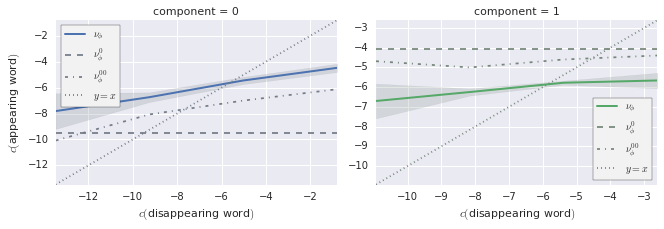

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1756 (cluster-unique) substitutions, but the PCA is in fact computed on 1430 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
    * global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


   ** global -> global
    * global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


    * global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 1146 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.05220691130910671

intercept                      6.581528
global_aoa                    -0.021468
global_clustering              0.099164
global_frequency               0.307083
global_letters_count           0.006507
global_orthographic_density   -0.011044
global_synonyms_count          0.022089
dtype: float64

Regressing global frequency with 1146 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07024463784179358

intercept                                              13.751004
global_aoa                                             -0.649865
global_clustering                                       0.196827
global_frequency                                        0.326421
global_letters_count                                   -1.318765
global_orthographic_density                            -1.256822
glo

R^2 = 0.20901638745852447

intercept                  -1.735392
rel_aoa                     0.035875
rel_clustering              0.181298
rel_frequency               0.588564
rel_letters_count          -0.108340
rel_orthographic_density   -0.177515
rel_synonyms_count          0.048301
dtype: float64

Regressing rel frequency with 1146 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.22080457872804482

intercept                                       -1.806976
rel_aoa                                          0.008676
rel_clustering                                   0.264860
rel_frequency                                    0.581066
rel_letters_count                               -0.041205
rel_orthographic_density                        -0.270931
rel_synonyms_count                               0.183580
rel_aoa * rel_clustering                        -0.047850
rel_aoa * rel_frequency                          0.007464
rel_aoa * rel_letters_count                      0.046180
rel

Regressing global aoa with 1056 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.060358044663342936

intercept                      6.184135
global_aoa                     0.232191
global_clustering             -0.151242
global_frequency              -0.135521
global_letters_count           0.003886
global_orthographic_density   -0.114170
global_synonyms_count         -0.083158
dtype: float64

Regressing global aoa with 1056 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.07500096214040797

intercept                                             -5.407817
global_aoa                                             0.022887
global_clustering                                     -1.703827
global_frequency                                       0.518483
global_letters_count                                   1.684889
global_orthographic_density                           -0.524471
global_synonyms_count                                  0.069756
global_aoa * global_clustering         

intercept                   0.877269
rel_aoa                     0.375092
rel_clustering             -0.218561
rel_frequency              -0.109788
rel_letters_count          -0.046391
rel_orthographic_density    0.026024
rel_synonyms_count         -0.132014
dtype: float64

Regressing rel aoa with 1056 measures, with interactions
           ^^^^^^^
R^2 = 0.12248887366505379

intercept                                        1.042025
rel_aoa                                          0.490564
rel_clustering                                  -0.463300
rel_frequency                                   -0.121522
rel_letters_count                               -0.109468
rel_orthographic_density                         0.172750
rel_synonyms_count                              -0.540349
rel_aoa * rel_clustering                        -0.110177
rel_aoa * rel_frequency                          0.020695
rel_aoa * rel_letters_count                      0.023644
rel_aoa * rel_orthographic_density        

Regressing global clustering with 942 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.012313282753730559

intercept                     -5.085580
global_aoa                     0.003031
global_clustering              0.083328
global_frequency              -0.022467
global_letters_count          -0.001701
global_orthographic_density   -0.008490
global_synonyms_count          0.014779
dtype: float64

Regressing global clustering with 942 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.03455873201455917

intercept                                             -4.764207
global_aoa                                             0.000647
global_clustering                                      0.280557
global_frequency                                      -0.256893
global_letters_count                                   0.350225
global_orthographic_density                            0.339569
global_synonyms_count                                  0.209577
global_aoa * 

Regressing rel clustering with 942 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.07792770911881597

intercept                   0.330897
rel_aoa                    -0.017923
rel_clustering              0.299695
rel_frequency               0.016106
rel_letters_count           0.009192
rel_orthographic_density   -0.004892
rel_synonyms_count          0.015803
dtype: float64

Regressing rel clustering with 942 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.08774265249385815

intercept                                        0.287809
rel_aoa                                         -0.028894
rel_clustering                                   0.350291
rel_frequency                                   -0.000894
rel_letters_count                                0.007829
rel_orthographic_density                        -0.052773
rel_synonyms_count                              -0.084997
rel_aoa * rel_clustering                         0.015445
rel_aoa * rel_frequency        

Regressing global letters_count with 1146 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.059094347980668926

intercept                      4.052564
global_aoa                     0.113816
global_clustering             -0.316584
global_frequency              -0.058619
global_letters_count           0.101300
global_orthographic_density   -0.164493
global_synonyms_count         -0.143470
dtype: float64

Regressing global letters_count with 1146 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07392525973817066

intercept                                             -12.938952
global_aoa                                              1.146736
global_clustering                                      -2.085824
global_frequency                                        1.065749
global_letters_count                                    0.969897
global_orthographic_density                             0.217043
global_synonyms_count                                   2

intercept                   1.641725
rel_aoa                    -0.046232
rel_clustering             -0.229110
rel_frequency              -0.195084
rel_letters_count           0.313194
rel_orthographic_density    0.030120
rel_synonyms_count         -0.125467
dtype: float64

Regressing rel letters_count with 1146 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.11280330344892965

intercept                                        1.673499
rel_aoa                                         -0.002530
rel_clustering                                  -0.310638
rel_frequency                                   -0.140827
rel_letters_count                                0.385740
rel_orthographic_density                         0.016879
rel_synonyms_count                              -0.621736
rel_aoa * rel_clustering                         0.081788
rel_aoa * rel_frequency                         -0.011166
rel_aoa * rel_letters_count                     -0.078312
rel_aoa * rel_orthogra

Regressing global synonyms_count with 1110 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.008412671364636415

intercept                      0.611694
global_aoa                    -0.009332
global_clustering              0.018644
global_frequency              -0.004036
global_letters_count          -0.010403
global_orthographic_density   -0.014463
global_synonyms_count          0.080026
dtype: float64

Regressing global synonyms_count with 1110 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.01916386880466392

intercept                                              0.458856
global_aoa                                             0.210207
global_clustering                                      0.250917
global_frequency                                      -0.025557
global_letters_count                                   0.039365
global_orthographic_density                            0.097202
global_synonyms_count                                 -0.06

Regressing global synonyms_count with 1110 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.016932064560213567

intercept                                        0.345352
rel_aoa                                         -0.040783
rel_clustering                                  -0.046980
rel_frequency                                   -0.012686
rel_letters_count                                0.004462
rel_orthographic_density                         0.021440
rel_synonyms_count                               0.027593
rel_aoa * rel_clustering                         0.003386
rel_aoa * rel_frequency                         -0.008293
rel_aoa * rel_letters_count                     -0.010833
rel_aoa * rel_orthographic_density              -0.030634
rel_aoa * rel_synonyms_count                     0.015766
rel_clustering * rel_frequency                   0.002842
rel_clustering * rel_letters_count               0.006454
rel_clustering * rel_orthographic_density       -0.04442

Regressing rel synonyms_count with 1110 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.173335115412935

intercept                                                 5.972415
global_aoa                                               -0.147848
global_clustering                                         1.118178
global_frequency                                         -0.417859
global_letters_count                                     -0.164030
global_orthographic_density                               0.718070
global_synonyms_count                                    -0.672447
rel_aoa                                                  -0.081202
rel_clustering                                           -0.596471
rel_frequency                                             0.120768
rel_letters_count                                         0.017079
rel_orthographic_density                                 -0.679825
rel_synonyms_count                                       -0.820924
global

Regressing global orthographic_density with 947 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.06027319302548517

intercept                                        1.581337
rel_aoa                                          0.148643
rel_clustering                                   0.019733
rel_frequency                                   -0.020270
rel_letters_count                               -0.041982
rel_orthographic_density                         0.264051
rel_synonyms_count                               0.238993
rel_aoa * rel_clustering                         0.011674
rel_aoa * rel_frequency                          0.038141
rel_aoa * rel_letters_count                      0.009582
rel_aoa * rel_orthographic_density               0.038124
rel_aoa * rel_synonyms_count                     0.076894
rel_clustering * rel_frequency                  -0.001239
rel_clustering * rel_letters_count               0.010626
rel_clustering * rel_orthographic_density     

Regressing rel orthographic_density with 947 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.17161813536068116

intercept                                                -1.561231
global_aoa                                               -0.317564
global_clustering                                         0.051158
global_frequency                                          0.033982
global_letters_count                                      0.115233
global_orthographic_density                               1.736711
global_synonyms_count                                     4.997575
rel_aoa                                                  -0.137438
rel_clustering                                            2.234469
rel_frequency                                            -0.371254
rel_letters_count                                        -0.567698
rel_orthographic_density                                 -2.051526
rel_synonyms_count                                       -3.